In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [3]:
sns.set_context('poster')
sns.set_style('white')

In [4]:
ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MED4',  'MIT9312','MIT0604', 'Natl2A', 'MIT9313']
ppallete = [ '#62A586', '#face6e','#f79934', '#7A9BC8', '#F47681', ]
# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['X', 'P', 's', 'D', 'o']
aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'

espallete = ['#6cf0ba', '#D55282', '#538B9B']
#  604 #FCC479
#     #ffd7a1
#     #fcb14c
#     MED4 = #62A586
#     9313 #F47681
#     natl #7A9BC8

In [5]:
df = pd.read_pickle('CCPA.pkl.gz')
df.loc[df.PRO == 'C9B', 'PRO'] = 'MIT0604'

In [6]:
dfw = df.loc[(df.experiment.isin(['e1', 'e3', 'e4','e5', 'e6']))]

In [7]:
#dfw = df.loc[(df.experiment.isin(['e1','e3', 'e4','e5', 'e6'])) # & (df.culture == 'Co_Culture')
#            ]

In [8]:
dfdecline = cp.generate_decline(dfw, scale=False)
#dfdecline = dfdecline.loc[dfdecline['day'] <= 80]

In [9]:
dfdecline.head()

experiment_sample       day     FL experiment sample      PRO ALT  \
0           e1, 10A  0.000000  5.621         e1    10A  MIT0604  DE   
1           e1, 10A  0.893056  4.045         e1    10A  MIT0604  DE   
2           e1, 10A  1.991667  2.749         e1    10A  MIT0604  DE   
3           e1, 10A  4.697222  2.924         e1    10A  MIT0604  DE   
4           e1, 10A  5.700000  2.519         e1    10A  MIT0604  DE   

      culture  
0  Co_Culture  
1  Co_Culture  
2  Co_Culture  
3  Co_Culture  
4  Co_Culture

In [10]:
for n, f in [
    ('exponential', cp.model_exponential),
    ('hyperbolic', cp.model_hyperbolic),
    ('harmonic', cp.model_harmonic),
]:
    #f = cp.model_exponential
    t = dfdecline.groupby('experiment_sample').apply(lambda x: cp.apply_fit(x, f, print_popt=False))
    dfdecline[n] = t['y_pred']
    for i in range(3):
        dfdecline[f'{n}_popt_{i}'] = t[f'popt_{i}']
#dfdecline['decline'] = dfdecline.FL
#dfdecline['exponential_diff'] = dfdecline.FL - dfdecline.exponential
#dfdecline['decline_scaled'] = dfdecline.groupby('experiment_sample').FL.transform(lambda x: x / x.max())
#df_exp_coef = dfdecline.groupby(['experiment_sample','popt_0', 'popt_1', 'popt_2'])['decline'].count().reset_index(level=[1,2,3])\
#.drop(columns='decline')

fit with initial: Optimal parameters not found: The maximum number of function evaluations is exceeded.
first fit: Optimal parameters not found: The maximum number of function evaluations is exceeded.
fit with initial: Optimal parameters not found: The maximum number of function evaluations is exceeded.
fit with initial: Optimal parameters not found: The maximum number of function evaluations is exceeded.
fit with initial: Optimal parameters not found: The maximum number of function evaluations is exceeded.


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


fit with initial: SVD did not converge in Linear Least Squares


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


fit with initial: array must not contain infs or NaNs


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


fit with initial: SVD did not converge in Linear Least Squares
first fit: SVD did not converge in Linear Least Squares
fit with initial: SVD did not converge in Linear Least Squares
second try: SVD did not converge in Linear Least Squares
third try: SVD did not converge in Linear Least Squares
first fit: array must not contain infs or NaNs


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


first fit: SVD did not converge in Linear Least Squares
fit with initial: SVD did not converge in Linear Least Squares
second try: SVD did not converge in Linear Least Squares
third try: SVD did not converge in Linear Least Squares
first fit: SVD did not converge in Linear Least Squares
fit with initial: array must not contain infs or NaNs
second try: SVD did not converge in Linear Least Squares
third try: SVD did not converge in Linear Least Squares


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


first fit: SVD did not converge in Linear Least Squares


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


first fit: array must not contain infs or NaNs
fit with initial: SVD did not converge in Linear Least Squares
second try: array must not contain infs or NaNs
third try: array must not contain infs or NaNs
first fit: array must not contain infs or NaNs
fit with initial: Optimal parameters not found: The maximum number of function evaluations is exceeded.
fit with initial: Optimal parameters not found: The maximum number of function evaluations is exceeded.
fit with initial: Optimal parameters not found: The maximum number of function evaluations is exceeded.


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


fit with initial: SVD did not converge in Linear Least Squares


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


fit with initial: array must not contain infs or NaNs
fit with initial: Optimal parameters not found: The maximum number of function evaluations is exceeded.
fit with initial: Optimal parameters not found: The maximum number of function evaluations is exceeded.


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


first fit: array must not contain infs or NaNs


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


first fit: array must not contain infs or NaNs
fit with initial: SVD did not converge in Linear Least Squares
second try: array must not contain infs or NaNs
third try: array must not contain infs or NaNs


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


fit with initial: array must not contain infs or NaNs


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


first fit: array must not contain infs or NaNs
fit with initial: Optimal parameters not found: The maximum number of function evaluations is exceeded.
second try: array must not contain infs or NaNs
third try: array must not contain infs or NaNs


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


first fit: array must not contain infs or NaNs
fit with initial: array must not contain infs or NaNs
second try: array must not contain infs or NaNs
third try: array must not contain infs or NaNs


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


fit with initial: SVD did not converge in Linear Least Squares


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:937: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  result = concat(values, axis=self.axis)


In [11]:
dfdecline.columns

Index(['experiment_sample', 'day', 'FL', 'experiment', 'sample', 'PRO', 'ALT',
       'culture', 'exponential', 'exponential_popt_0', 'exponential_popt_1',
       'exponential_popt_2', 'hyperbolic', 'hyperbolic_popt_0',
       'hyperbolic_popt_1', 'hyperbolic_popt_2', 'harmonic', 'harmonic_popt_0',
       'harmonic_popt_1', 'harmonic_popt_2'],
      dtype='object')

In [12]:
dfdecline.head()

experiment_sample       day     FL experiment sample      PRO ALT  \
0           e1, 10A  0.000000  5.621         e1    10A  MIT0604  DE   
1           e1, 10A  0.893056  4.045         e1    10A  MIT0604  DE   
2           e1, 10A  1.991667  2.749         e1    10A  MIT0604  DE   
3           e1, 10A  4.697222  2.924         e1    10A  MIT0604  DE   
4           e1, 10A  5.700000  2.519         e1    10A  MIT0604  DE   

      culture  exponential  exponential_popt_0  exponential_popt_1  \
0  Co_Culture     0.991545             0.01278            0.991545   
1  Co_Culture     0.980292             0.01278            0.991545   
2  Co_Culture     0.966624             0.01278            0.991545   
3  Co_Culture     0.933771             0.01278            0.991545   
4  Co_Culture     0.921880             0.01278            0.991545   

   exponential_popt_2  hyperbolic  hyperbolic_popt_0  hyperbolic_popt_1  \
0                 0.5    5.656951           1.604887            0.70623   
1                 0.5    3.659021           1.604887            0.70623   
2                 0.5    2.710282           1.604887            0.70623   
3                 0.5    1.792628           1.604887            0.70623   
4                 0.5    1.617200           1.604887            0.70623   

   hyperbolic_popt_2  harmonic  harmonic_popt_0  harmonic_popt_1  \
0           5.656951  5.053455         0.255518         5.053455   
1           5.656951  4.114547         0.255518         5.053455   
2           5.656951  3.349082         0.255518         5.053455   
3           5.656951  2.296788         0.255518         5.053455   
4           5.656951  2.057214         0.255518         5.053455   

   harmonic_popt_2  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0

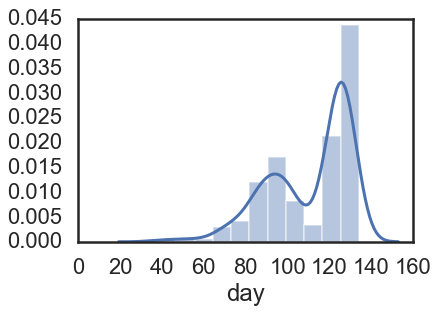

In [13]:
sns.distplot(dfdecline.groupby('experiment_sample')['day'].max()) #.sort_values()

In [14]:
def _compute_score_model(x,m):
    res = {f'{m}_popt_{i}' : x[f'{m}_popt_{i}'].unique()[0] for i in range(3)}
    if np.isnan(res[f'{m}_popt_0']):
        res.update({
            f'rmse_{m}' : np.NaN,
            f'rmse_{m}_60' : np.NaN,
            f'rmse_{m}_5' : np.NaN,
            f'bic_{m}' : np.NaN,
        })
    else:
        x60 = x.loc[x.day >= 60]
        x5 = x.loc[x.day <= 5]
        n = x.shape[0]
        num_params = 3 if m == 'hyperbolic' else 2
        res.update({
            f'rmse_{m}' : np.sqrt(metrics.mean_squared_error(x['FL'], x[m])),
            f'rmse_{m}_60' : np.sqrt(metrics.mean_squared_error(x60['FL'], x60[m])) if x60.shape[0]>2 else np.NaN,
            f'rmse_{m}_5' : np.sqrt(metrics.mean_squared_error(x5['FL'], x5[m])),
            f'bic_{m}' : n * np.log(metrics.mean_squared_error(x['FL'], x[m])) + num_params * np.log(n),
        })
    return res

def _compute_r2(x):
    models = ['exponential', 'hyperbolic', 'harmonic', ]
    res_list = [_compute_score_model(x,m) for m in models]
    res =dict()
    for i in res_list:
        res.update(i)
    return pd.Series(res)
groupcols = ['experiment_sample', 'experiment', 'sample', 'PRO', 'ALT', 'culture', ]
dfscore = dfdecline.groupby(groupcols).apply(_compute_r2).reset_index()

In [15]:
t = dfscore.loc[(dfscore.bic_exponential > dfscore.bic_harmonic) &
            (dfscore.bic_exponential > dfscore.bic_hyperbolic) &
            (dfscore.bic_harmonic < dfscore.bic_hyperbolic)
            ,['experiment_sample','PRO', 'ALT','bic_exponential', 'bic_hyperbolic', 'bic_harmonic',
              'rmse_hyperbolic', 'rmse_harmonic'
             ]]
#sns.distplot((t.bic_hyperbolic - t.bic_harmonic)/-t.bic_harmonic*100)
#plt.show()
#sns.distplot((t.bic_hyperbolic - t.bic_harmonic))
t['diff1'] = t.bic_hyperbolic - t.bic_harmonic
t['diffp'] = 100* t.diff1 / -t.bic_harmonic

t.nlargest(30, 'diffp')

experiment_sample      PRO      ALT  bic_exponential  bic_hyperbolic  \
201           e4, 21A     MED4     ATCC       -86.892539     -179.683715   
282           e5, 25C  MIT0604     ATCC      -142.151138     -150.042342   
306            e5, 8B  MIT9312       DE       -80.578294      -96.548903   
265           e5, 18C  MIT9312     BS11       -37.955706      -83.051719   
20            e1, 16C     MED4     BS11       -62.166243     -138.088983   
244           e5, 10C  MIT0604       DE      -149.920703     -169.704600   
202           e4, 21B     MED4     ATCC      -167.816569     -216.254050   
65            e1, 36A     allP  all_Pro      -200.820791     -228.872312   
92            e3, 10B  MIT0604       DE      -198.181931     -208.454456   
363            e6, 3C  MIT9312      1A3       -79.418906     -100.007281   
195            e4, 1A     MED4      1A3      -199.073314     -213.878741   
91            e3, 10A  MIT0604       DE      -184.147445     -201.622896   
278           e5, 23C  MIT9312     ATCC       -57.347282      -68.780194   
213           e4, 25C  MIT0604     ATCC      -256.972970     -269.840414   
377            e6, 8C  MIT9312       DE       -92.401392      -99.366759   
40            e1, 22B  MIT9313     ATCC      -203.737109     -250.306026   
299            e5, 6A     MED4       DE       -72.435890     -107.718891   
365            e6, 4B   Natl2A      1A3       -77.720557     -116.974717   
269            e5, 1C     MED4      1A3       -80.710965      -87.534082   
125           e3, 20C  MIT0604     BS11      -241.340479     -280.768413   
315           e6, 11B     MED4      DE1      -102.699159     -109.139887   
32             e1, 1C     MED4      1A3       -25.537059     -159.841023   
5             e1, 11C     MED4      DE1       -58.920566     -217.990681   
362            e6, 3B  MIT9312      1A3       -97.749782     -122.963055   
222            e4, 3B  MIT9312      1A3      -218.511128     -220.089136   
86             e1, 8B  MIT9312       DE       -63.767346     -179.920129   
61             e1, 2C  MIT9313      1A3      -165.260372     -179.613996   
305            e5, 8A  MIT9312       DE       -61.082053      -80.028380   
78             e1, 5C  MIT0604      1A3        20.633168     -156.148669   
307            e5, 8C  MIT9312       DE       -96.432513     -115.249682   

     bic_harmonic  rmse_hyperbolic  rmse_harmonic      diff1     diffp  
201   -198.796622         0.252967       0.227486  19.112907  9.614302  
282   -162.179782         0.198338       0.182677  12.137440  7.483942  
306   -104.238388         0.285399       0.272656   7.689485  7.376827  
265    -88.641416         0.299491       0.292186   5.589697  6.305966  
20    -146.852657         0.379474       0.368904   8.763674  5.967665  
244   -180.222374         0.180260       0.169463  10.517774  5.835998  
202   -229.149039         0.194814       0.183146  12.894989  5.627337  
65    -241.553984         0.232560       0.221267  12.681672  5.250036  
92    -219.751426         0.205975       0.195862  11.296970  5.140795  
363   -105.293261         0.223613       0.218608   5.285979  5.020245  
195   -225.015965         0.184474       0.175173  11.137224  4.949526  
91    -211.854447         0.216275       0.207227  10.231551  4.829519  
278    -72.225620         0.331345       0.331982   3.445426  4.770366  
213   -283.069622         0.132858       0.124603  13.229208  4.673482  
377   -103.720488         0.207651       0.205296   4.353729  4.197559  
40    -261.166377         0.096068       0.090381  10.860350  4.158403  
299   -112.322903         0.250637       0.248193   4.604012  4.098908  
365   -121.734166         0.177794       0.175056   4.759449  3.909707  
269    -91.076895         0.100097       0.098917   3.542814  3.889915  
125   -292.067237         0.133824       0.127552  11.298824  3.868570  
315   -113.427330         0.163235       0.161290   4.287443  3.779903  
32    -166.094089         0.325449       

In [16]:
sum(dfscore.hyperbolic_popt_1.isna())

7

In [17]:
dfscore.loc[dfscore.hyperbolic_popt_0.isna()].T

54         57         58         63          254  \
experiment_sample      e1, 28B    e1, 29B    e1, 29C    e1, 30B     e5, 14B   
experiment                  e1         e1         e1         e1          e5   
sample                     28B        29B        29C        30B         14B   
PRO                    MIT9312    MIT9313    MIT9313       MED4      Natl2A   
ALT                     Ax_Pro     Ax_Pro     Ax_Pro     Ax_Pro         DE1   
culture                 Axenic     Axenic     Axenic     Axenic  Co_Culture   
exponential_popt_0    0.327122   0.222334   0.219444   0.195546   0.0200163   
exponential_popt_1      7.9877    3.11417    2.58897    7.65546     1.69043   
exponential_popt_2         0.5          1        0.5        0.5           1   
rmse_exponential      0.388653   0.122604  0.0845407   0.208071    0.227055   
rmse_exponential_60  0.0507307  0.0507551  0.0515484  0.0571627    0.156855   
rmse_exponential_5     1.68169   0.425026   0.203744   0.709018     0.53127   
bic_exponential       -142.447   -335.389   -396.352   -242.416    -152.139   
hyperbolic_popt_0          NaN        NaN        NaN        NaN         NaN   
hyperbolic_popt_1          NaN        NaN        NaN        NaN         NaN   
hyperbolic_popt_2          NaN        NaN        NaN        NaN         NaN   
rmse_hyperbolic            NaN        NaN        NaN        NaN         NaN   
rmse_hyperbolic_60         NaN        NaN        NaN        NaN         NaN   
rmse_hyperbolic_5          NaN        NaN        NaN        NaN         NaN   
bic_hyperbolic             NaN        NaN        NaN        NaN         NaN   
harmonic_popt_0         1.4479   0.707761    0.80489   0.856175    0.052832   
harmonic_popt_1        5.65244    2.39982    2.40689    7.12871     2.15738   
harmonic_popt_2              1        0.5          1          1         0.5   
rmse_harmonic         0.726858   0.225642    0.17288   0.579457    0.231433   
rmse_harmonic_60     0.0105412   0.015007  0.0189111  0.0440063    0.215032   
rmse_harmonic_5        3.22887   0.898884   0.694188    2.16317    0.233426   
bic_harmonic          -42.2798   -235.351   -279.032   -78.5421    -150.076   

                            266         272  
experiment_sample       e5, 19A     e5, 21B  
experiment                   e5          e5  
sample                      19A         21B  
PRO                      Natl2A        MED4  
ALT                        BS11        ATCC  
culture              Co_Culture  Co_Culture  
exponential_popt_0    0.0173845   0.0476887  
exponential_popt_1      1.76157     1.45585  
exponential_popt_2          0.5           1  
rmse_exponential       0.340339   0.0963241  
rmse_exponential_60    0.196478         NaN  
rmse_exponential_5      1.15101   0.0472212  
bic_exponential        -110.545    -110.564  
hyperbolic_popt_0           NaN         NaN  
hyperbolic_popt_1           NaN         NaN  
hyperbolic_popt_2           NaN         NaN  
rmse_hyperbolic             NaN         NaN  
rmse_hyperbolic_60          NaN         NaN  
rmse_hyperbolic_5           NaN         NaN  
bic_hyperbolic              NaN         NaN  
harmonic_popt_0       0.0361381   0.0894456  
harmonic_popt_1         2.02759     1.54283  
harmonic_popt_2             0.5           1  
rmse_harmonic          0.367329    0.157942  
rmse_harmonic_60        0.25893         NaN  
rmse_harmonic_5          1.1999   0.0886531  
bic_harmonic            -102.15    -85.8387

In [18]:
dfscorem = dfscore.melt(id_vars=['experiment_sample', 'experiment', 'sample', 'PRO', 'ALT', 'culture'],
                        value_vars=['rmse_exponential', 'rmse_hyperbolic', 'rmse_harmonic', 
                                    'rmse_exponential_60', 'rmse_hyperbolic_60', 'rmse_harmonic_60',
                                    'rmse_exponential_5', 'rmse_hyperbolic_5', 'rmse_harmonic_5',
                                    'bic_exponential', 'bic_hyperbolic', 'bic_harmonic'
                                    
                                   ], 
                        value_name='RMSE',
                        var_name='model')


In [23]:
dfscorem['s'] = dfscorem['sample'] +', '+ dfscorem.ALT
dfscorem['e'] = dfscorem['experiment'] +', '+ dfscorem.culture
dfscorem['p'] = dfscorem['PRO'] 
dfscorem.loc[dfscorem.culture == 'Axenic', 'p'] =dfscorem.loc[dfscorem.culture == 'Axenic', 'p']+ ' Axenic'



Text(0.5,1,'root mean square error per model (all & day>60)')

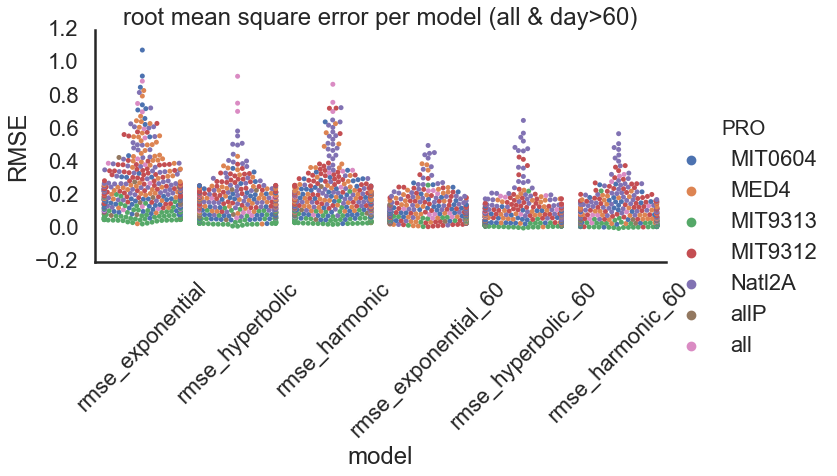

In [29]:
cols=['rmse_exponential', 'rmse_hyperbolic', 'rmse_harmonic', 
      'rmse_exponential_60', 'rmse_hyperbolic_60', 'rmse_harmonic_60',
      #'mse_exponential_5', 'mse_hyperbolic_5', 'mse_harmonic_5'
] 

sns.catplot(data=dfscorem.loc[dfscorem.model.isin(cols)], x='model', y='RMSE', hue='PRO', kind='swarm', aspect=2,
           #palette='cubehelix'
           )
plt.xticks(rotation=45)
plt.title('root mean square error per model (all & day>60)')

C:\Users\wosnat\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\wosnat\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\wosnat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\wosnat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5,1,'RMSE co-culture')

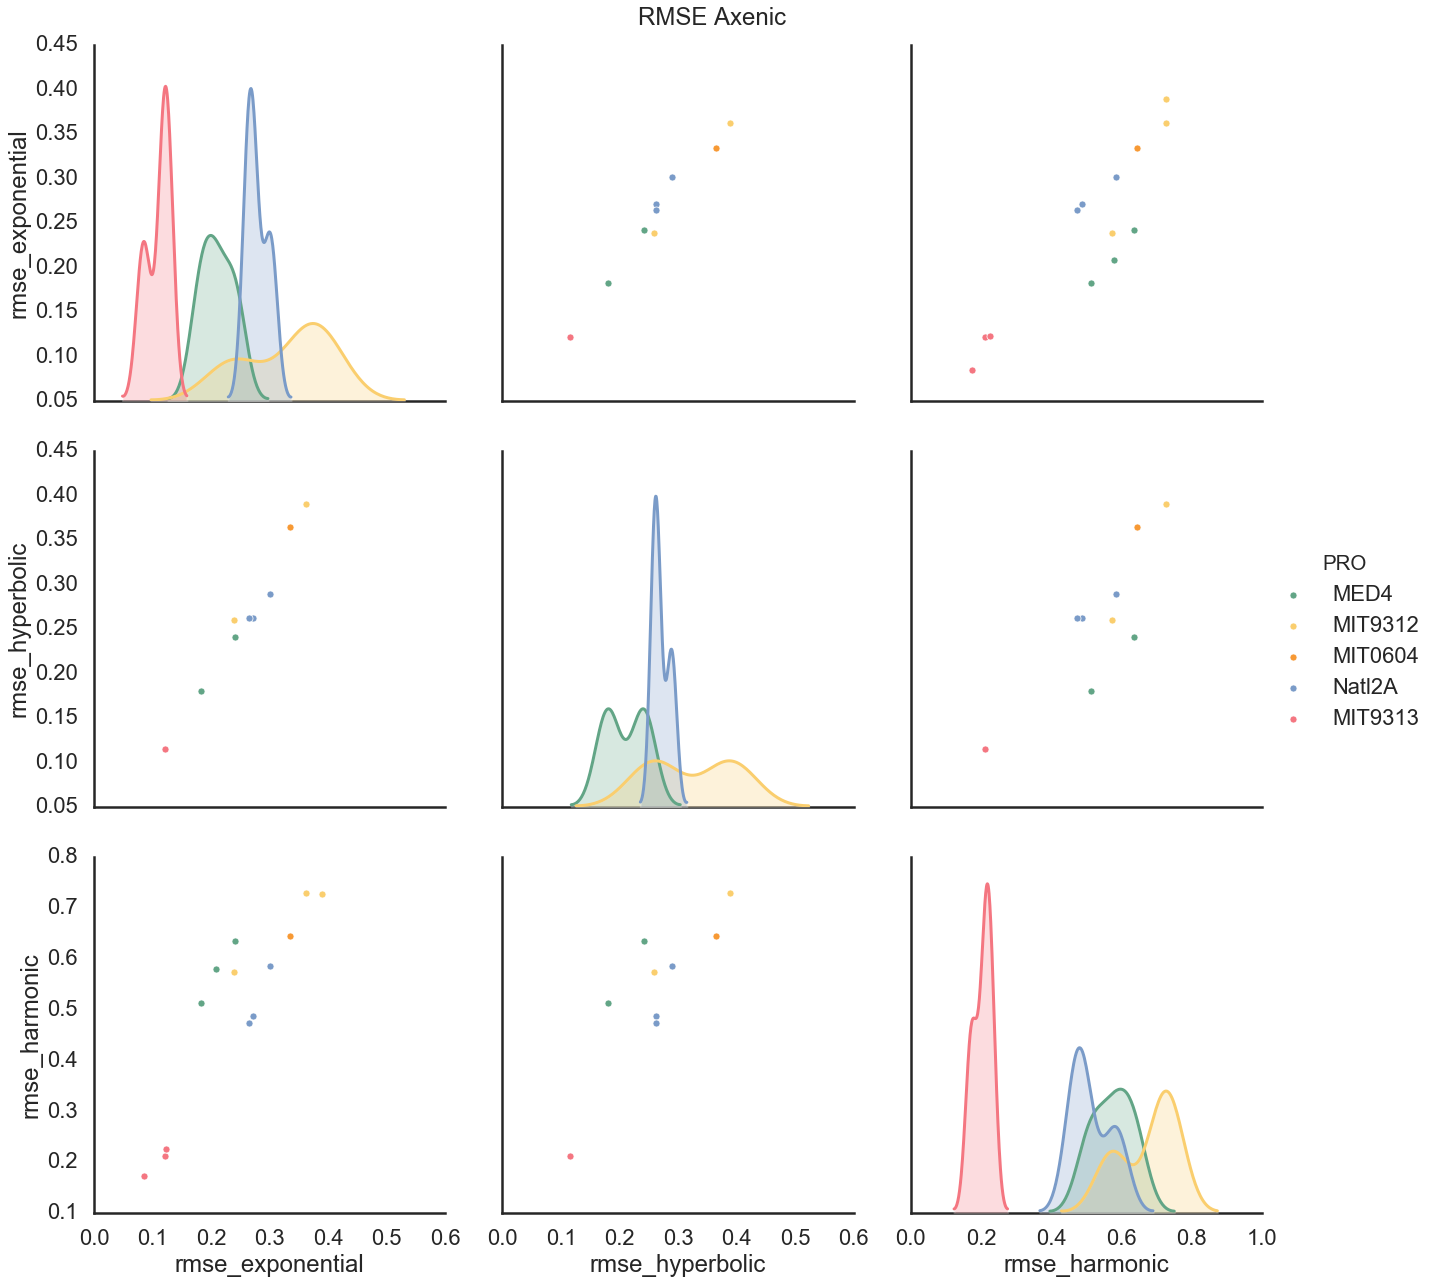

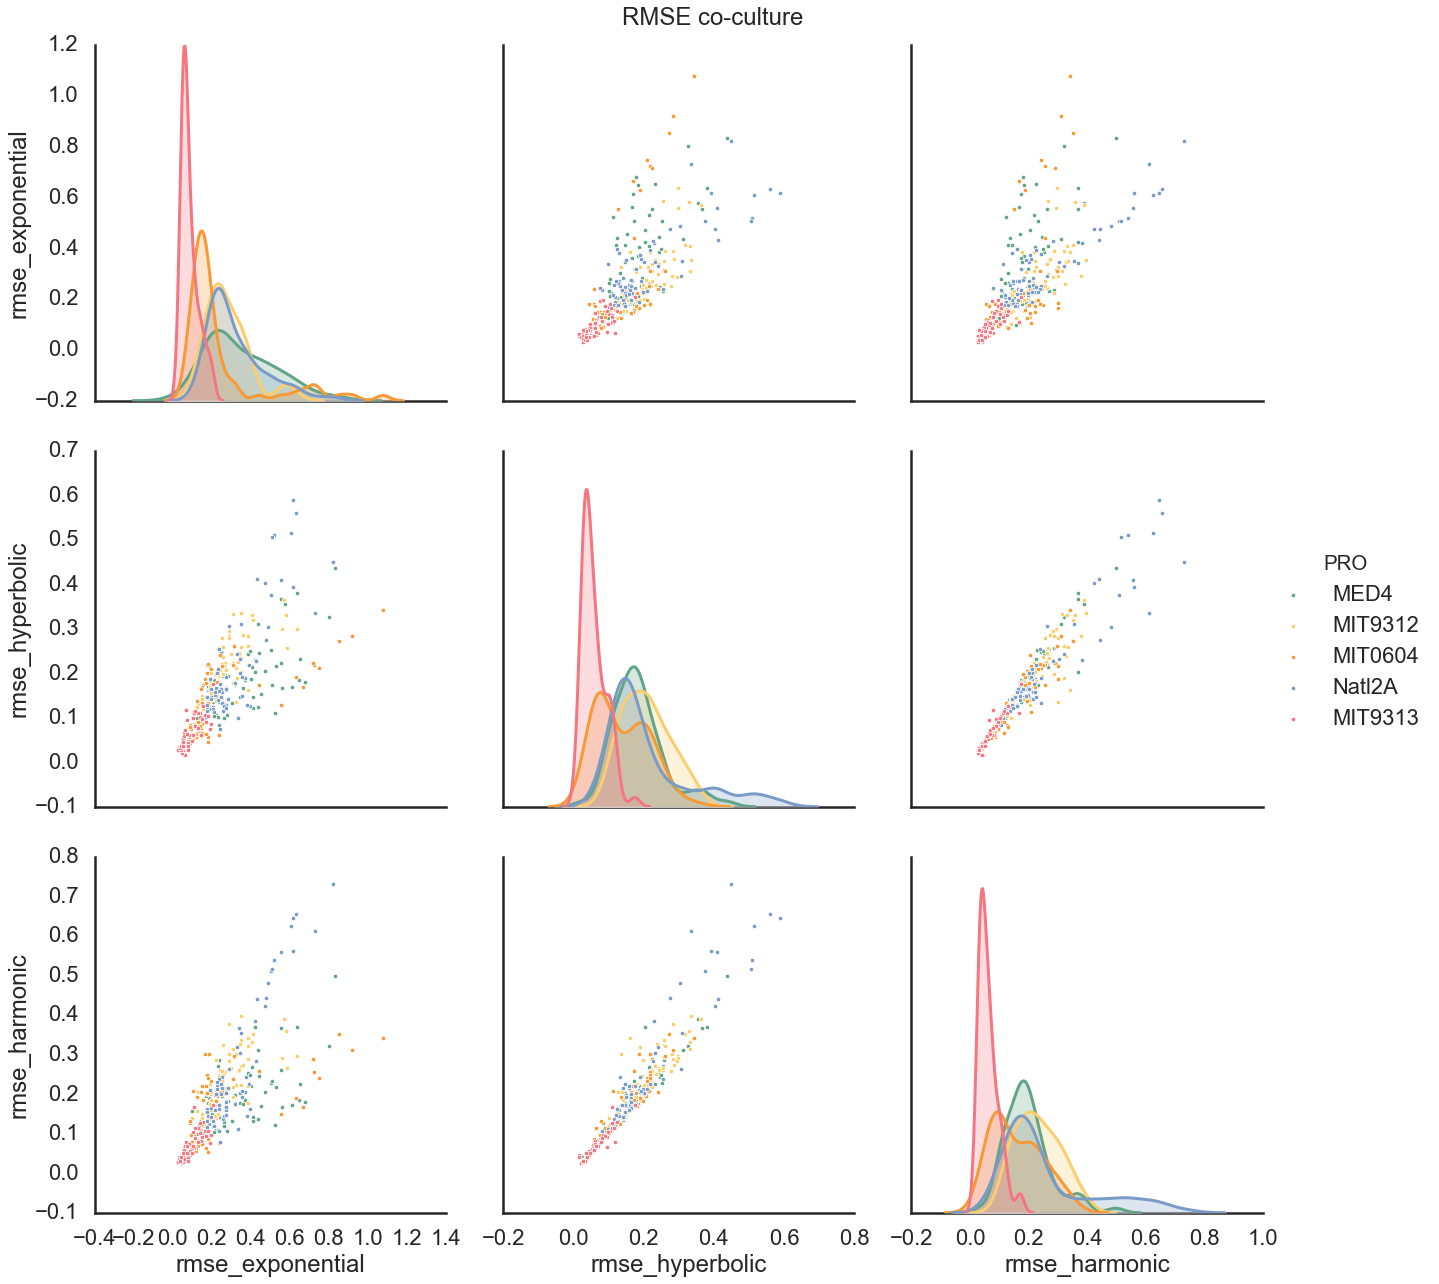

In [21]:
sns.pairplot(dfscore.loc[dfscore.culture == 'Axenic'], 
             vars=['rmse_exponential', 'rmse_hyperbolic', 'rmse_harmonic',
                            #'rmse_exponential_60', 'rmse_hyperbolic_60', 'rmse_harmonic_60'
                            #'rmse_exponential_5', 'rmse_hyperbolic_5', 'rmse_harmonic_5',
                           ],
             height=6, 
             hue='PRO', hue_order=porder, palette=ppallete,
             plot_kws={"s": 50},
             #kind='reg'
            )
plt.suptitle('RMSE Axenic', y=1)
sns.pairplot(dfscore.loc[dfscore.culture == 'Co_Culture'], 
             vars=['rmse_exponential', 'rmse_hyperbolic', 'rmse_harmonic',
                            #'rmse_exponential_60', 'rmse_hyperbolic_60', 'rmse_harmonic_60'
                            #'rmse_exponential_5', 'rmse_hyperbolic_5', 'rmse_harmonic_5',
                           ],
             height=6, 
             plot_kws={"s": 20},
             hue='PRO', hue_order=porder, palette=ppallete,
             #kind='reg'
            )
plt.suptitle('RMSE co-culture', y=1)


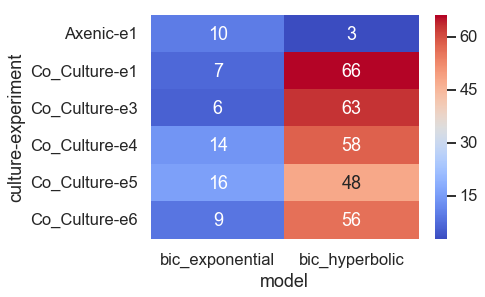

In [30]:
best_model_df = dfscorem.loc[dfscorem.model.isin(['bic_exponential', 'bic_hyperbolic'])
                            ].sort_values('RMSE', ascending=True).drop_duplicates([
    'experiment_sample', ])
t = best_model_df.loc[best_model_df.culture.isin(['Axenic', 'Co_Culture'])].pivot_table(index=['culture',  'experiment'],columns=['model'], values='sample', aggfunc='count')
sns.set_context('talk')
sns.heatmap(t, annot=True, cmap='coolwarm')


Text(0.5,1,'best model (lowest bic)')

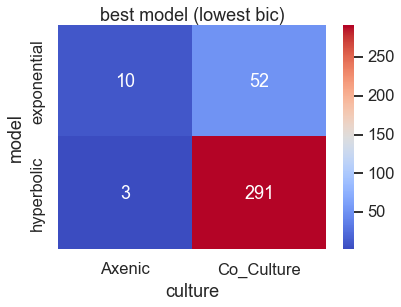

In [36]:
best_model_df = dfscorem.loc[dfscorem.model.isin(['bic_exponential', 'bic_hyperbolic'])
                            ].sort_values('RMSE', ascending=True).drop_duplicates([
    'experiment_sample', ])
t = best_model_df.loc[best_model_df.culture.isin(['Axenic', 'Co_Culture'])].pivot_table(index=['culture'],columns=['model'], values='sample', aggfunc='count')
t.rename(columns={'bic_exponential': 'exponential', 'bic_hyperbolic': 'hyperbolic'}, inplace=True)
sns.set_context('talk')
sns.heatmap(t.T, annot=True, cmap='coolwarm', fmt='d')
plt.title('best model (lowest bic)')

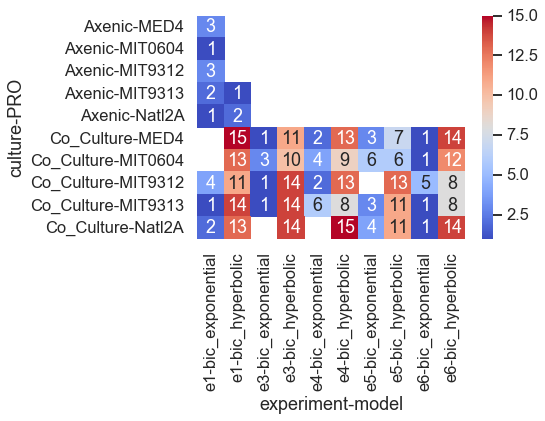

In [76]:
t = best_model_df.loc[best_model_df.culture.isin(['Axenic', 'Co_Culture'])].pivot_table(index=['culture',  'PRO', ],columns=['experiment', 'model', ], values='sample', aggfunc='count')
#sns.set_context('talk')
sns.heatmap(t, annot=True, cmap='coolwarm')


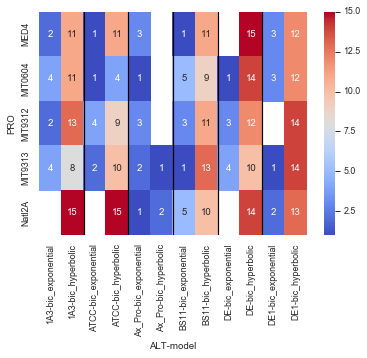

In [78]:

t = best_model_df.loc[best_model_df.culture.isin(['Axenic', 'Co_Culture'])
                     ].pivot_table(index=['PRO'], columns=['ALT','model', ], values='sample', aggfunc='count')
sns.set_context('paper')
sns.heatmap(t, annot=True, cmap='coolwarm' )
for i in [2,4,6,8,10]:
    plt.axvline(i, color='black',)


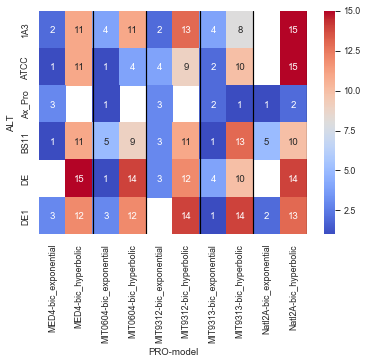

In [79]:

t = best_model_df.loc[best_model_df.culture.isin(['Axenic', 'Co_Culture'])
                     ].pivot_table(index=['ALT'], columns=['PRO','model', ], values='sample', aggfunc='count')
sns.set_context('paper')
sns.heatmap(t, annot=True, cmap='coolwarm' )
for i in [2,4,6,8,10]:
    plt.axvline(i, color='black',)


In [80]:
best_model_df['model'].value_counts()


bic_hyperbolic     315
bic_exponential     66
Name: model, dtype: int64

In [101]:
best_model_df.head()


experiment_sample experiment sample      PRO   ALT     culture  \
3981           e4, 12A         e4    12A  MIT9313   DE1  Co_Culture   
3982           e4, 12B         e4    12B  MIT9313   DE1  Co_Culture   
3908           e3, 12B         e3    12B  MIT9313   DE1  Co_Culture   
3968            e3, 7B         e3     7B  MIT9313    DE  Co_Culture   
3923           e3, 17C         e3    17C  MIT9313  BS11  Co_Culture   

               model        RMSE          s               e  
3981  bic_hyperbolic -530.906998   12A, DE1  e4, Co_Culture  
3982  bic_hyperbolic -522.205471   12B, DE1  e4, Co_Culture  
3908  bic_hyperbolic -492.611549   12B, DE1  e3, Co_Culture  
3968  bic_hyperbolic -473.653123     7B, DE  e3, Co_Culture  
3923  bic_hyperbolic -469.566427  17C, BS11  e3, Co_Culture

In [82]:
dfscore.describe()

exponential_popt_0  exponential_popt_1  exponential_popt_2  \
count          381.000000          381.000000          381.000000   
mean             0.095617            2.071552            0.805774   
std              0.106649            1.423027            0.244020   
min              0.005115            0.195424            0.500000   
25%              0.023455            1.066527            0.500000   
50%              0.045739            1.682607            1.000000   
75%              0.143424            2.680827            1.000000   
max              0.772132            8.372857            1.000000   

       rmse_exponential  rmse_exponential_60  rmse_exponential_5  \
count        381.000000           373.000000          381.000000   
mean           0.261298             0.109352            0.754522   
std            0.179123             0.082047            0.781304   
min            0.029018             0.012476            0.003053   
25%            0.138549             0.053226            0.159400   
50%            0.223186             0.081461            0.510442   
75%            0.340339             0.137951            1.048478   
max            1.078186             0.502553            4.556381   

       bic_exponential  hyperbolic_popt_0  hyperbolic_popt_1  \
count       381.000000         374.000000       3.740000e+02   
mean       -174.298596           1.231742       2.344016e+10   
std          87.362855           1.185358       4.533083e+11   
min        -398.810503          -0.974752       6.456489e-03   
25%        -220.515444           0.741406       1.732709e-01   
50%        -173.027153           1.038147       2.843059e-01   
75%        -107.550859           1.508982       4.903426e-01   
max          20.633168          12.480002       8.766565e+12   

       hyperbolic_popt_2  ...  rmse_hyperbolic_60  rmse_hyperbolic_5  \
count         374.000000  ...          367.000000         374.000000   
mean            2.990095  ...            0.096593           0.347801   
std             1.737877  ...            0.095707           0.366730   
min             0.260170  ...            0.004667           0.015028   
25%             1.814044  ...            0.035031           0.122848   
50%             2.700215  ...            0.071287           0.245324   
75%             3.719431  ...            0.122315           0.445692   
max            10.619440  ...            0.653620           3.586465   

       bic_hyperbolic  harmonic_popt_0  harmonic_popt_1  harmonic_popt_2  \
count      374.000000       381.000000       381.000000       381.000000   
mean      -222.056239         0.285803         2.807311         0.767717   
std         89.858969         0.253949         1.730628         0.249699   
min       -530.906998         0.004827         0.267962         0.500000   
25%       -265.900495         0.125836         1.648077         0.500000   
50%       -213.875837         0.227485         2.518738         1.000000   
75%       -156.264590         0.371389         3.427811         1.000000   
max          0.679007         1.725821        10.859432         1.000000   

       rmse_harmonic  rmse_harmonic_60  rmse_harmonic_5  bic_harmonic  
count     381.000000        373.000000       381.000000    381.000000  
mean        0.198530          0.105627         0.477986   -207.688809  
std         0.143147          0.094544         0.543865     90.800771  
min         0.026224          0.002051         0.008749   -474.006660  
25%         0.100591          0.036591         0.147293   -261.111744  
50%         0.175056          0.076601         0.290318   -202.401179  
75%         0.243716          0.145699         0.580542   -140.042317  
max         0.871670          0.573635         3.241257    -11.471286  

[8 rows x 21 columns]

In [87]:
sns.set_context('poster')

In [91]:
dfscore.columns

Index(['experiment_sample', 'experiment', 'sample', 'PRO', 'ALT', 'culture',
       'exponential_popt_0', 'exponential_popt_1', 'exponential_popt_2',
       'rmse_exponential', 'rmse_exponential_60', 'rmse_exponential_5',
       'bic_exponential', 'hyperbolic_popt_0', 'hyperbolic_popt_1',
       'hyperbolic_popt_2', 'rmse_hyperbolic', 'rmse_hyperbolic_60',
       'rmse_hyperbolic_5', 'bic_hyperbolic', 'harmonic_popt_0',
       'harmonic_popt_1', 'harmonic_popt_2', 'rmse_harmonic',
       'rmse_harmonic_60', 'rmse_harmonic_5', 'bic_harmonic', 'p'],
      dtype='object')

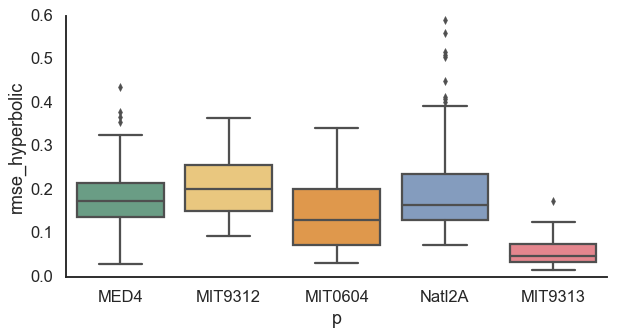

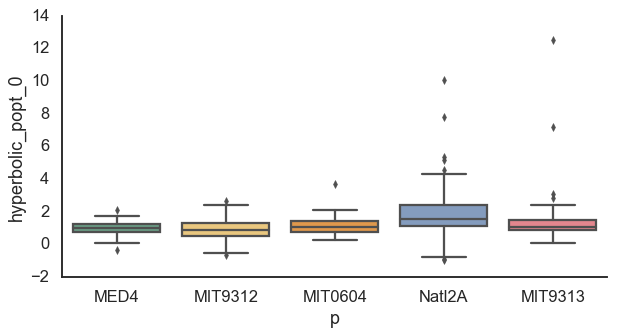

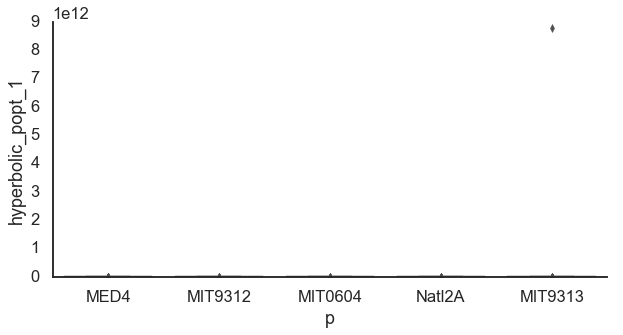

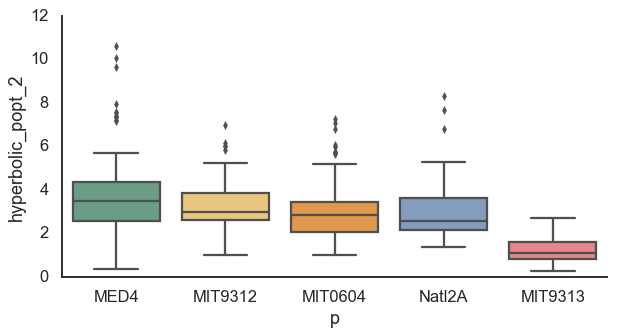

In [38]:
dfscore['p'] = dfscore.PRO
dfscore.loc[dfscore.culture=='Axenic','p'] = dfscore.loc[dfscore.culture=='Axenic','p'] + '_Axenic'

for i in ['rmse_hyperbolic', 'hyperbolic_popt_0', 'hyperbolic_popt_1', 'hyperbolic_popt_2']:
    sns.catplot(data=dfscore.loc[dfscore.culture =='Co_Culture'], 
                x='p', y=i, kind='box',
           order=porder, palette=ppallete,
           aspect=1.8)


In [106]:
best_model_df.loc[best_model_df.model == 'bic_hyperbolic', 'experiment_sample']

3981    e4, 12A
3982    e4, 12B
3908    e3, 12B
3968     e3, 7B
3923    e3, 17C
         ...   
4075    e5, 18C
3899     e1, 9B
4115     e5, 8A
3898     e1, 9A
4088    e5, 23C
Name: experiment_sample, Length: 315, dtype: object

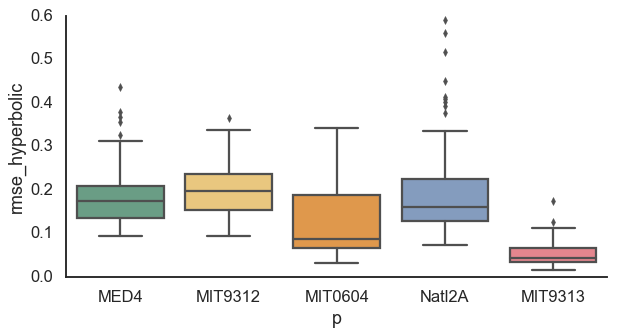

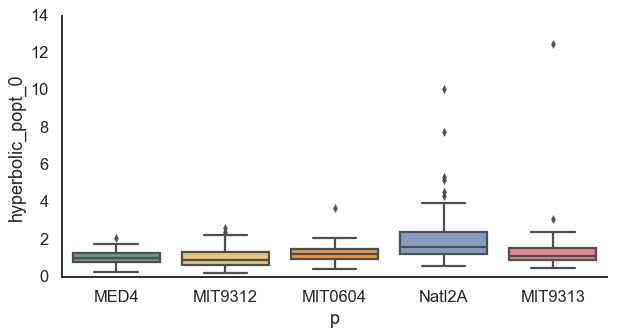

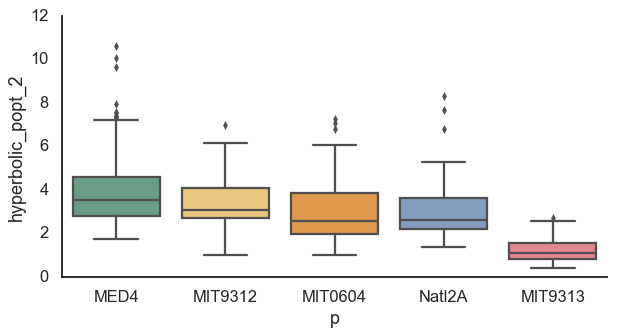

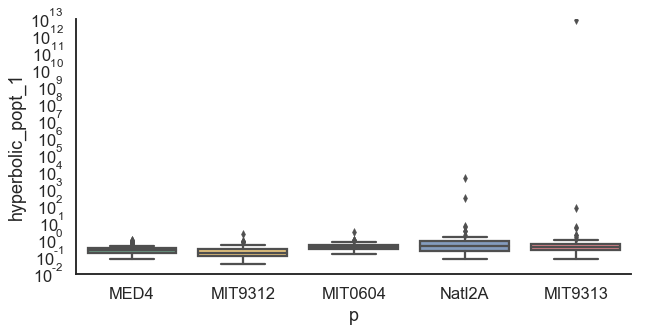

In [37]:
dfscore['p'] = dfscore.PRO
dfscore.loc[dfscore.culture=='Axenic','p'] = dfscore.loc[dfscore.culture=='Axenic','p'] + '_Axenic'

for i in ['rmse_hyperbolic', 'hyperbolic_popt_0',  'hyperbolic_popt_2']:
    sns.catplot(data=dfscore.loc[(dfscore.culture =='Co_Culture') &
                                dfscore.experiment_sample.isin(
                                    best_model_df.loc[best_model_df.model == 'bic_hyperbolic', 'experiment_sample'])
                                ], 
                x='p', y=i, kind='box',
           order=porder, palette=ppallete,
           aspect=1.8)
    #plt.yscale('log')
    
sns.catplot(data=dfscore.loc[(dfscore.culture =='Co_Culture') &
                                dfscore.experiment_sample.isin(
                                    best_model_df.loc[best_model_df.model == 'bic_hyperbolic', 'experiment_sample']) 
                             #dfscore['hyperbolic_popt_1'] < 1e8                                
                            ], 
                x='p', y='hyperbolic_popt_1', kind='box',
           order=porder, palette=ppallete,
           aspect=1.8)
plt.yscale('log')



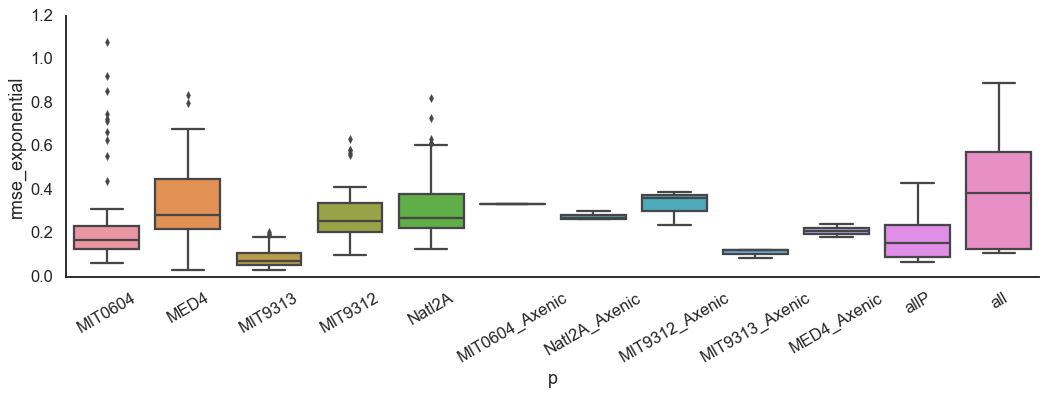

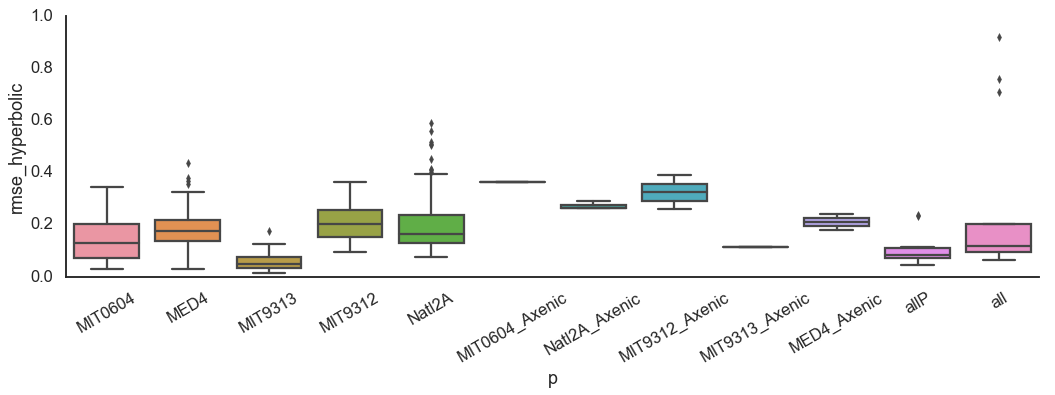

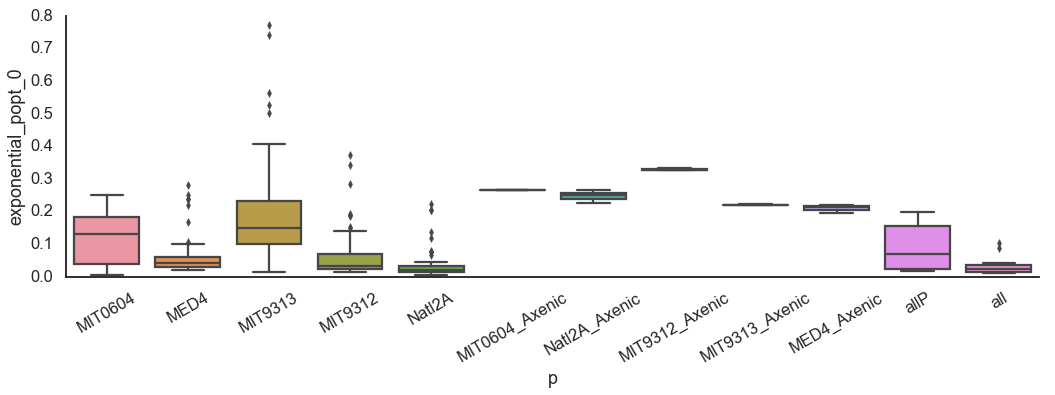

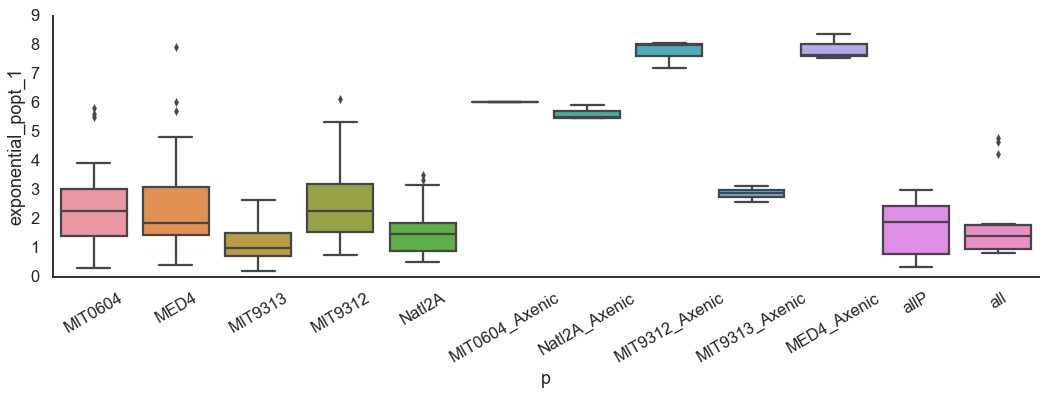

In [39]:
dfscore['p'] = dfscore.PRO
dfscore.loc[dfscore.culture.isin(['Axenic']),'p'] = dfscore.loc[dfscore.culture.isin(['Axenic']),'p'] + '_Axenic'

for i in ['rmse_exponential','rmse_hyperbolic', 'exponential_popt_0',  'exponential_popt_1']:
    sns.catplot(data=dfscore, 
                x='p', y=i, kind='box',
           #order=porder, palette=ppallete,
           aspect=3)
    #plt.yscale('log')
    plt.xticks(rotation=30)


In [111]:
dfscore.head()

experiment_sample experiment sample      PRO  ALT     culture  \
0           e1, 10A         e1    10A  MIT0604   DE  Co_Culture   
1           e1, 10B         e1    10B  MIT0604   DE  Co_Culture   
2           e1, 10C         e1    10C  MIT0604   DE  Co_Culture   
3           e1, 11A         e1    11A     MED4  DE1  Co_Culture   
4           e1, 11B         e1    11B     MED4  DE1  Co_Culture   

   exponential_popt_0  exponential_popt_1  exponential_popt_2  \
0            0.012780            0.991545                 0.5   
1            0.012878            1.140255                 0.5   
2            0.011967            0.937424                 0.5   
3            0.080379            6.027784                 0.5   
4            0.053286            3.198720                 1.0   

   rmse_exponential  ...  rmse_hyperbolic_5  bic_hyperbolic  harmonic_popt_0  \
0          0.724620  ...           0.598284     -226.985458         0.255518   
1          0.716624  ...           0.441158     -223.411736         0.215056   
2          0.747768  ...           0.505603     -232.844747         0.321797   
3          0.408427  ...           0.591806     -233.377882         0.345333   
4          0.612492  ...           0.326442     -266.861616         0.357929   

   harmonic_popt_1  harmonic_popt_2  rmse_harmonic  rmse_harmonic_60  \
0         5.053455              1.0       0.256265          0.163775   
1         5.098205              1.0       0.289069          0.172433   
2         5.523854              1.0       0.241878          0.188193   
3         8.566900              1.0       0.267253          0.106491   
4         7.206840              0.5       0.172664          0.098179   

   rmse_harmonic_5  bic_harmonic        p  
0         0.519720   -206.384711  MIT0604  
1         0.409377   -187.353333  MIT0604  
2         0.316664   -215.513794  MIT0604  
3         0.959647   -202.365715     MED4  
4         0.384576   -268.773315     MED4  

[5 rows x 28 columns]

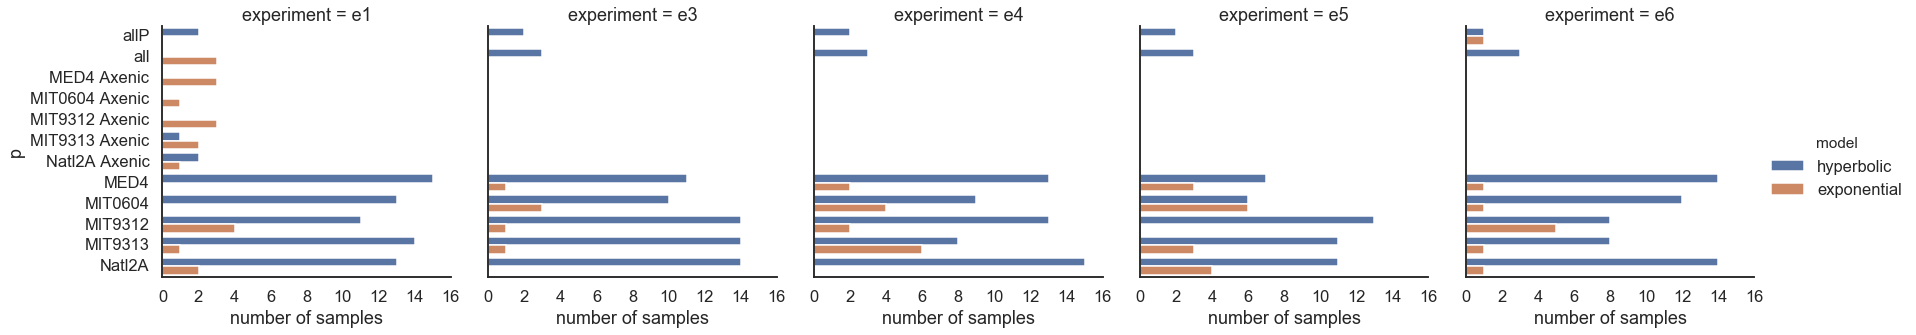

In [43]:
df_best_count = best_model_df.groupby(['culture','p', 'experiment',  'model'])['sample'].count().reset_index()
df_best_count.model =df_best_count.model.map({'bic_exponential': 'exponential', 'bic_hyperbolic': 'hyperbolic'})
df_best_count.rename(columns={'sample': 'number of samples'}, inplace=True)

sns.catplot(data=df_best_count,y='p', hue='model', x='number of samples', #row='culture',
            col='experiment', kind='bar')

In [45]:
value_vars = [ 'FL', 'exponential', 'hyperbolic', 'harmonic',]
id_vars = ['experiment_sample', 'day',  'experiment', 'sample', 'PRO', 'ALT',
       'culture', ]      
dfresm = dfdecline.melt(value_vars=value_vars, id_vars=id_vars )

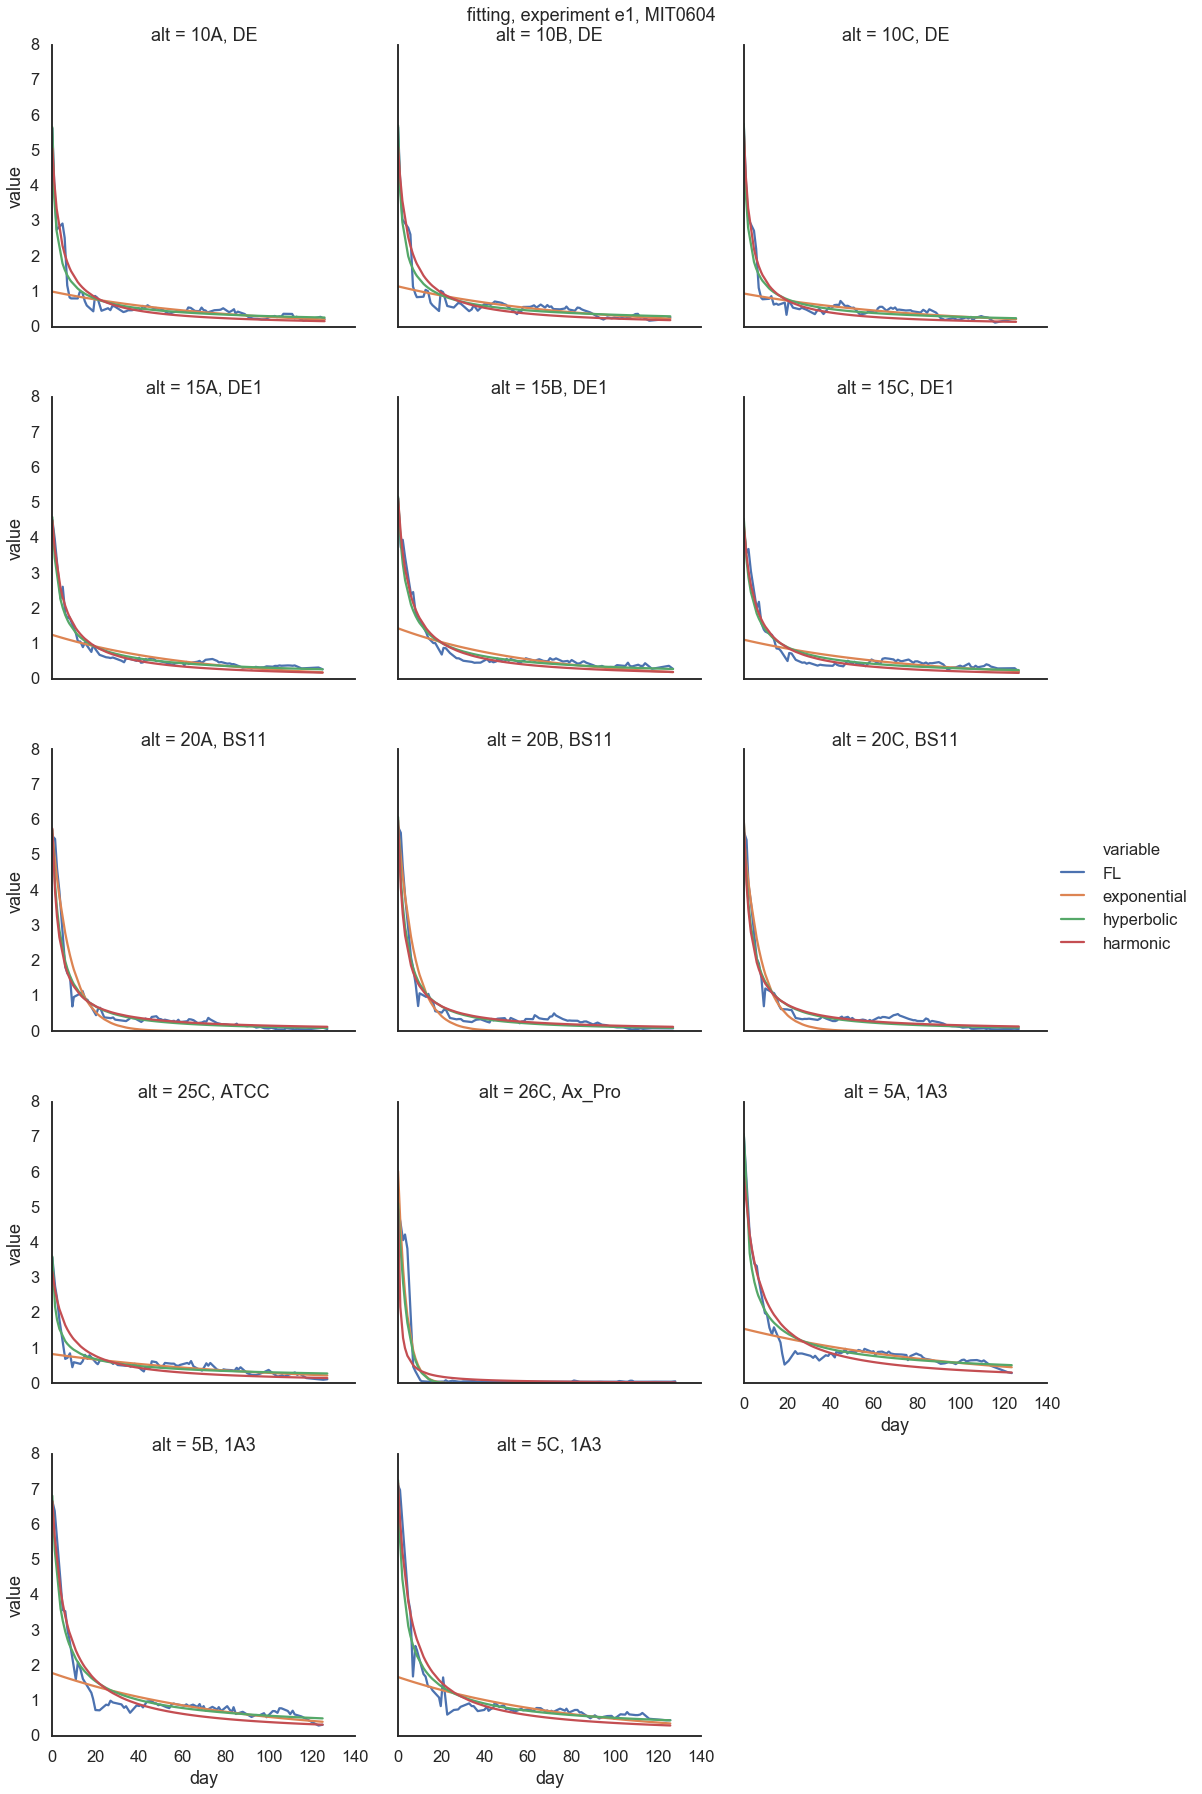

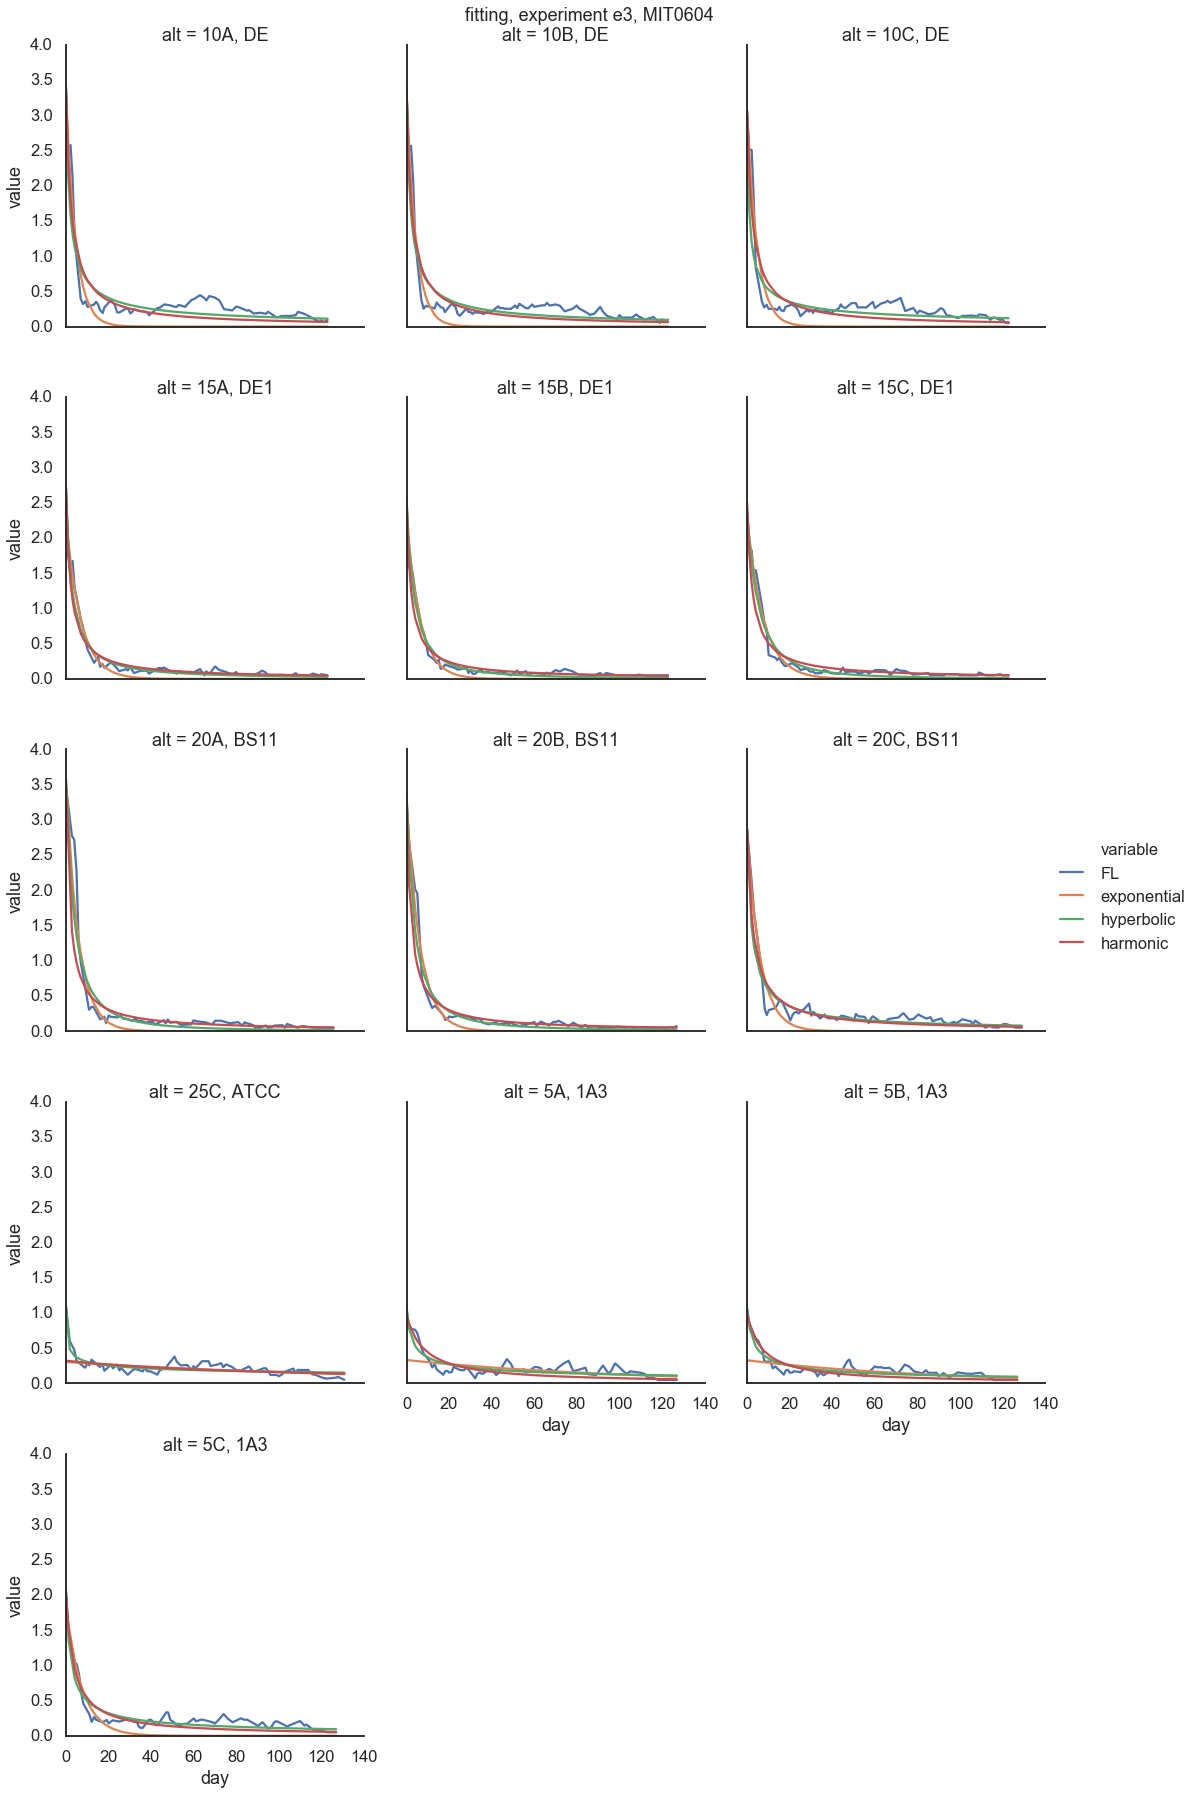

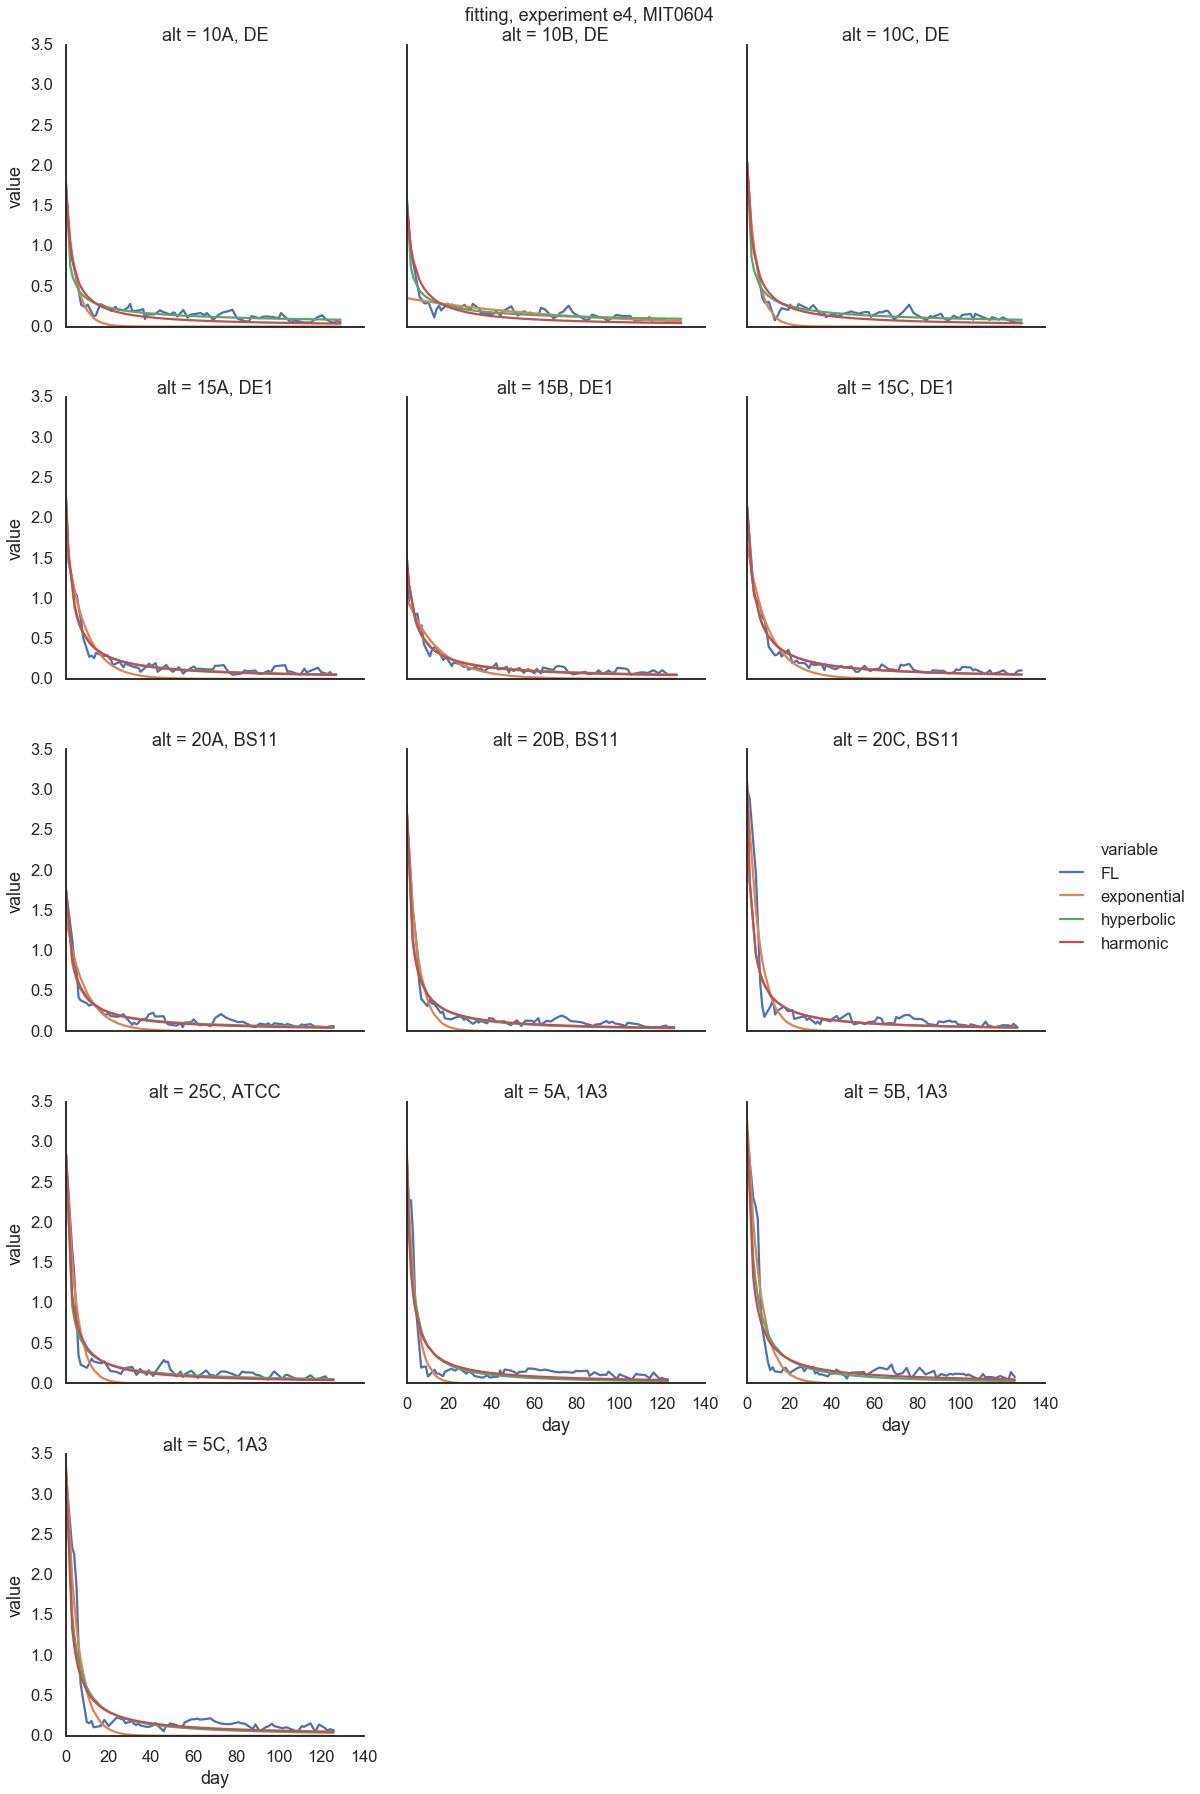

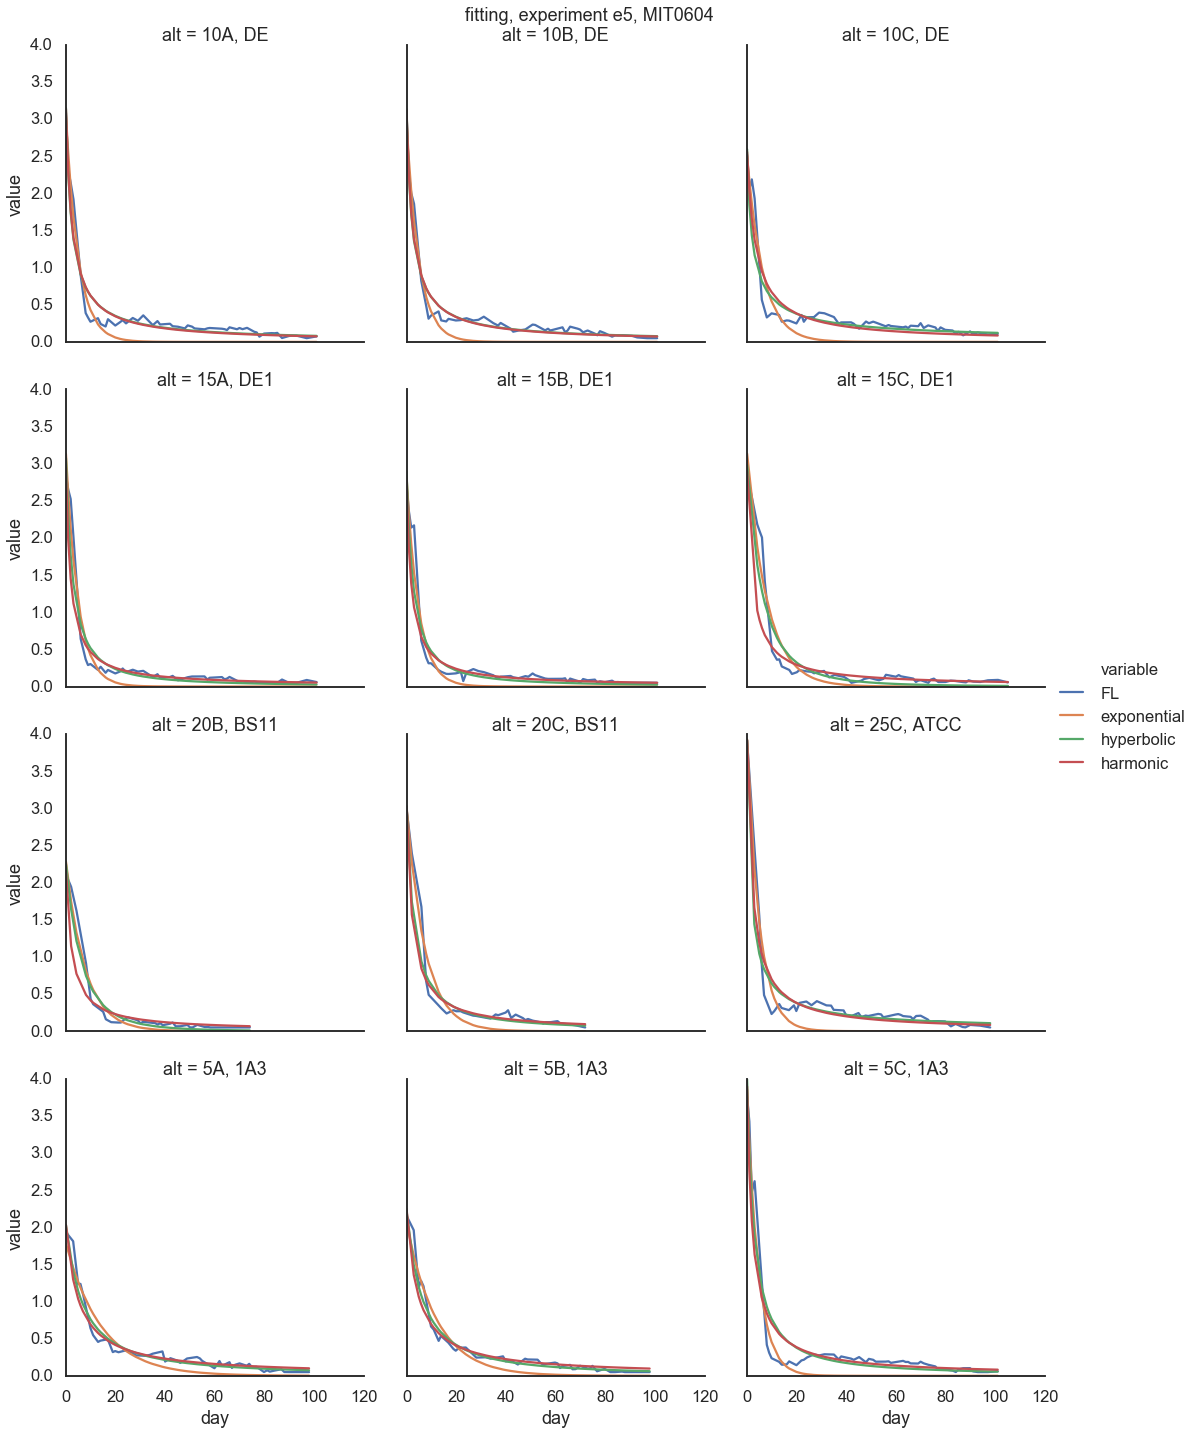

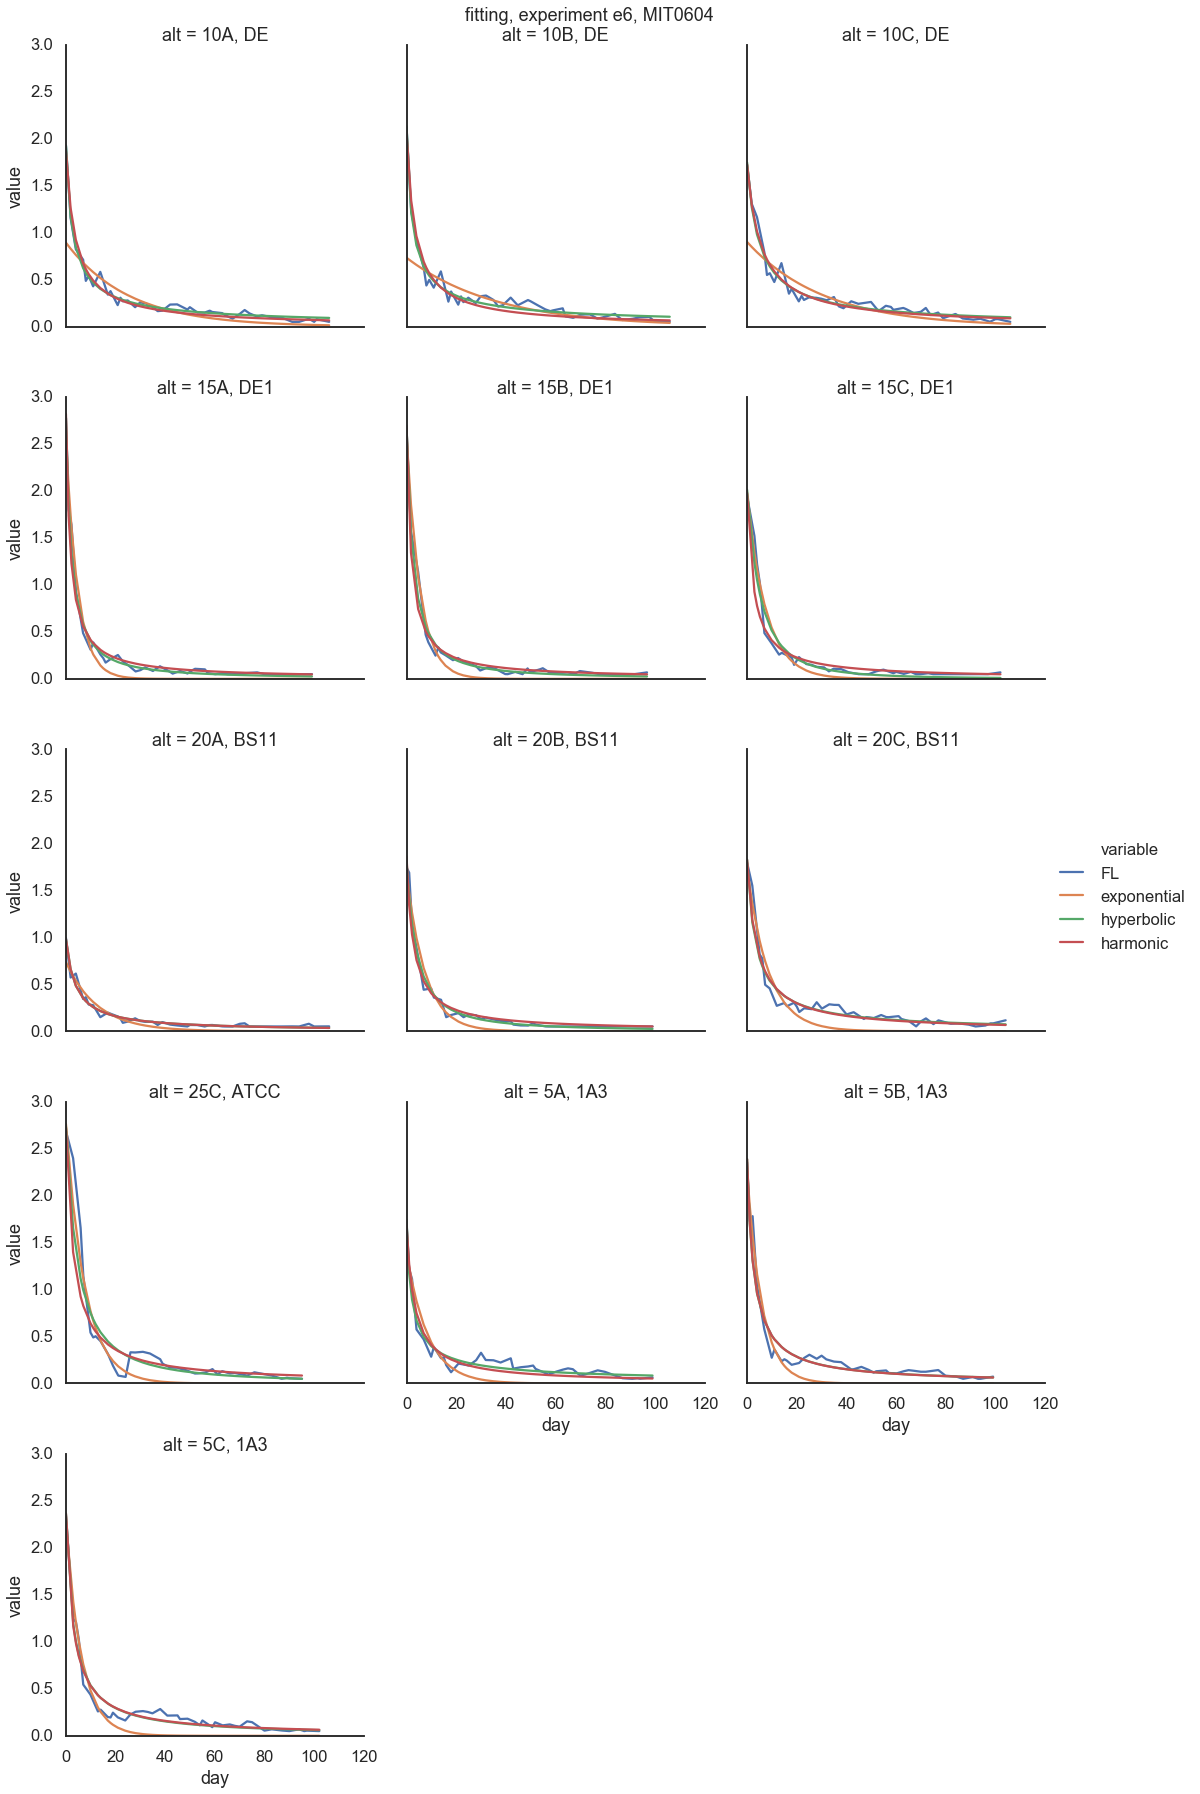

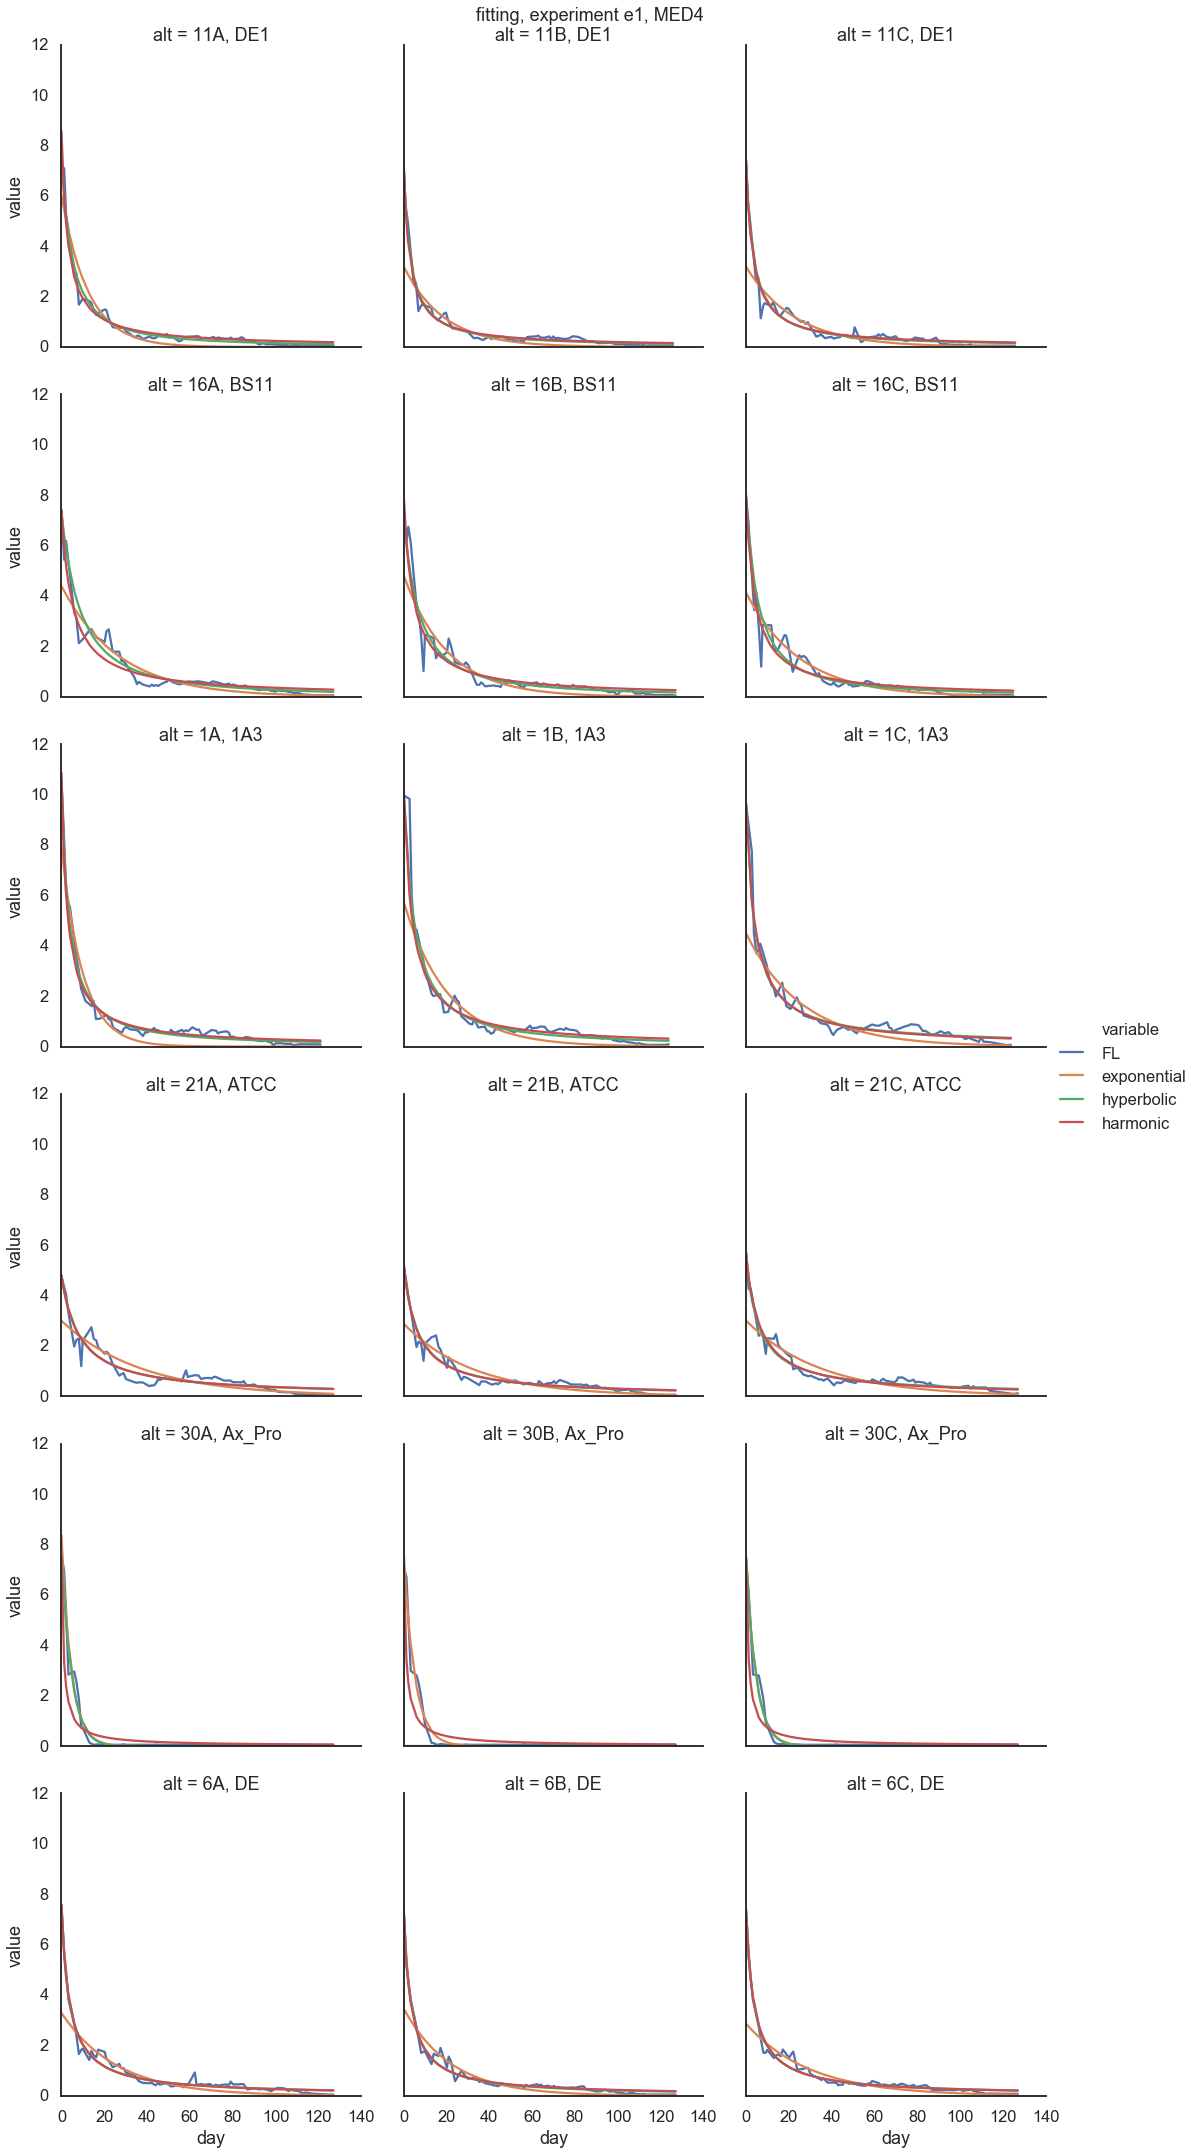

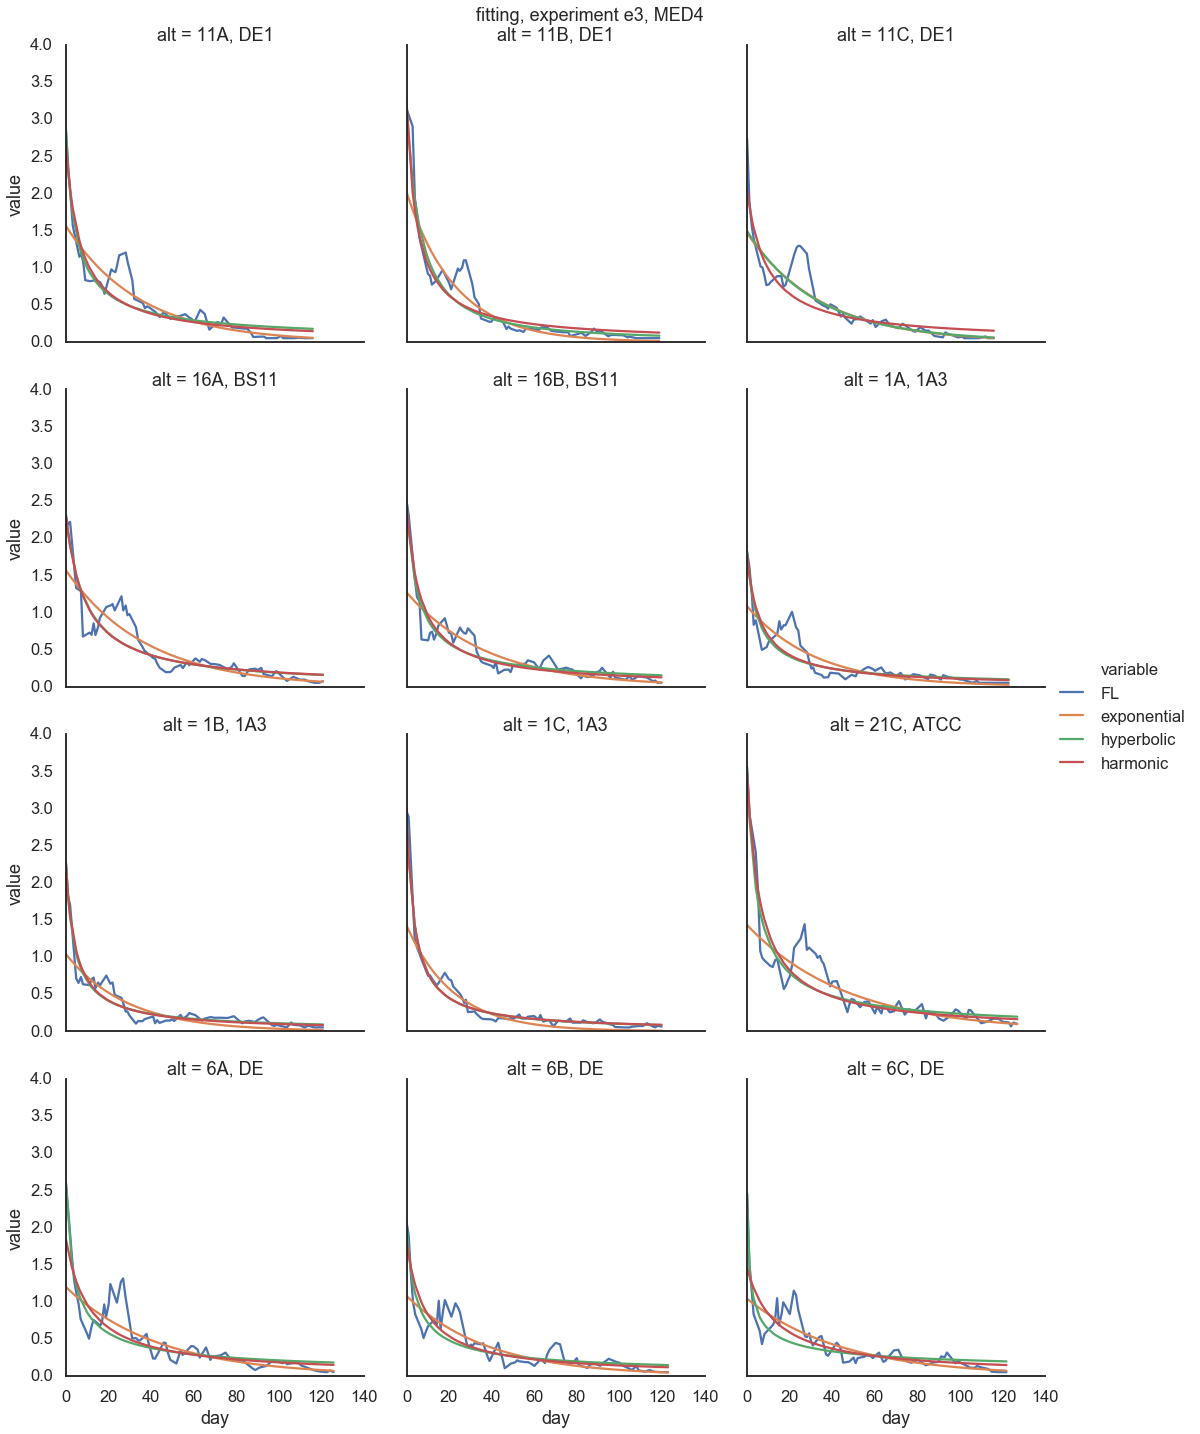

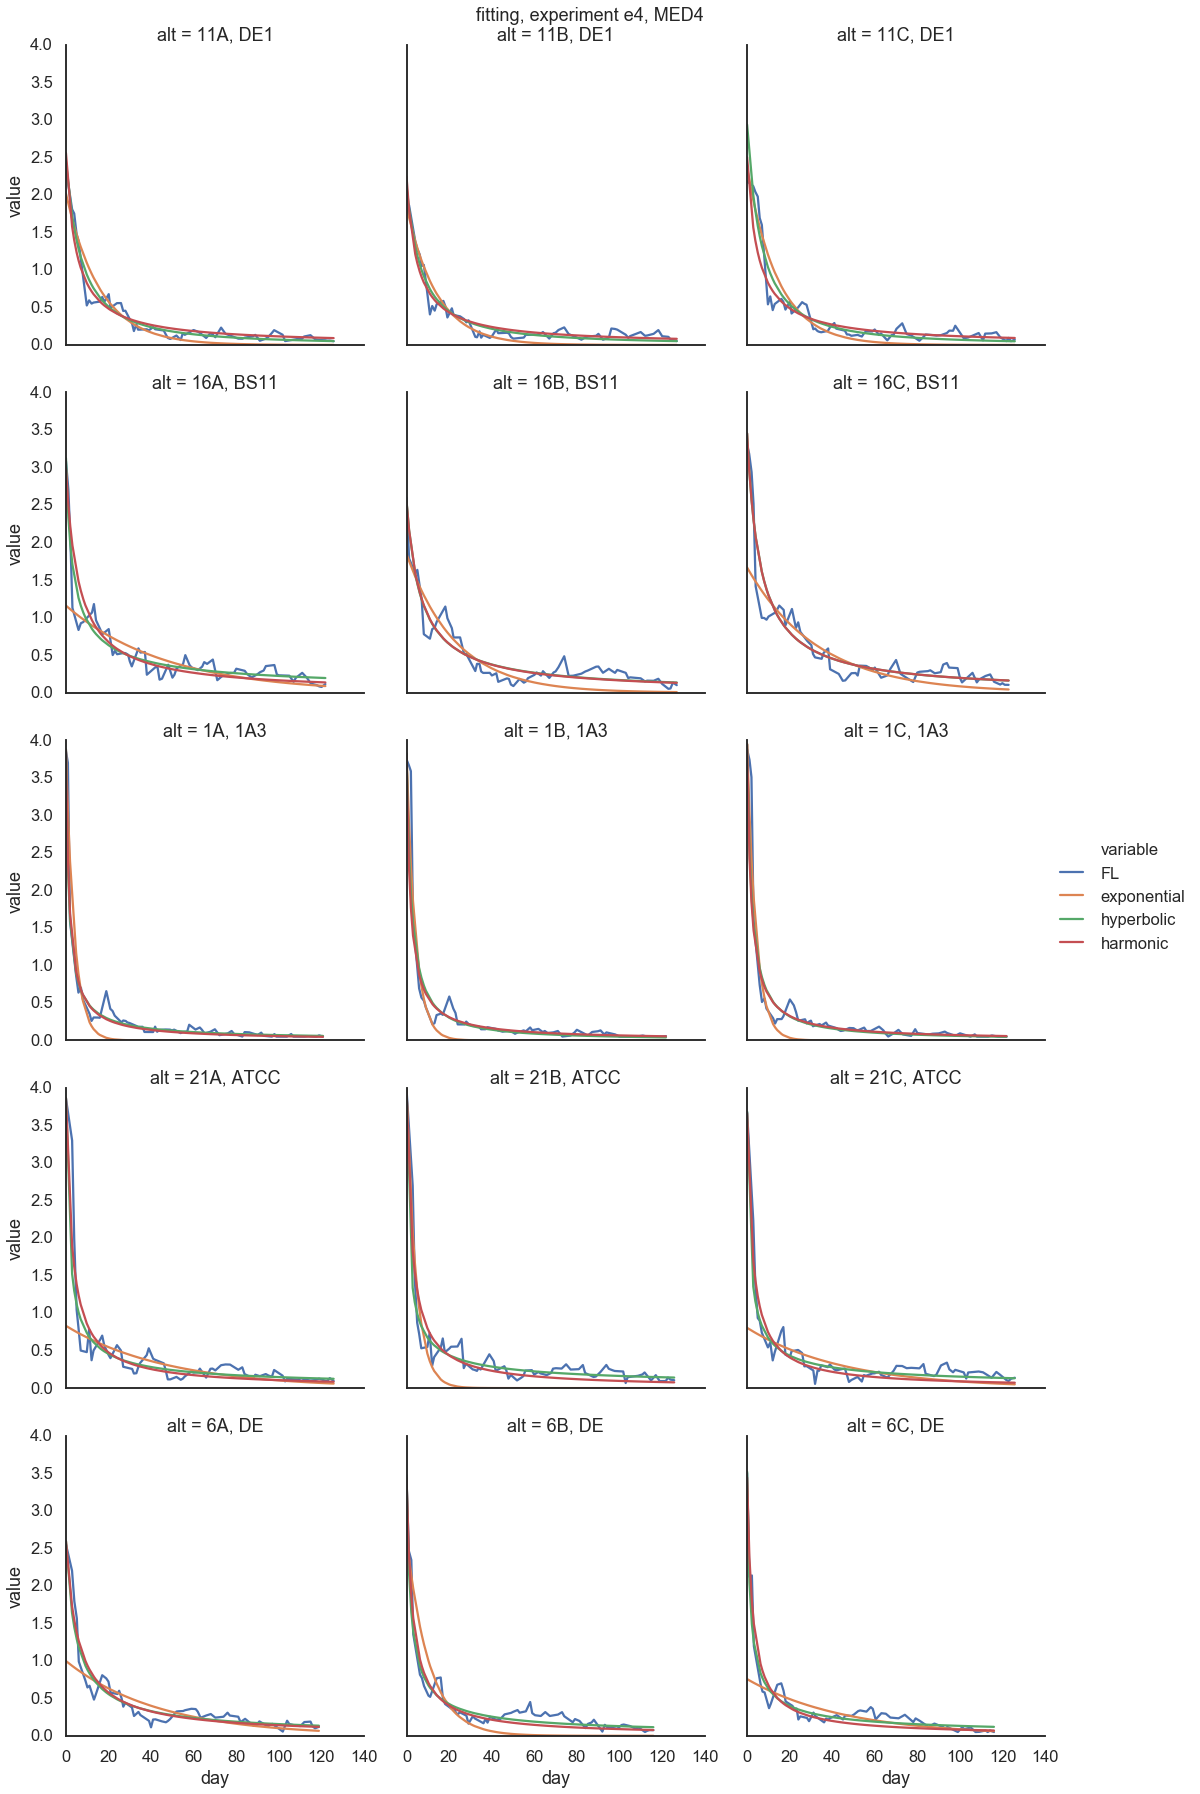

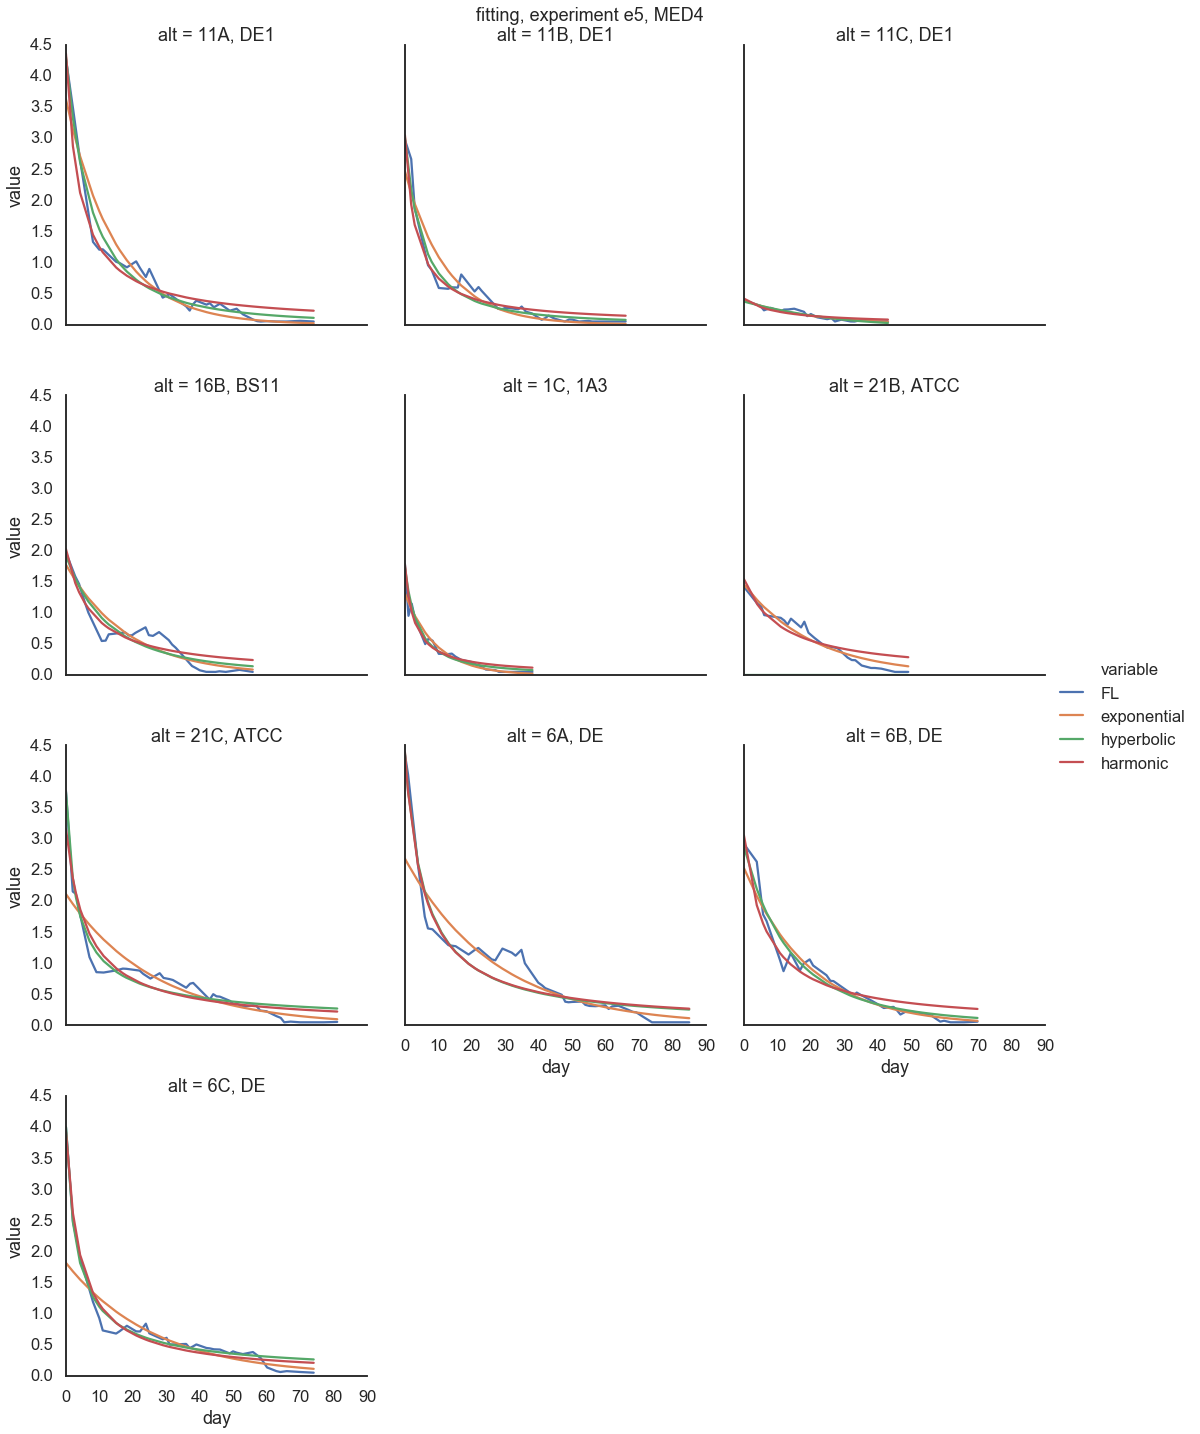

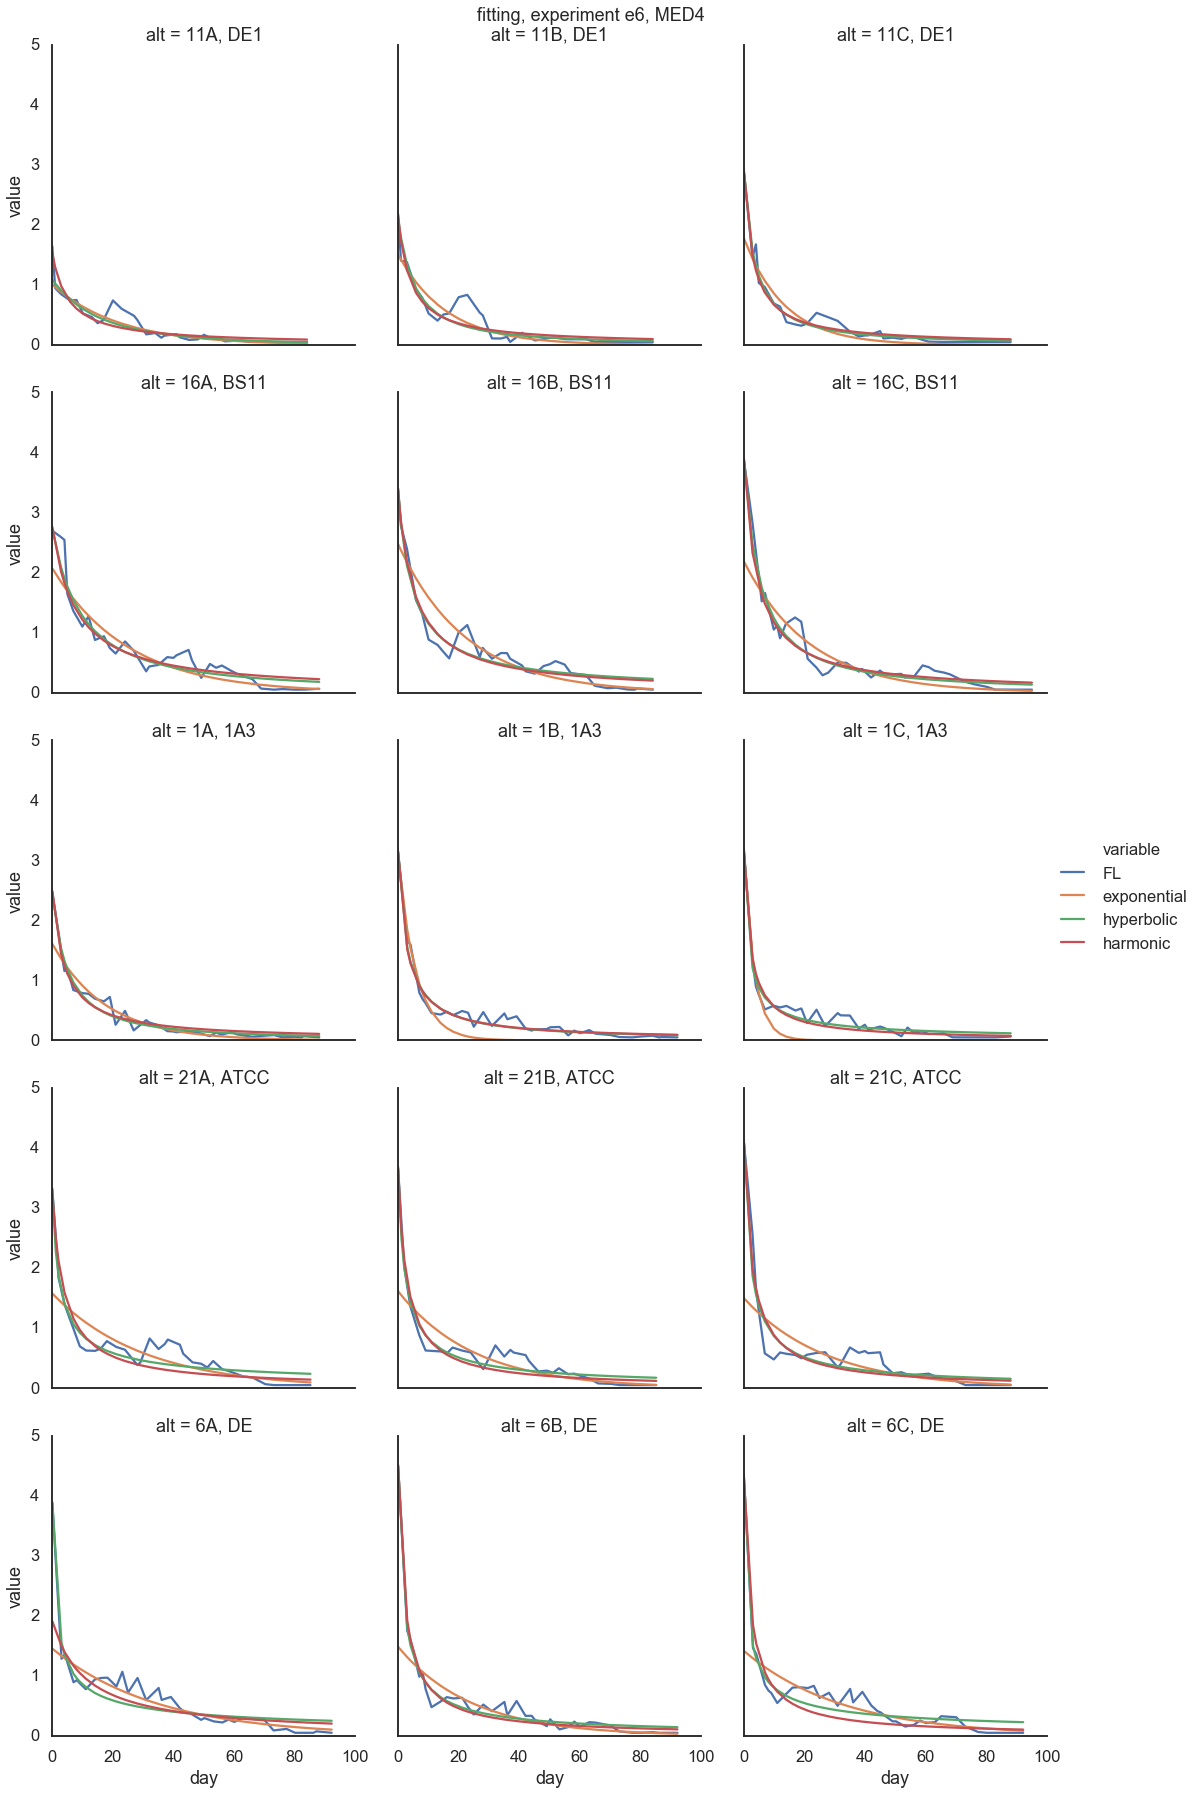

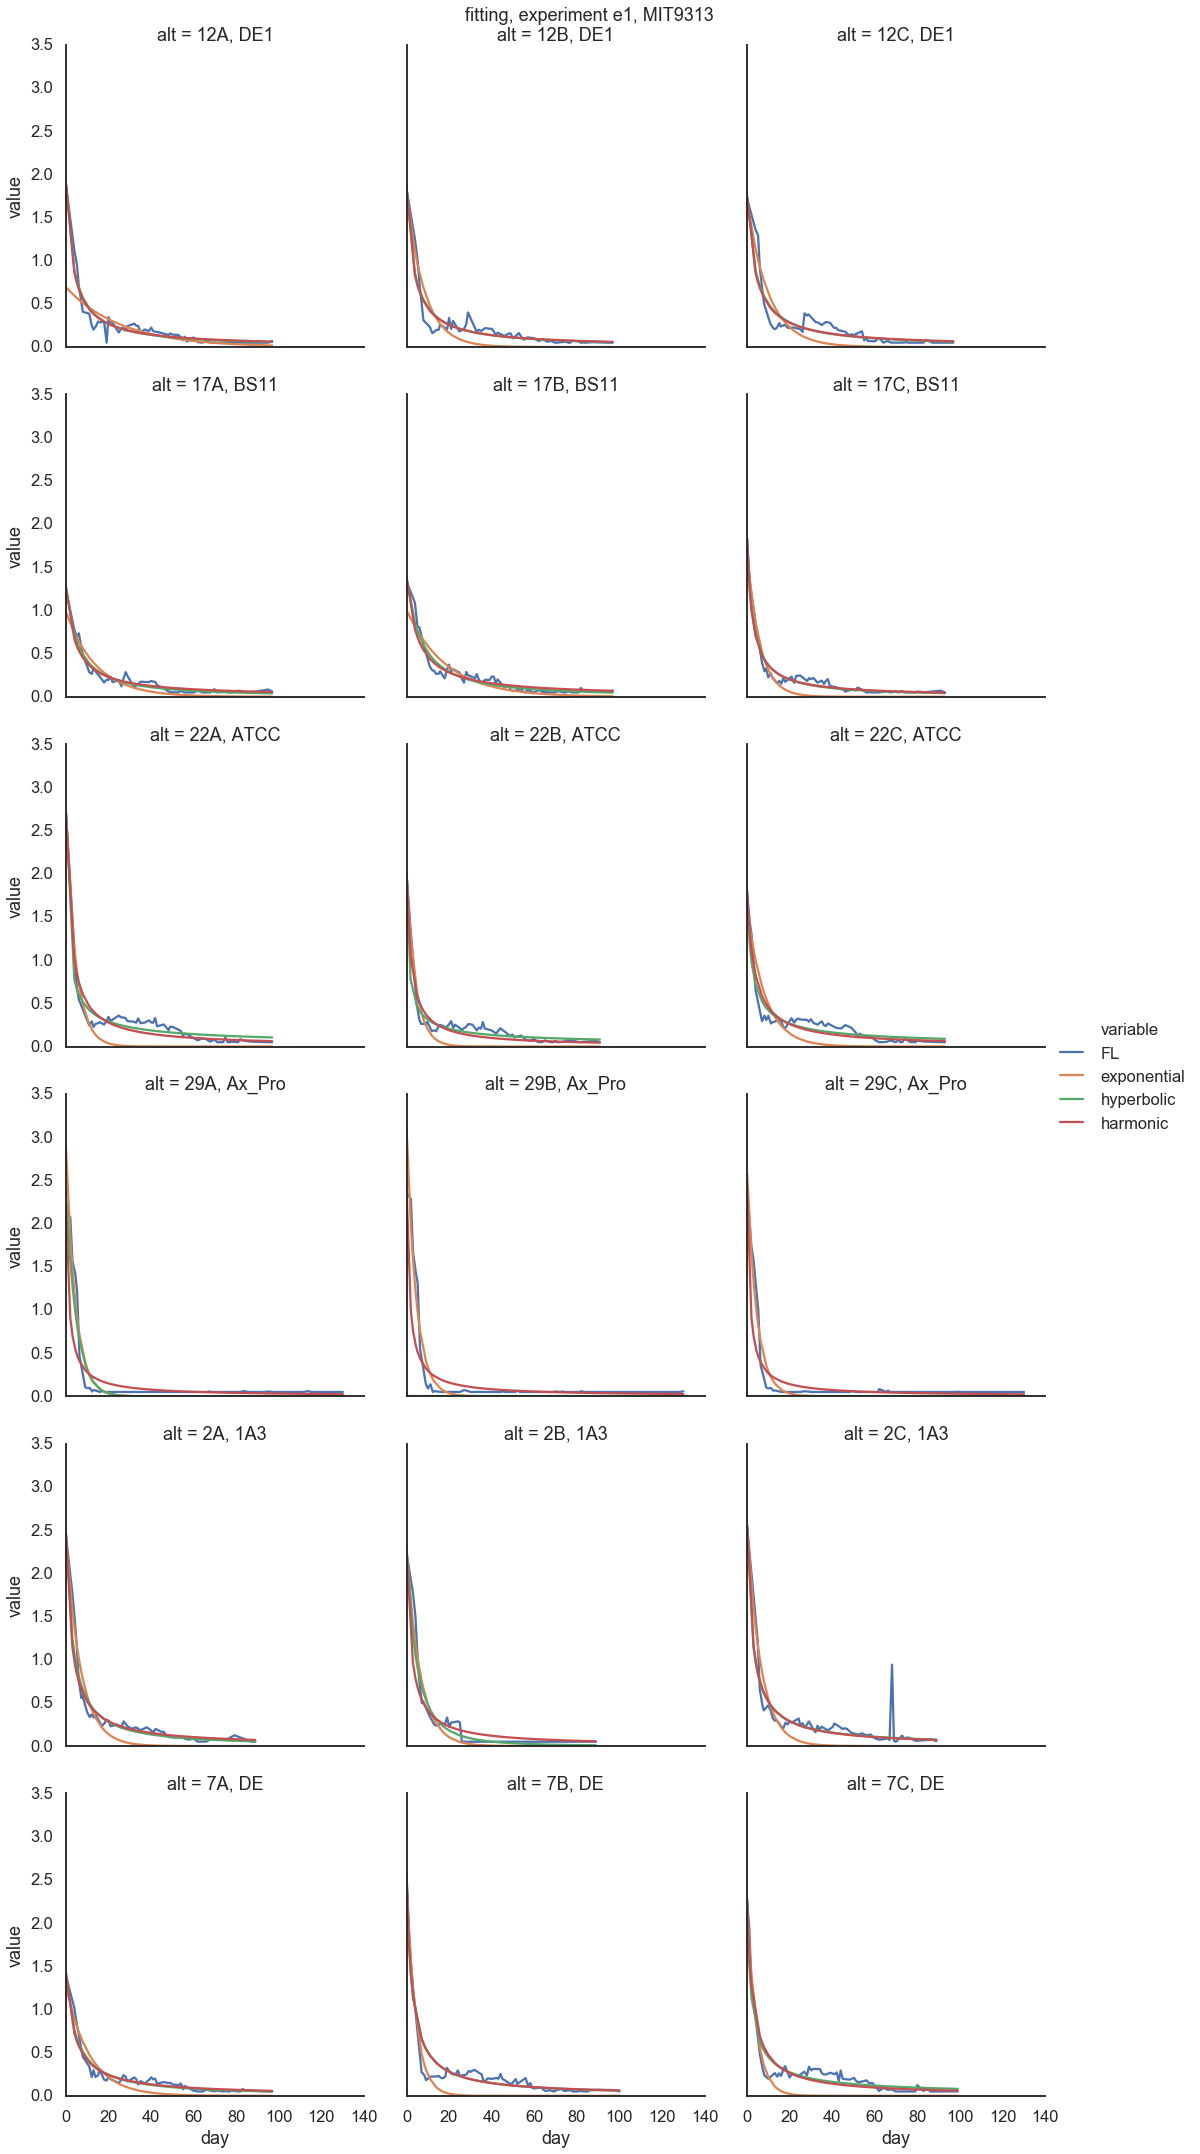

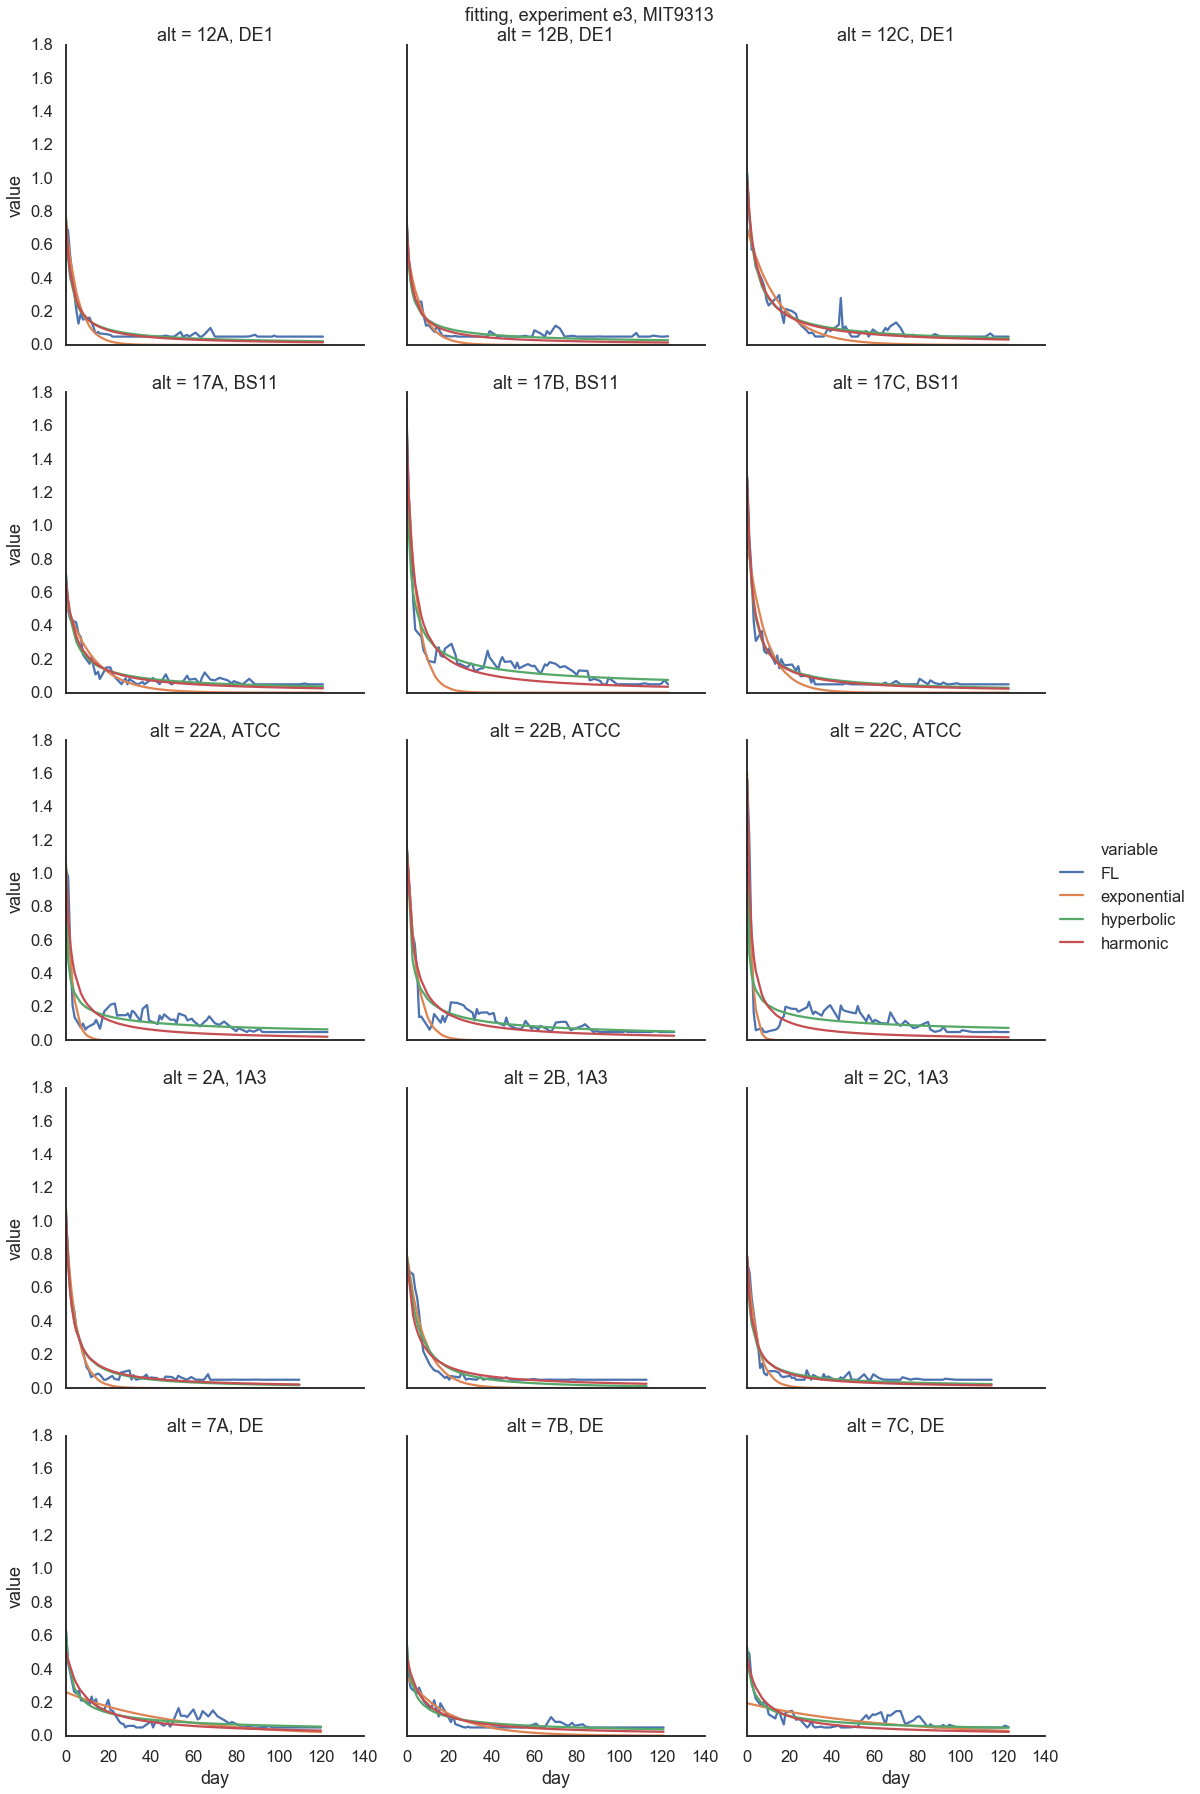

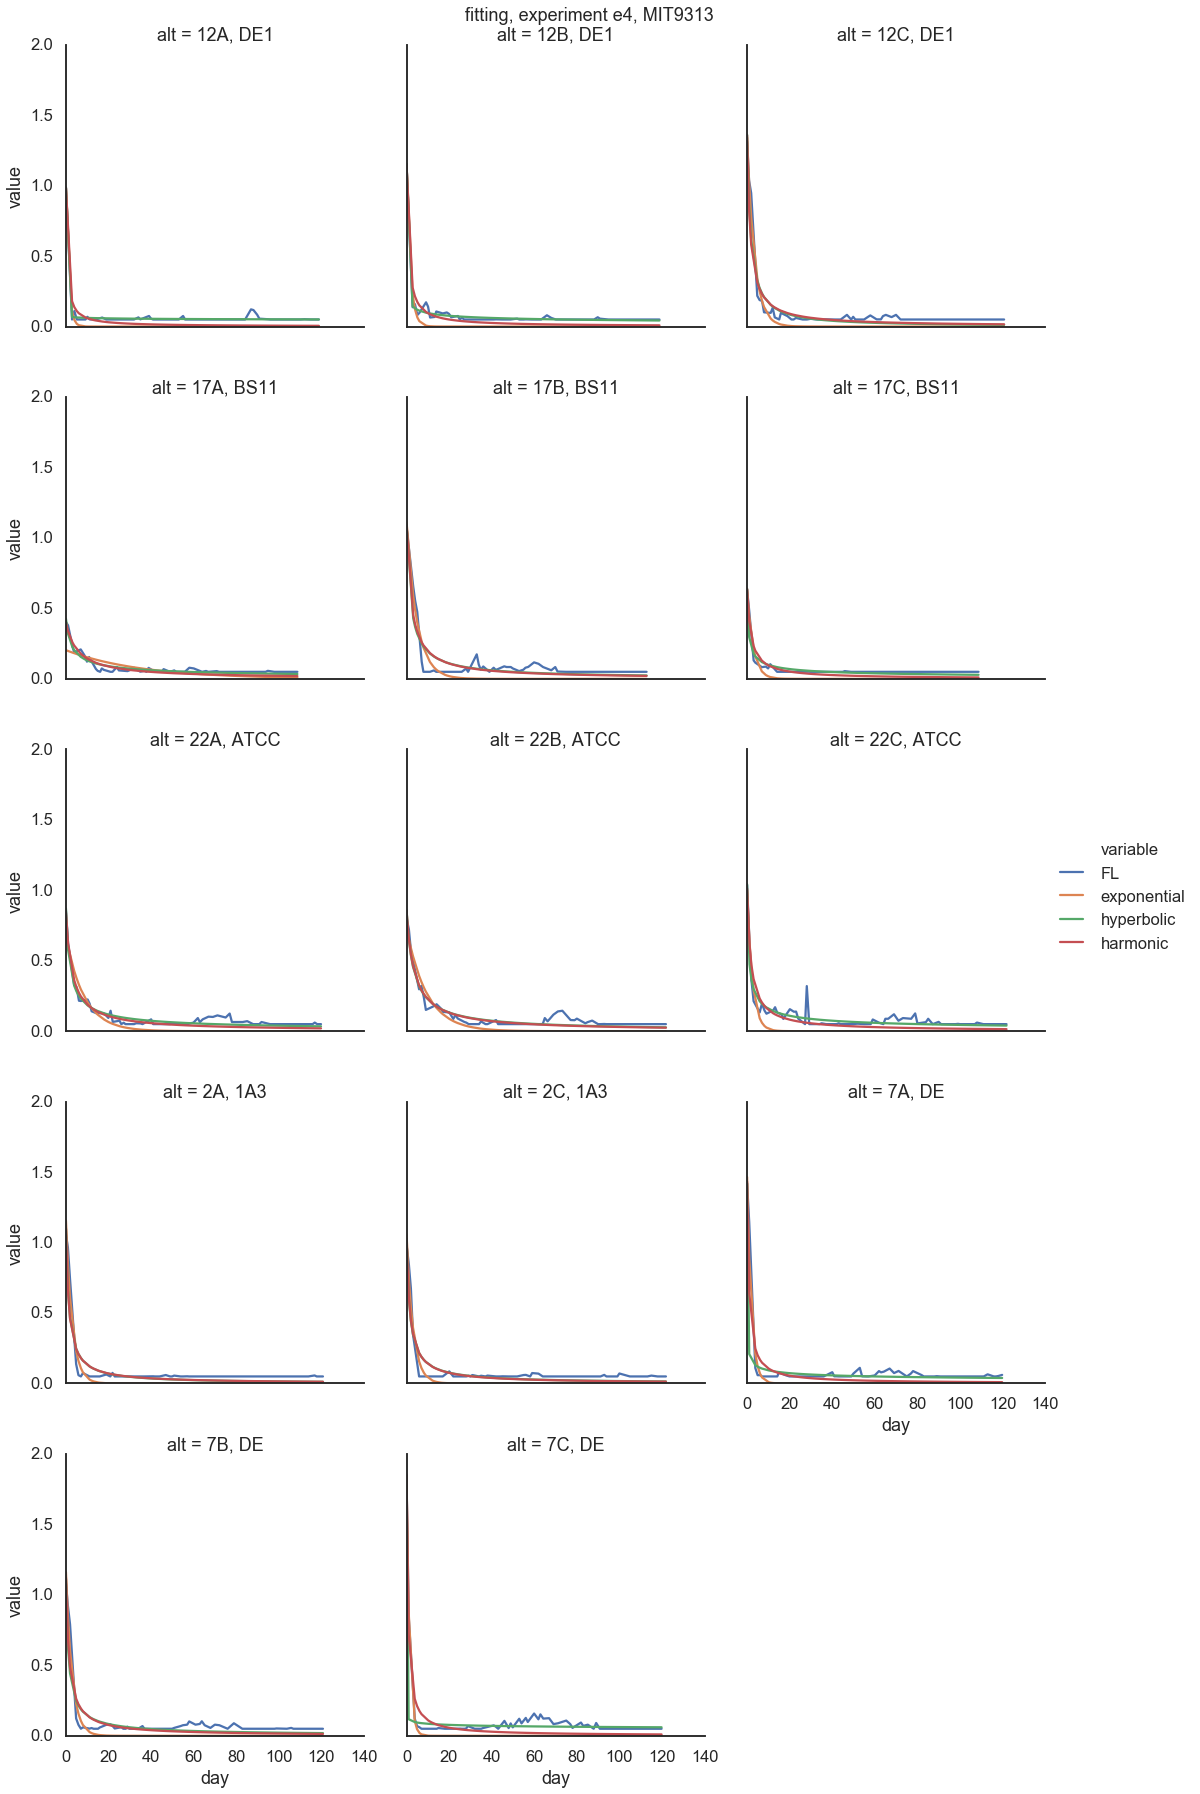

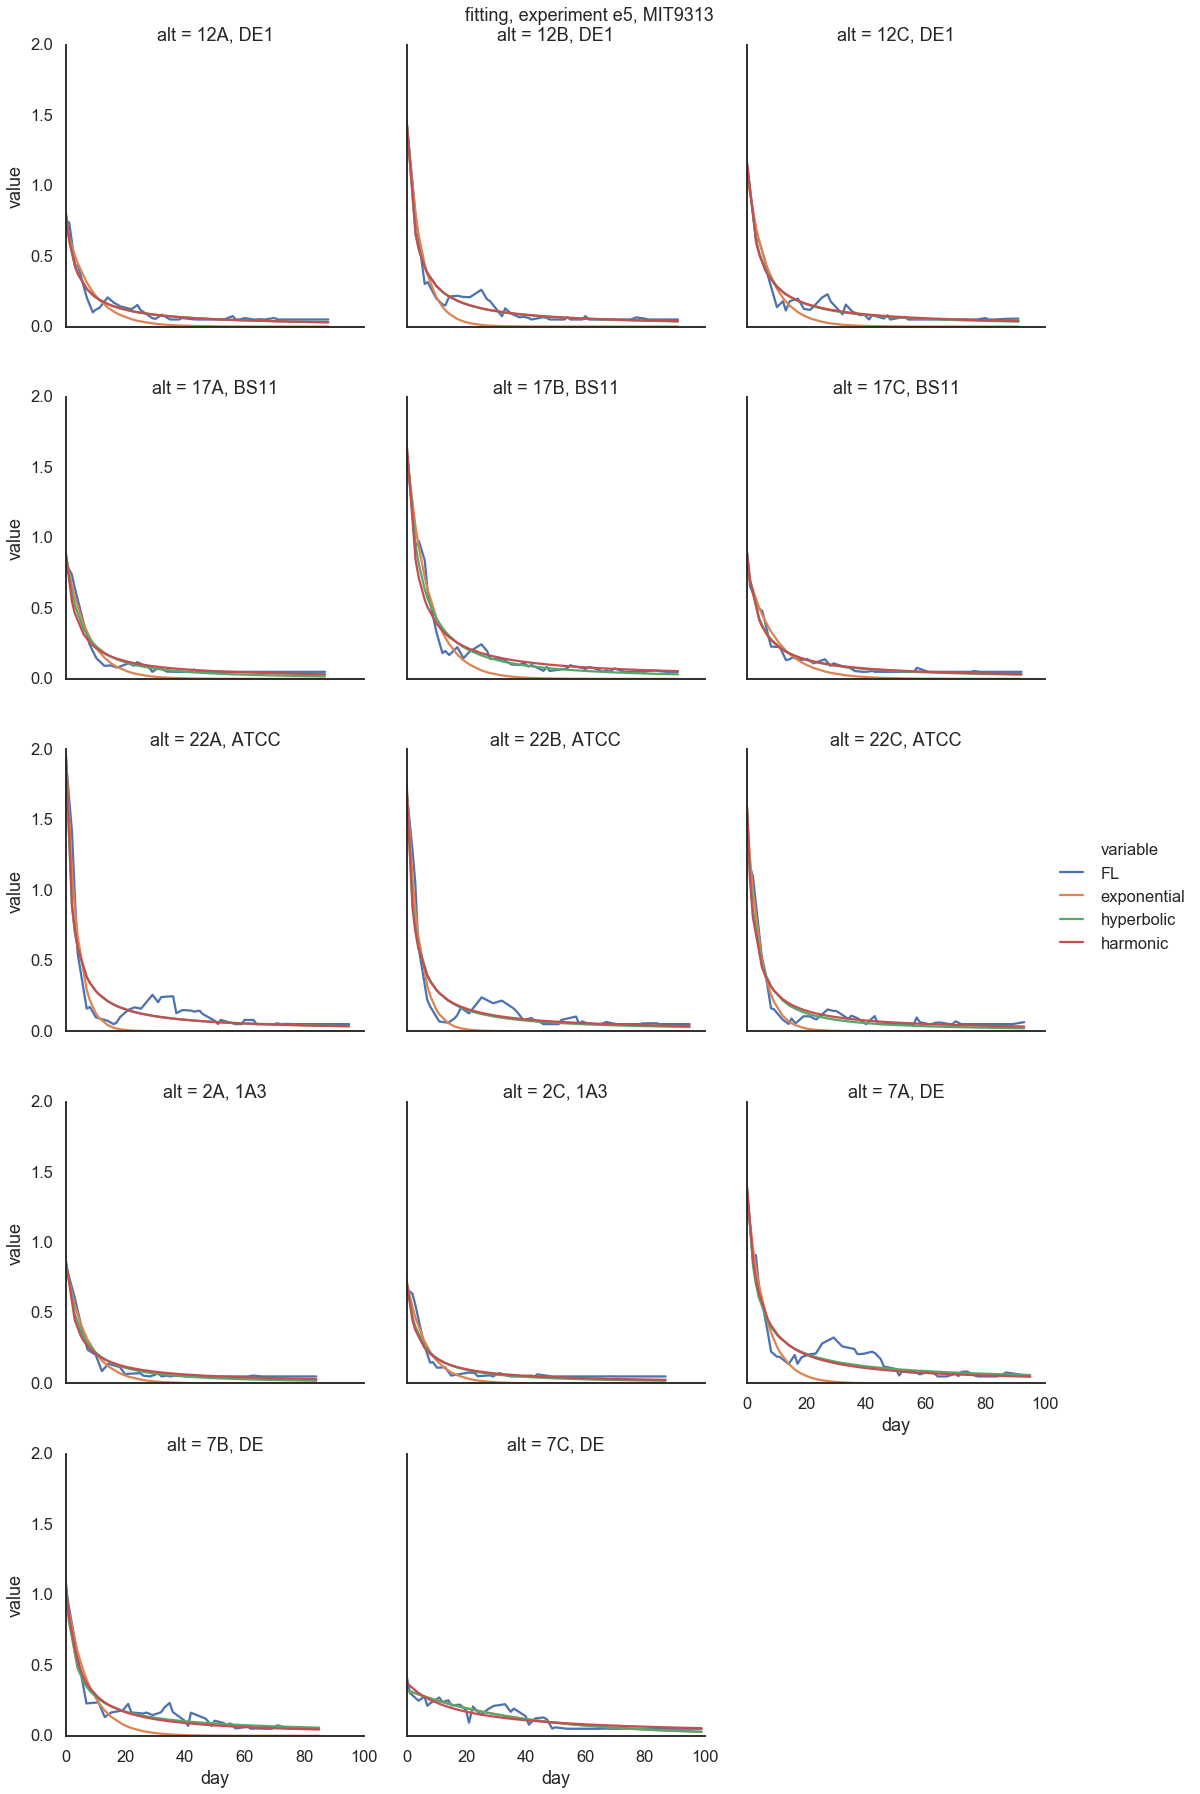

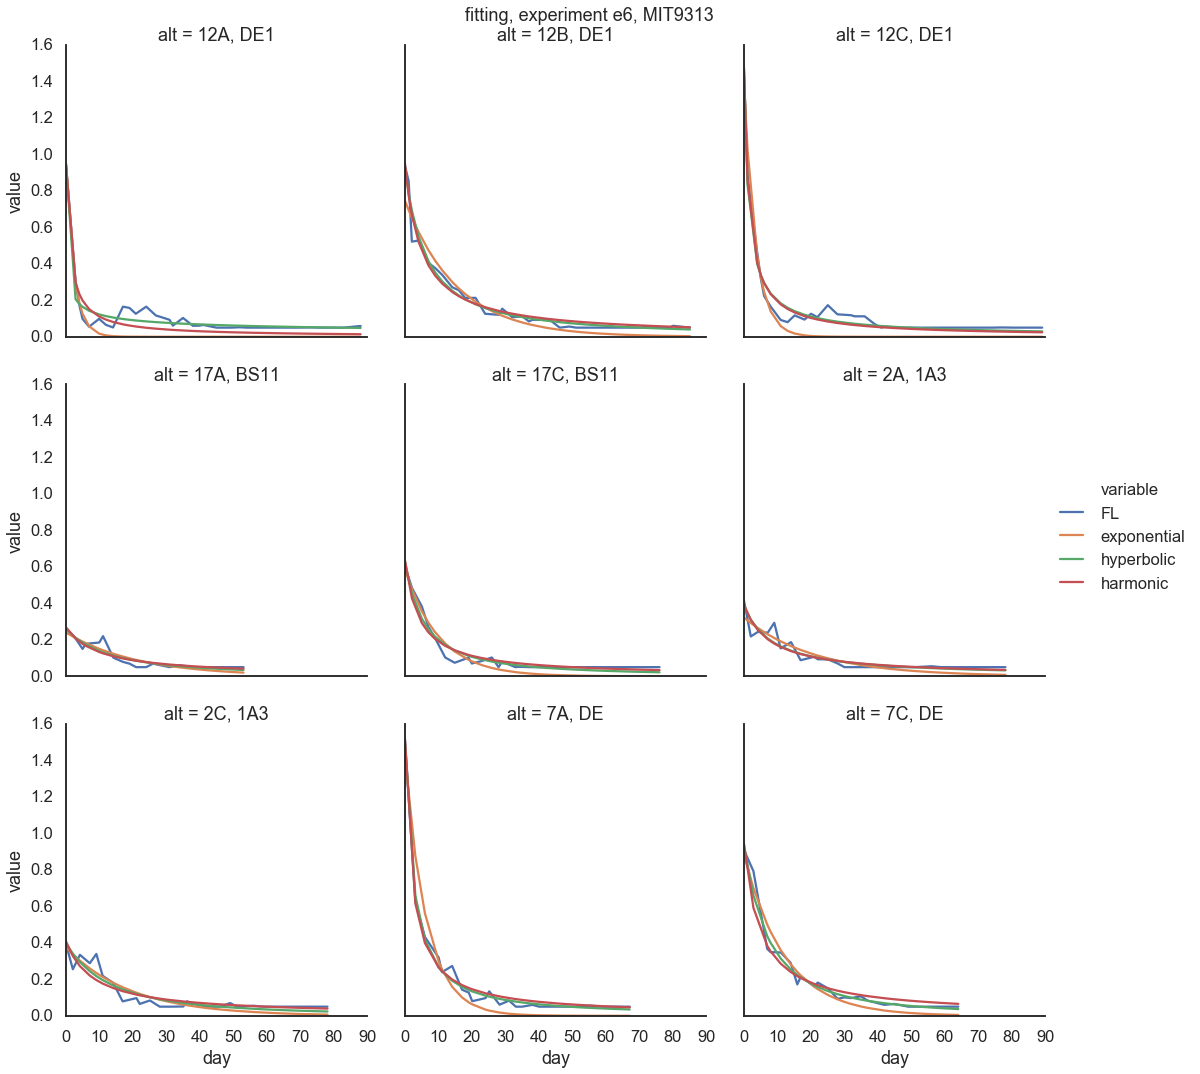

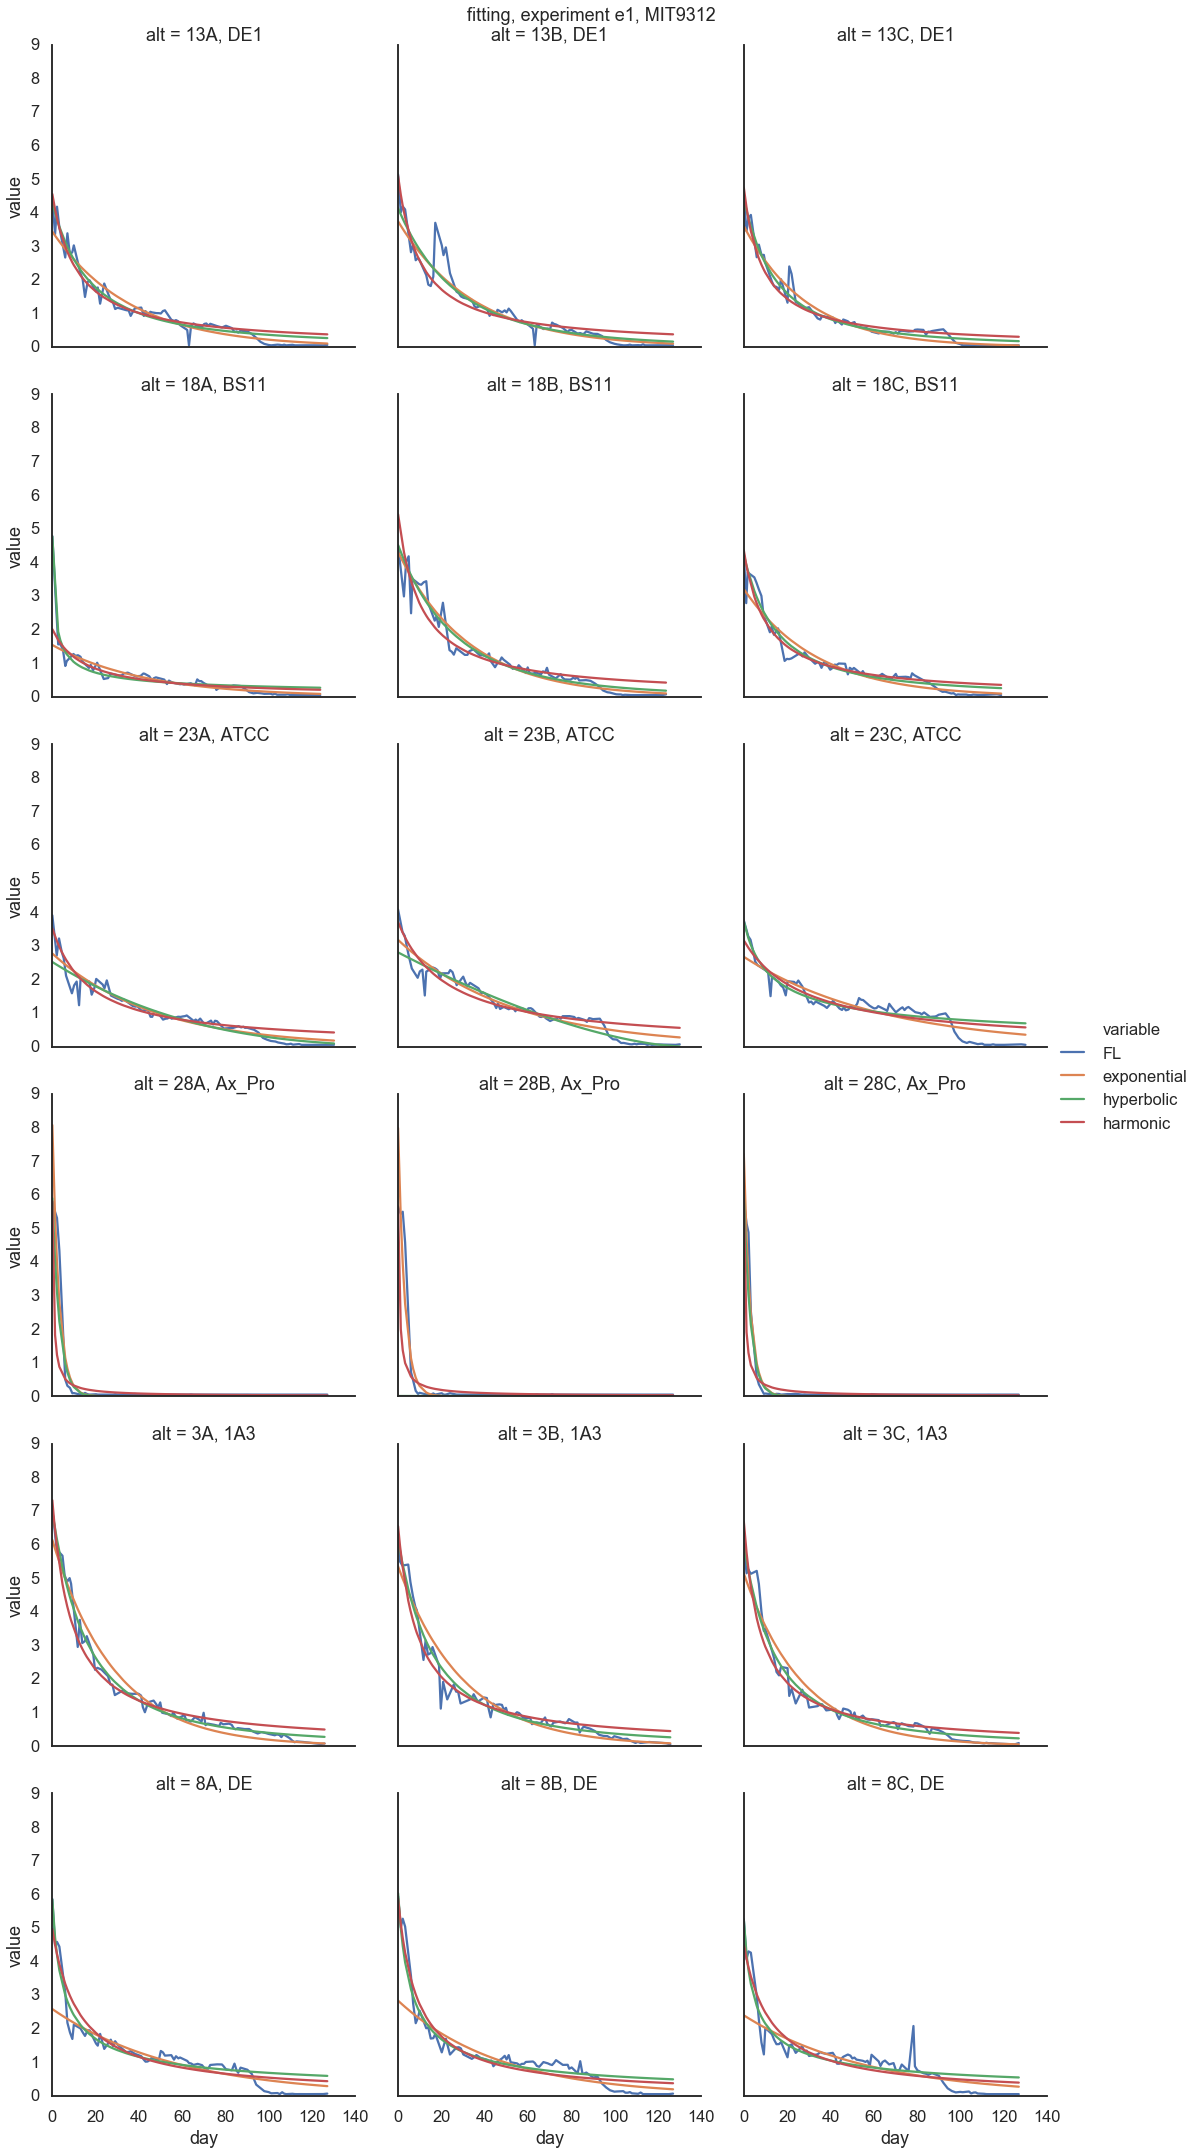

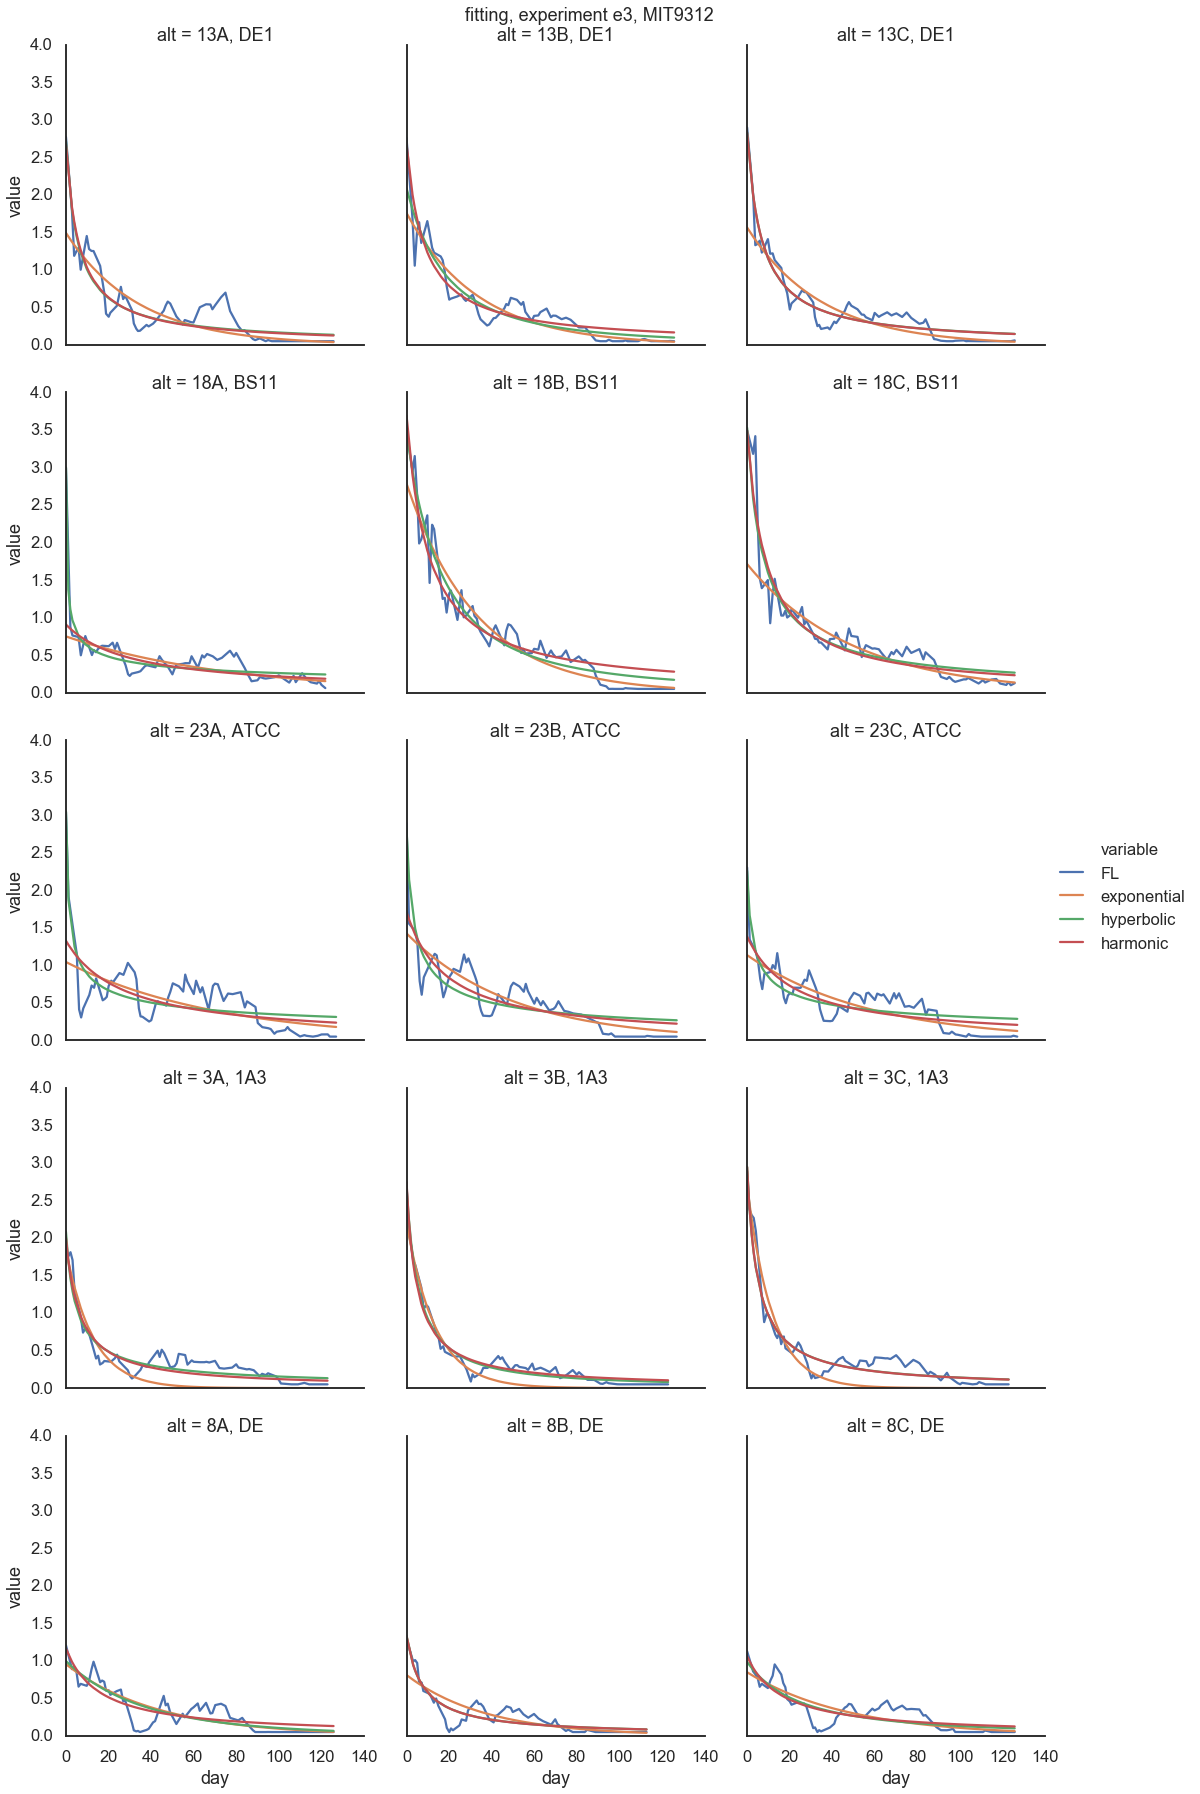

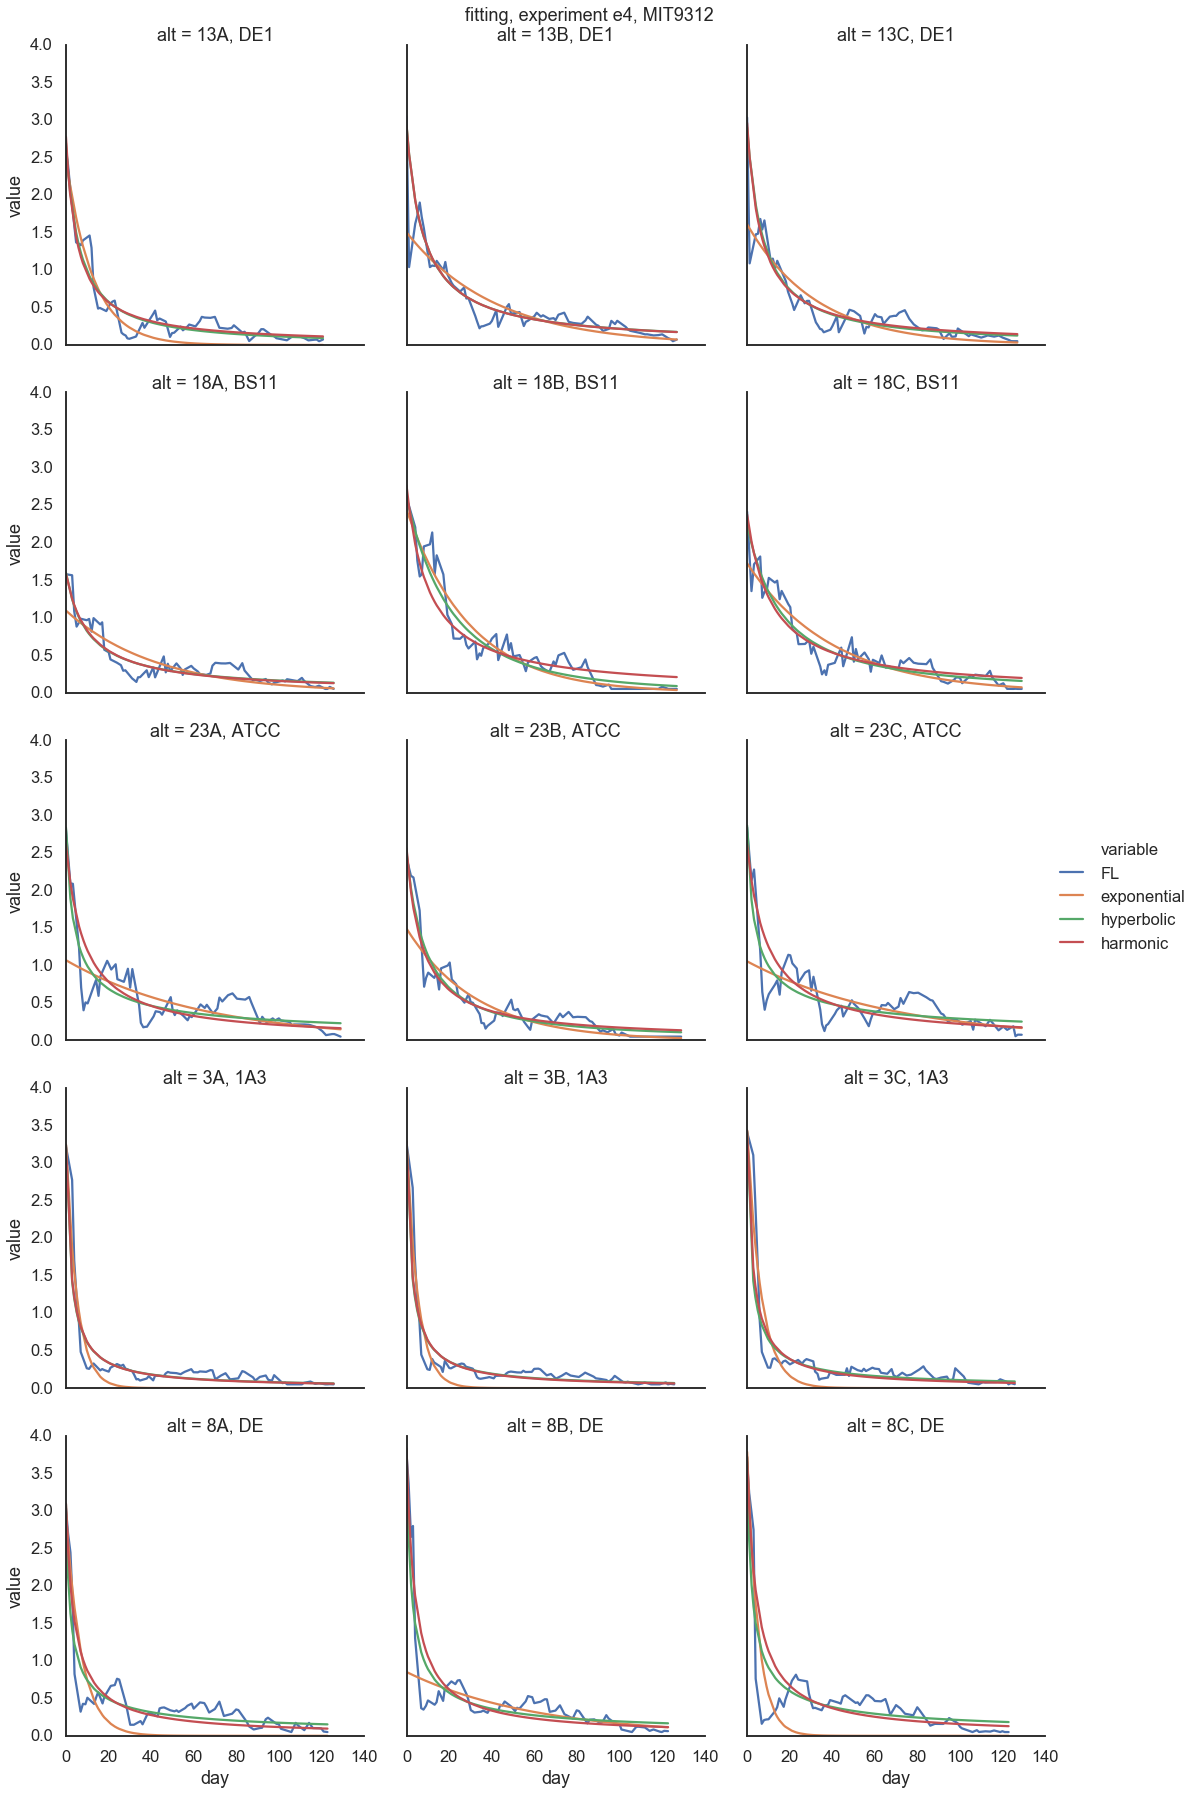

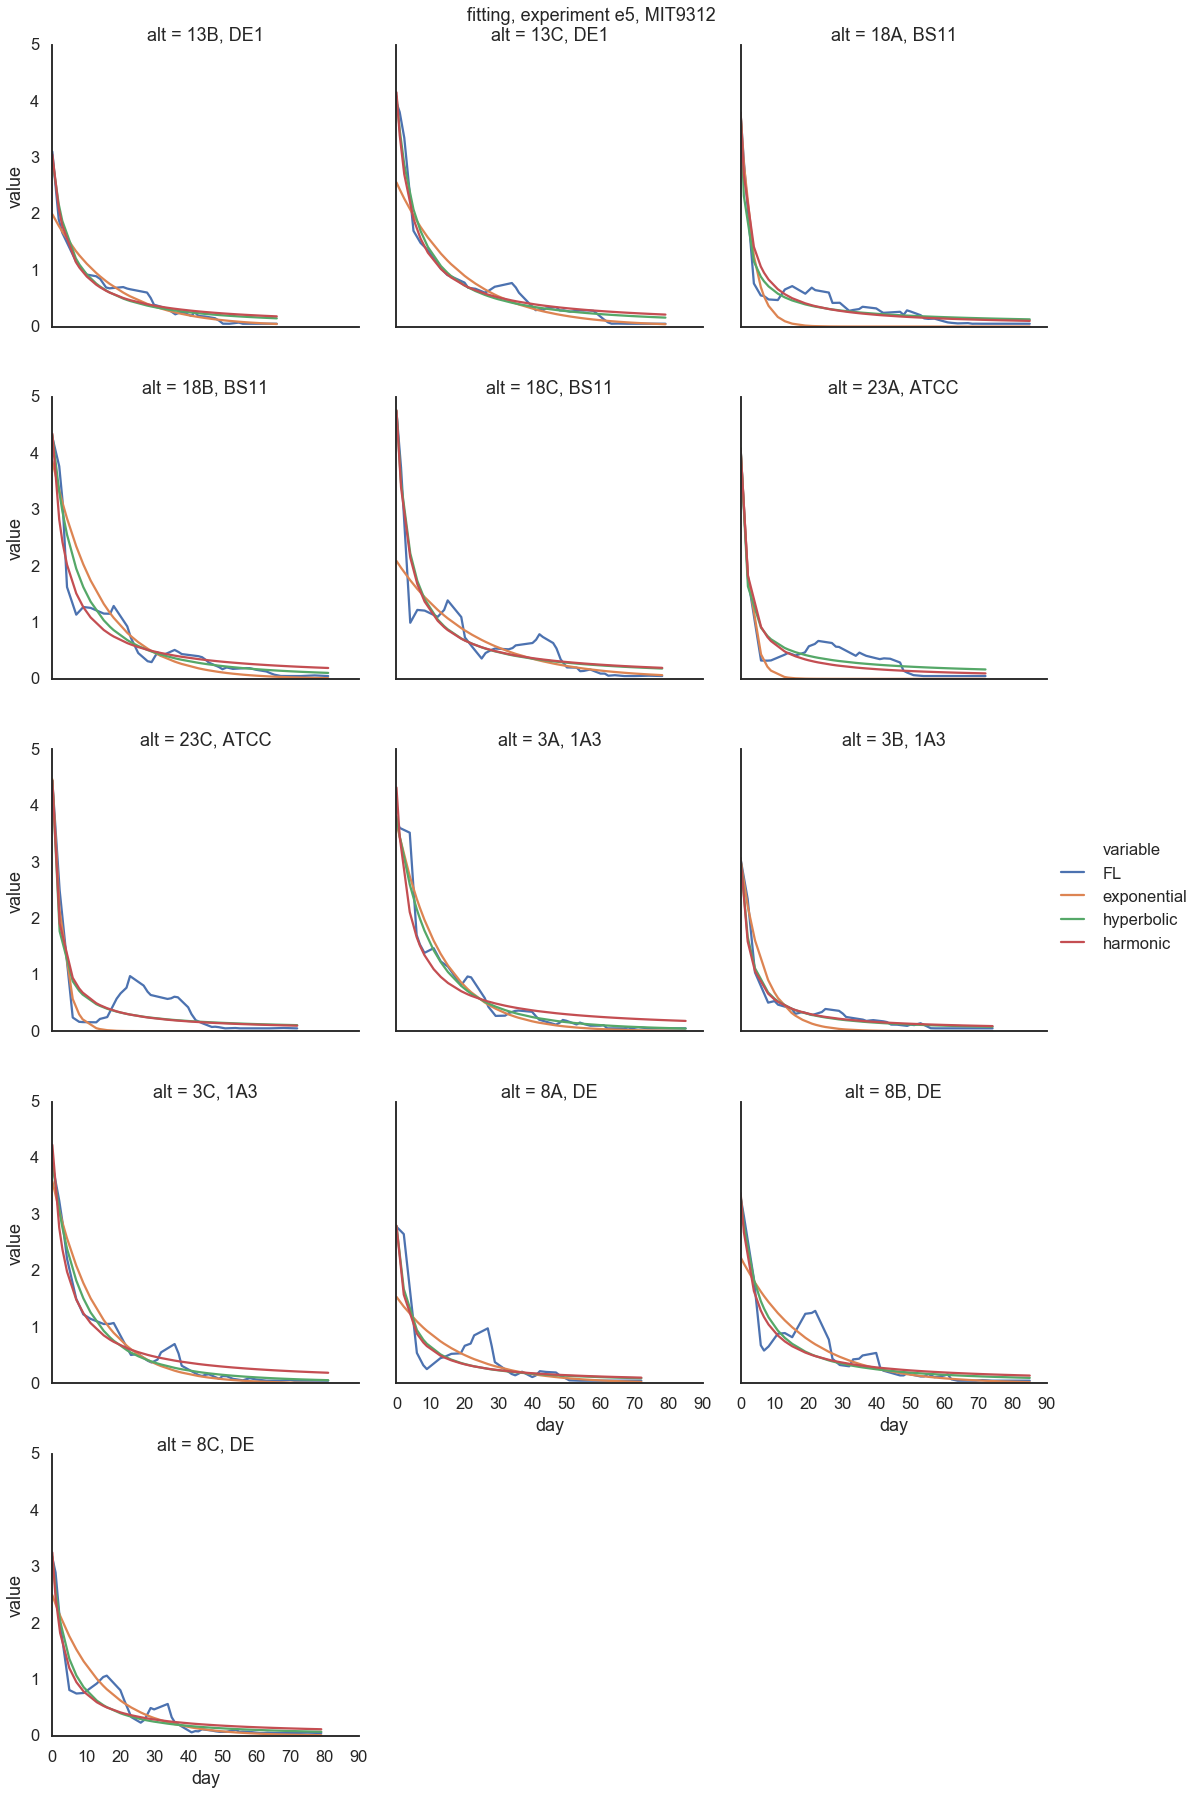

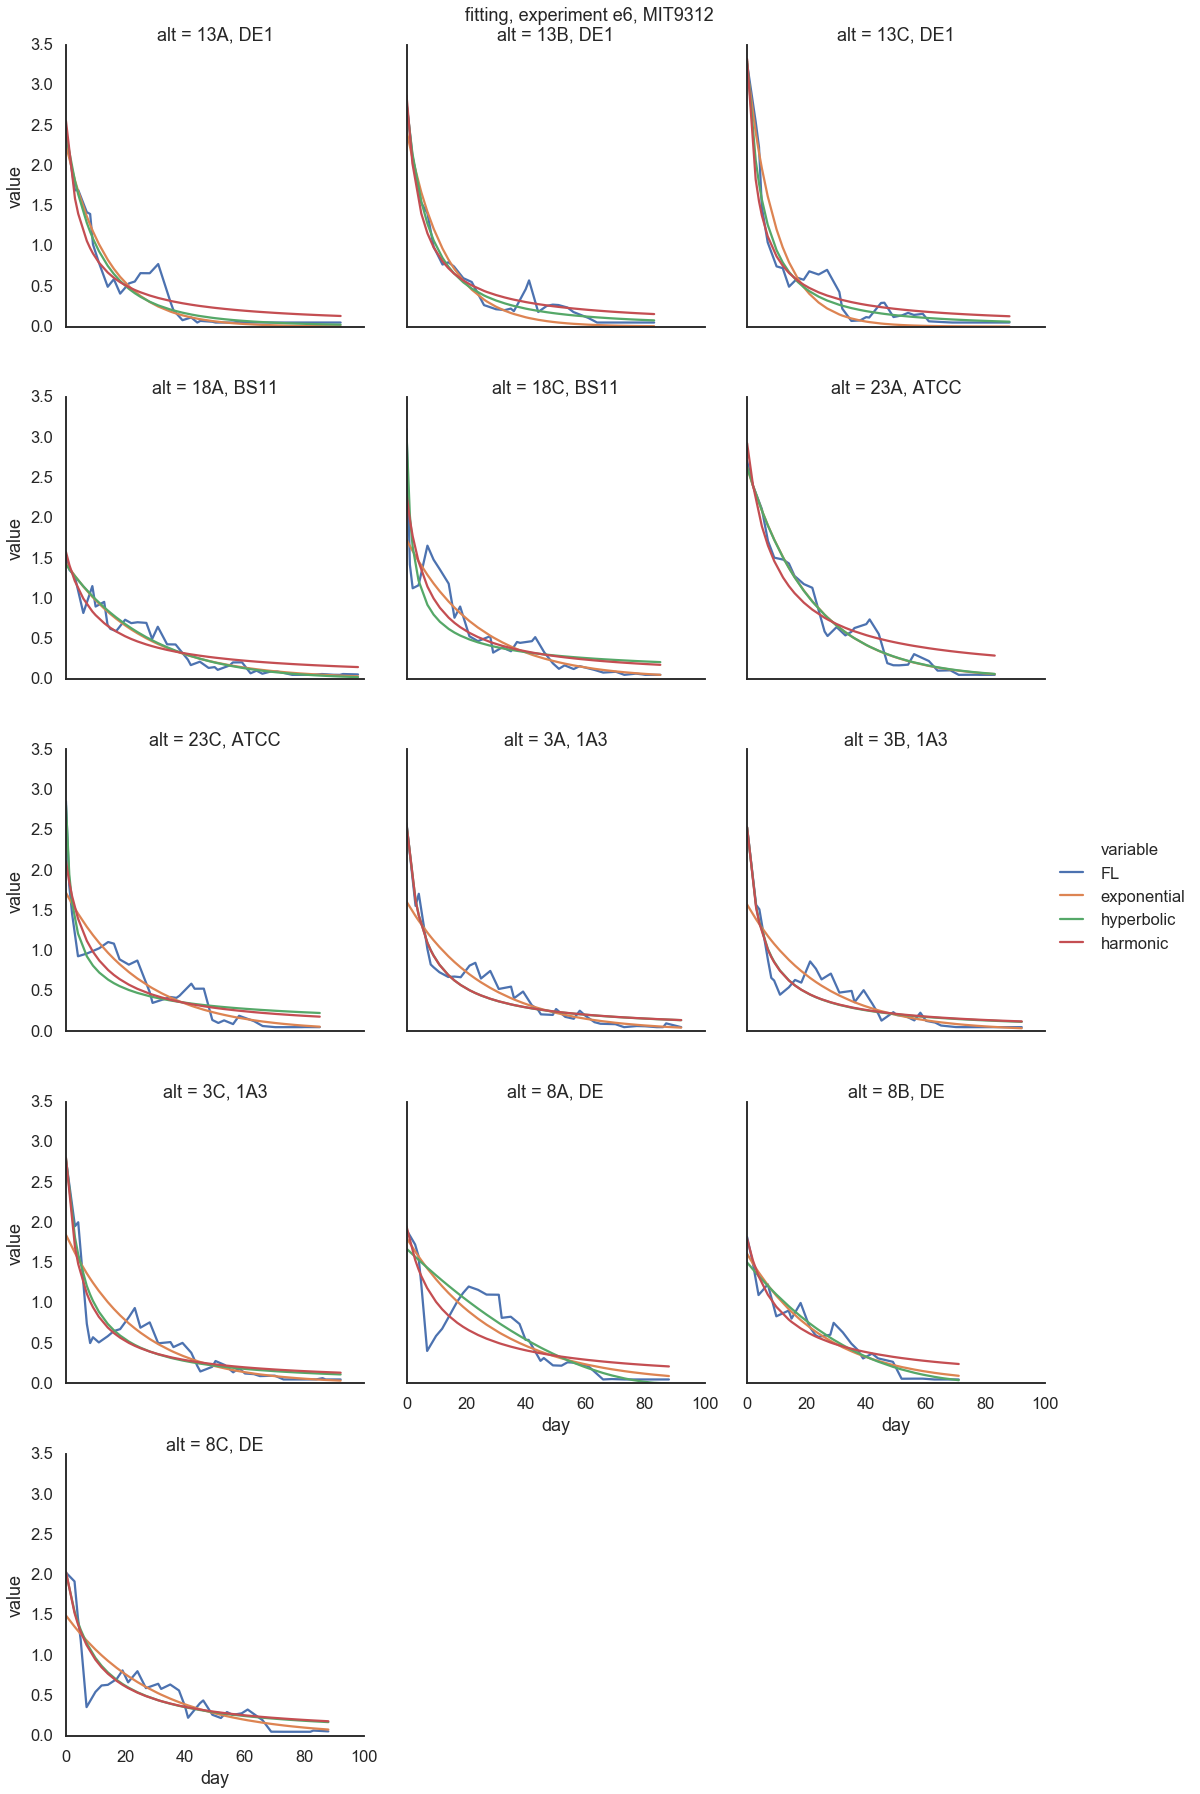

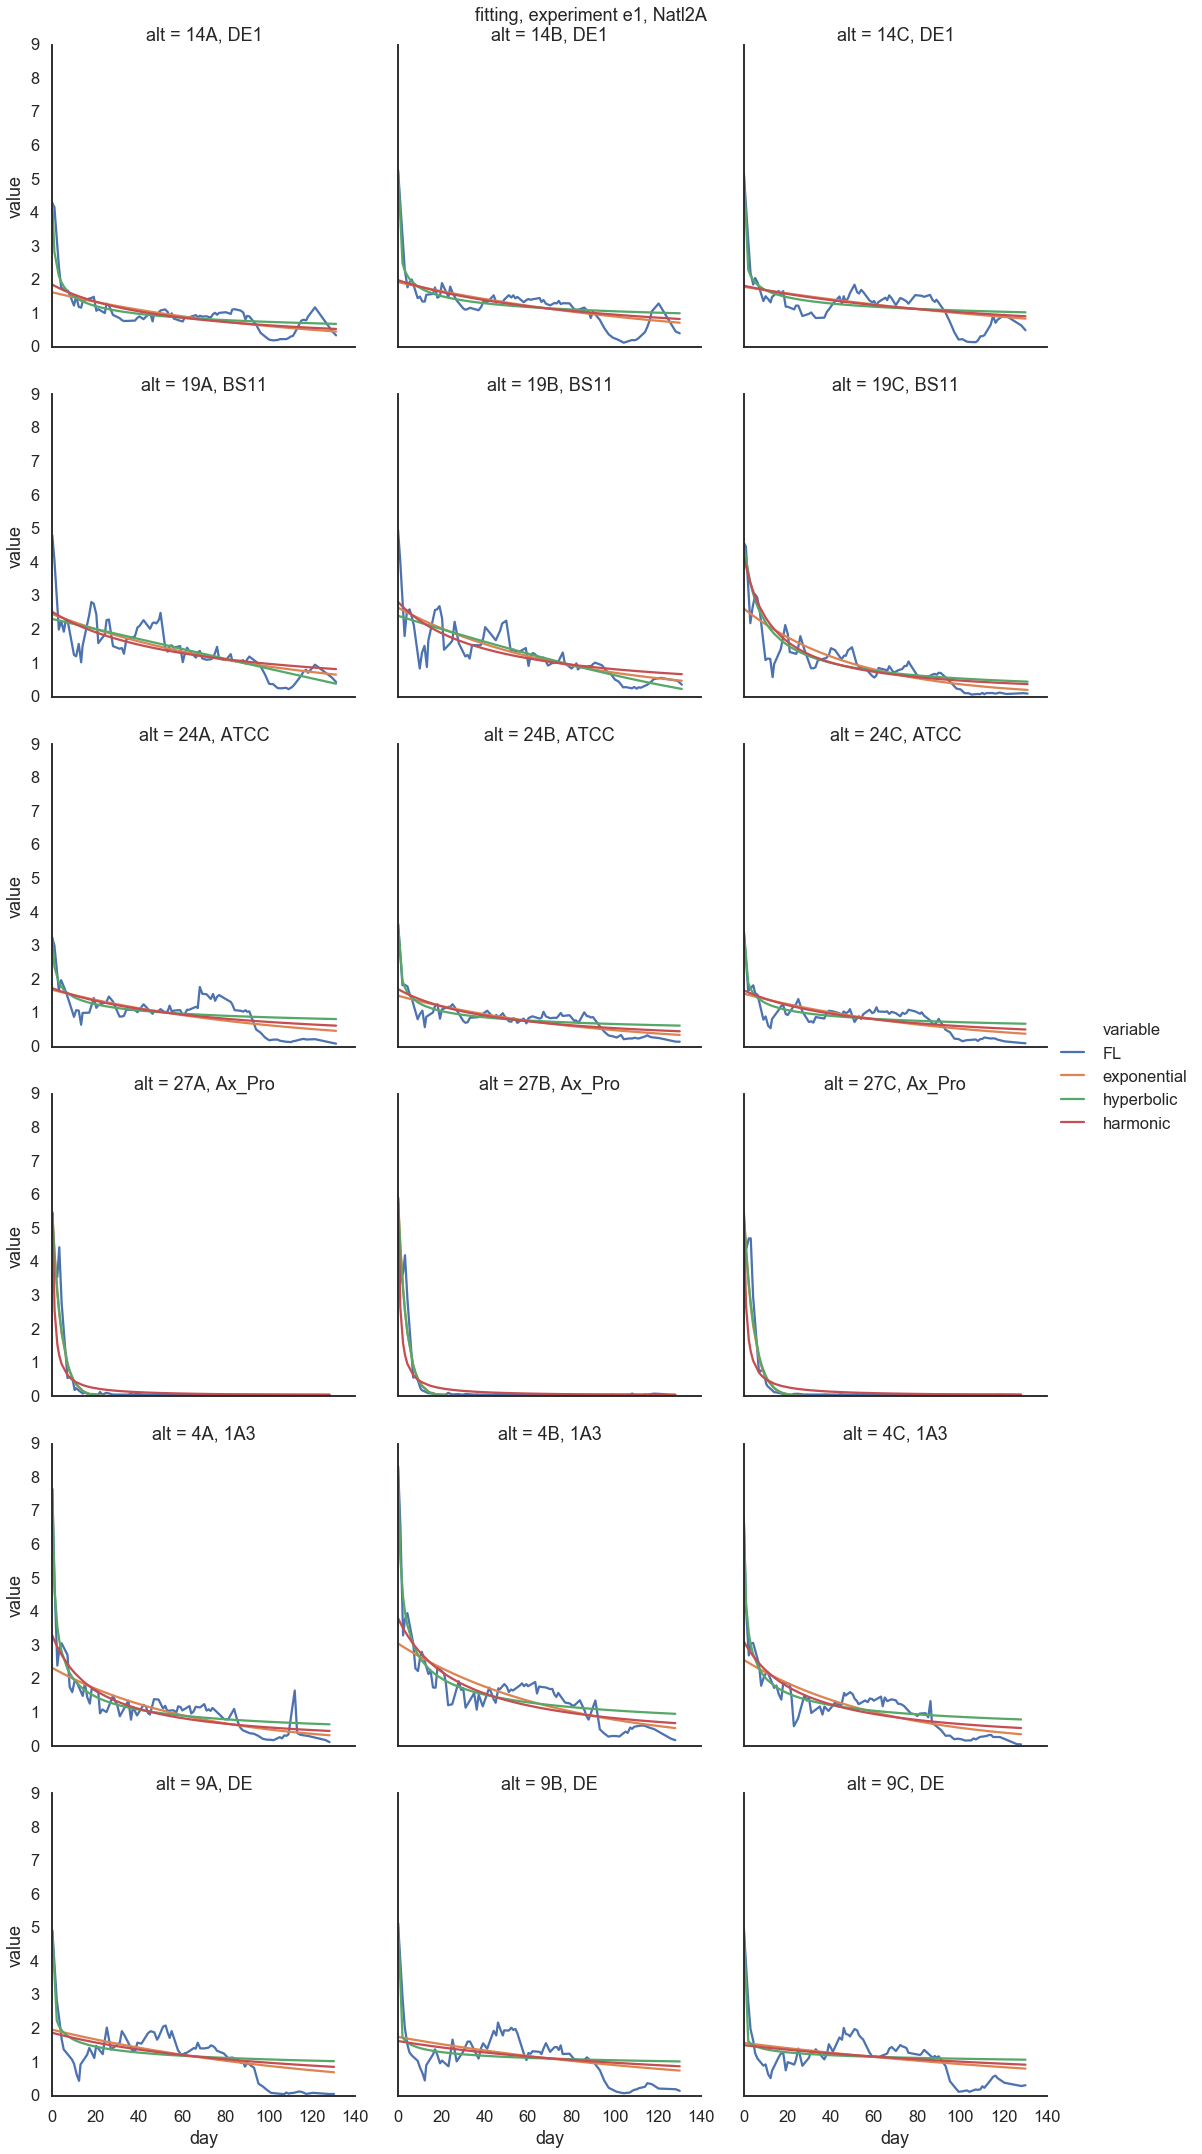

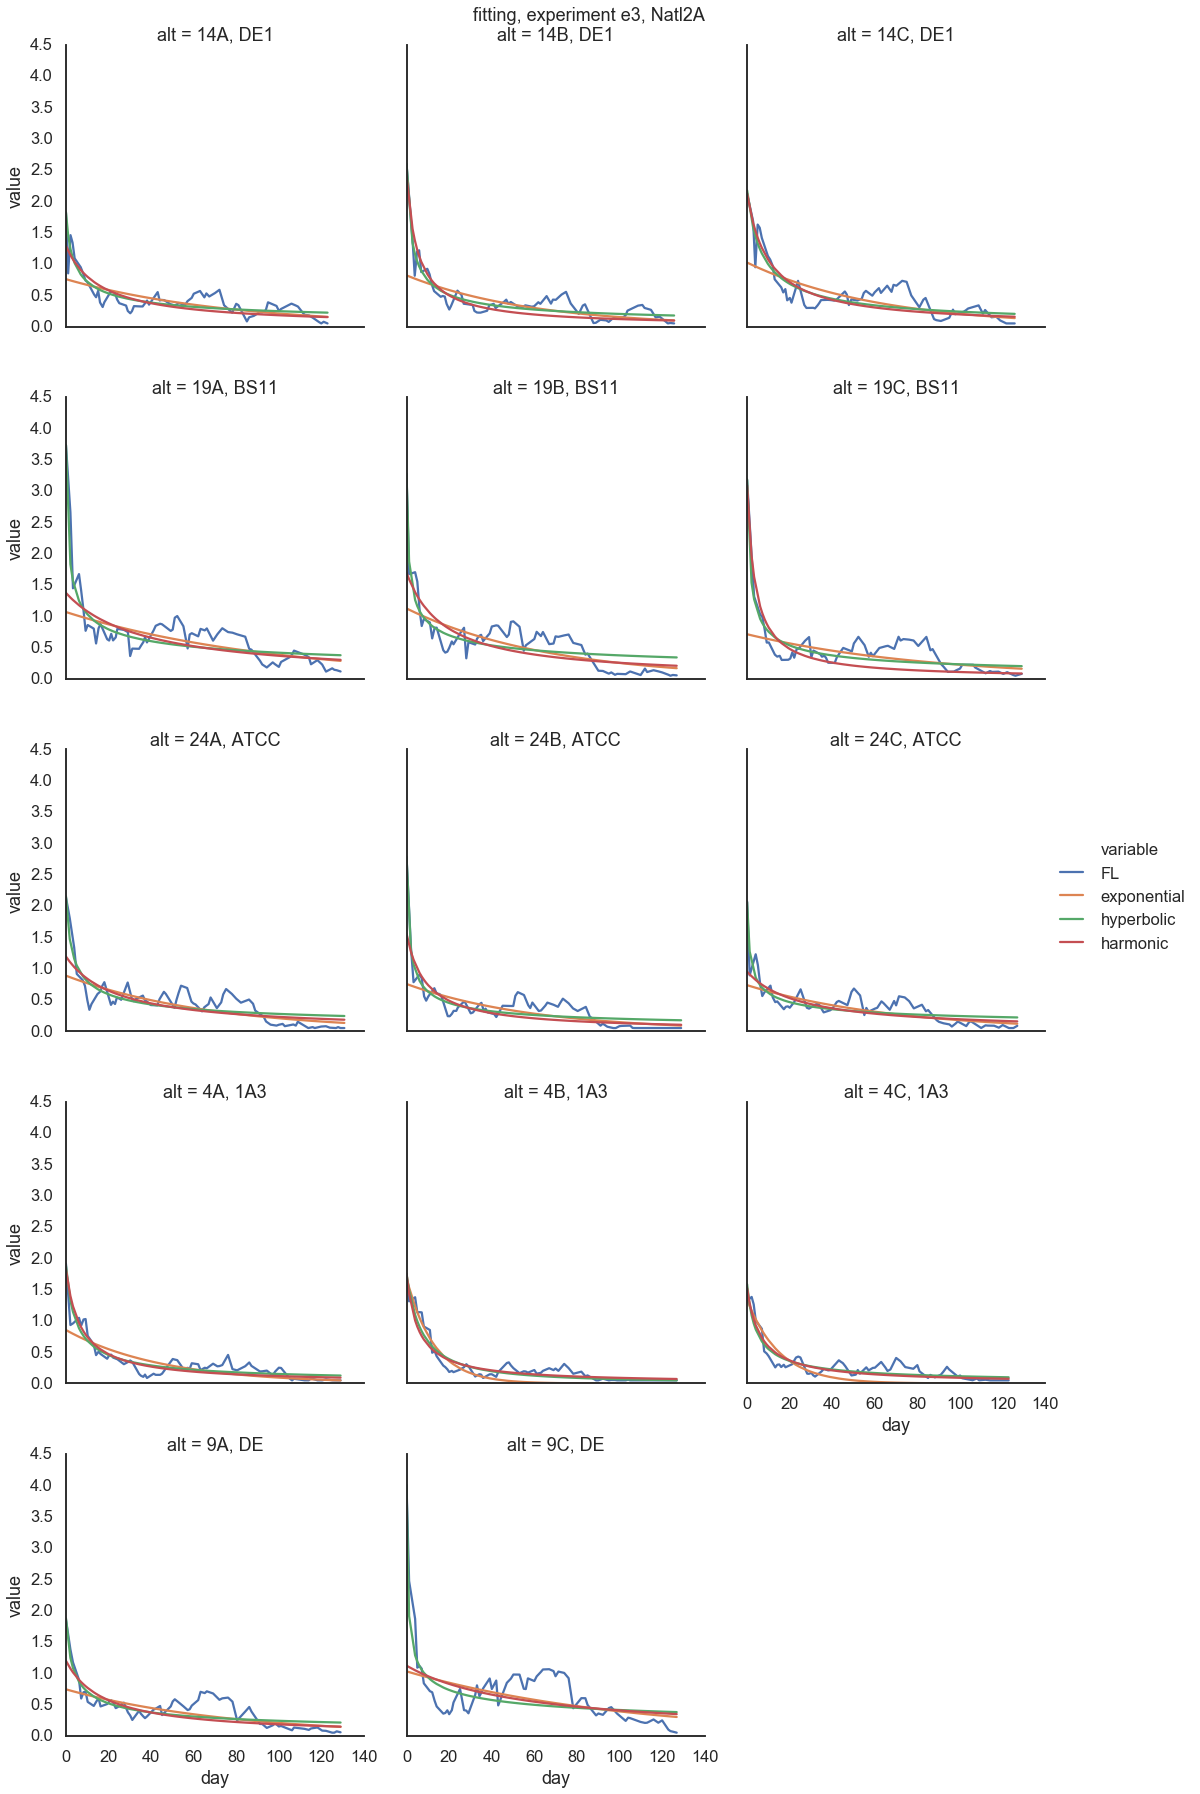

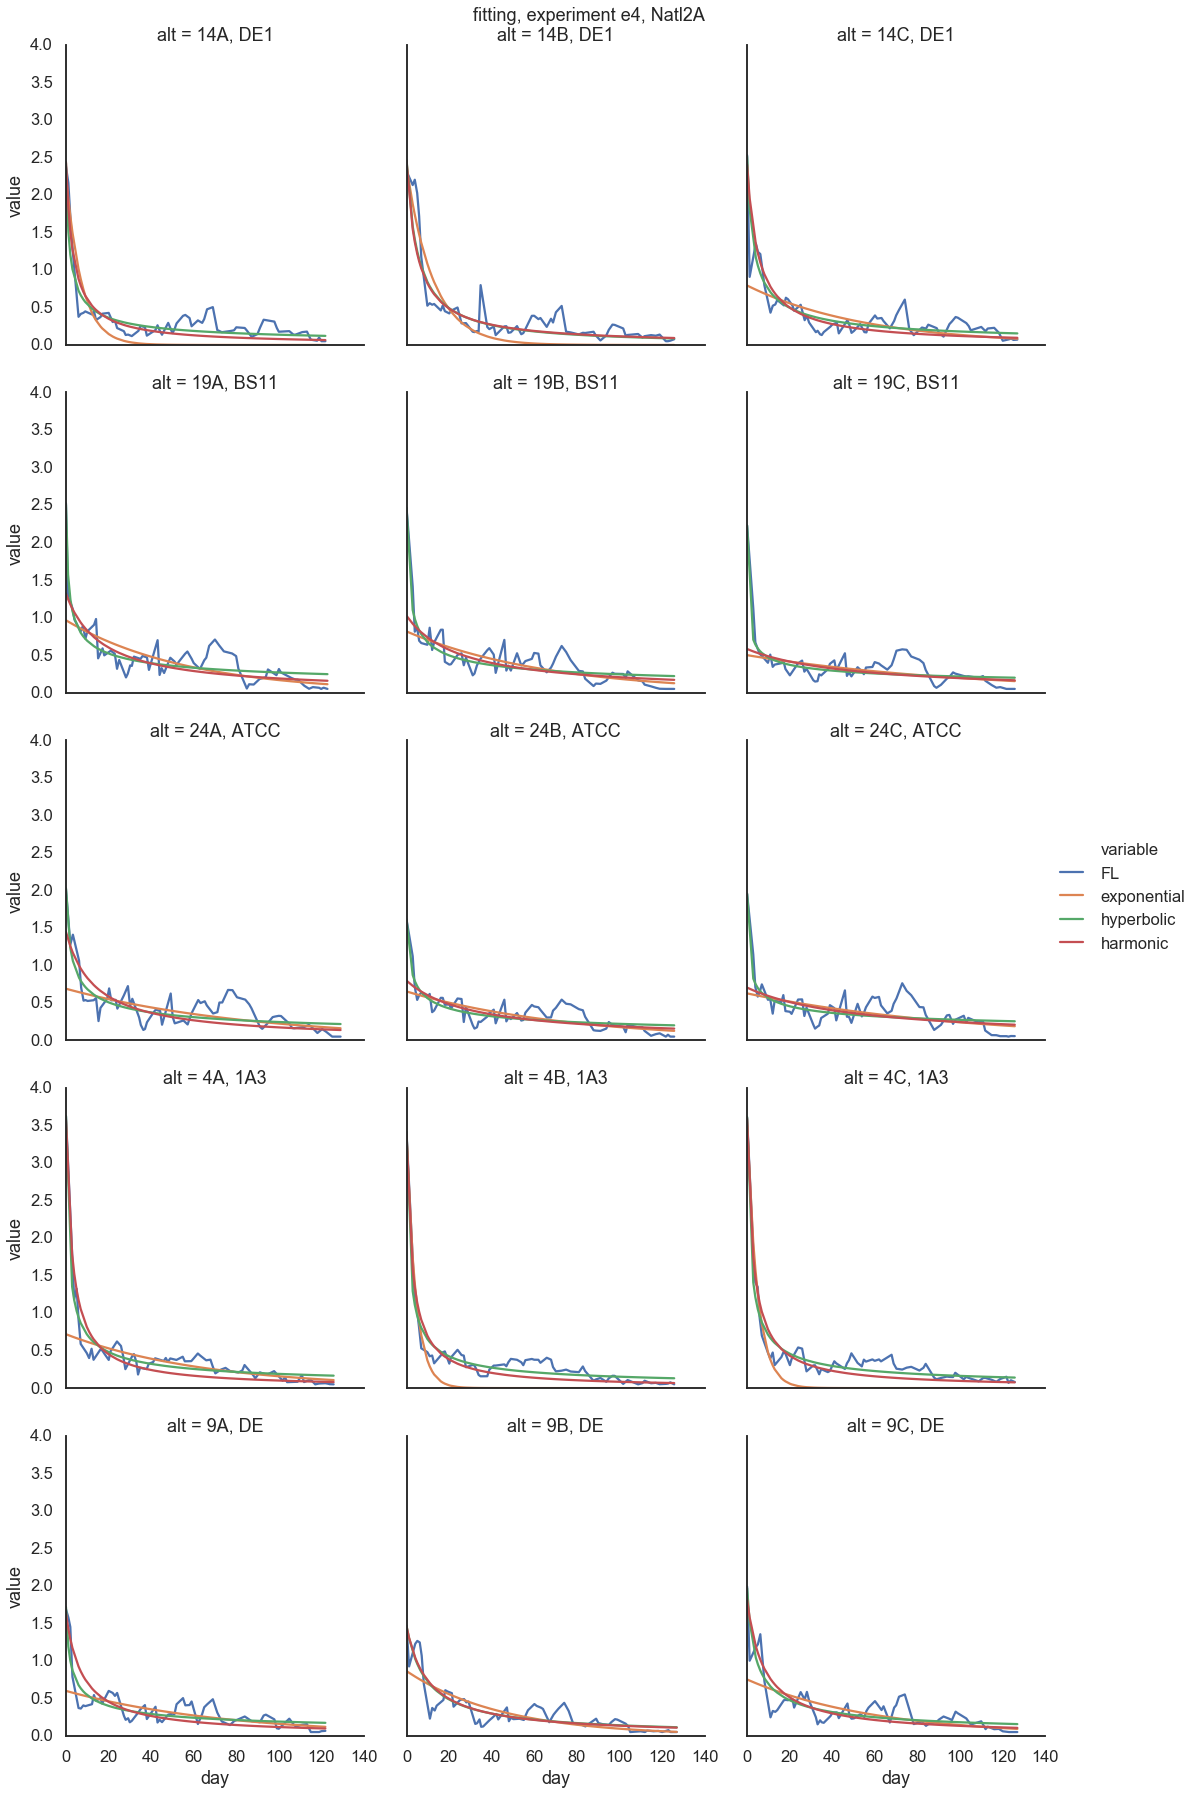

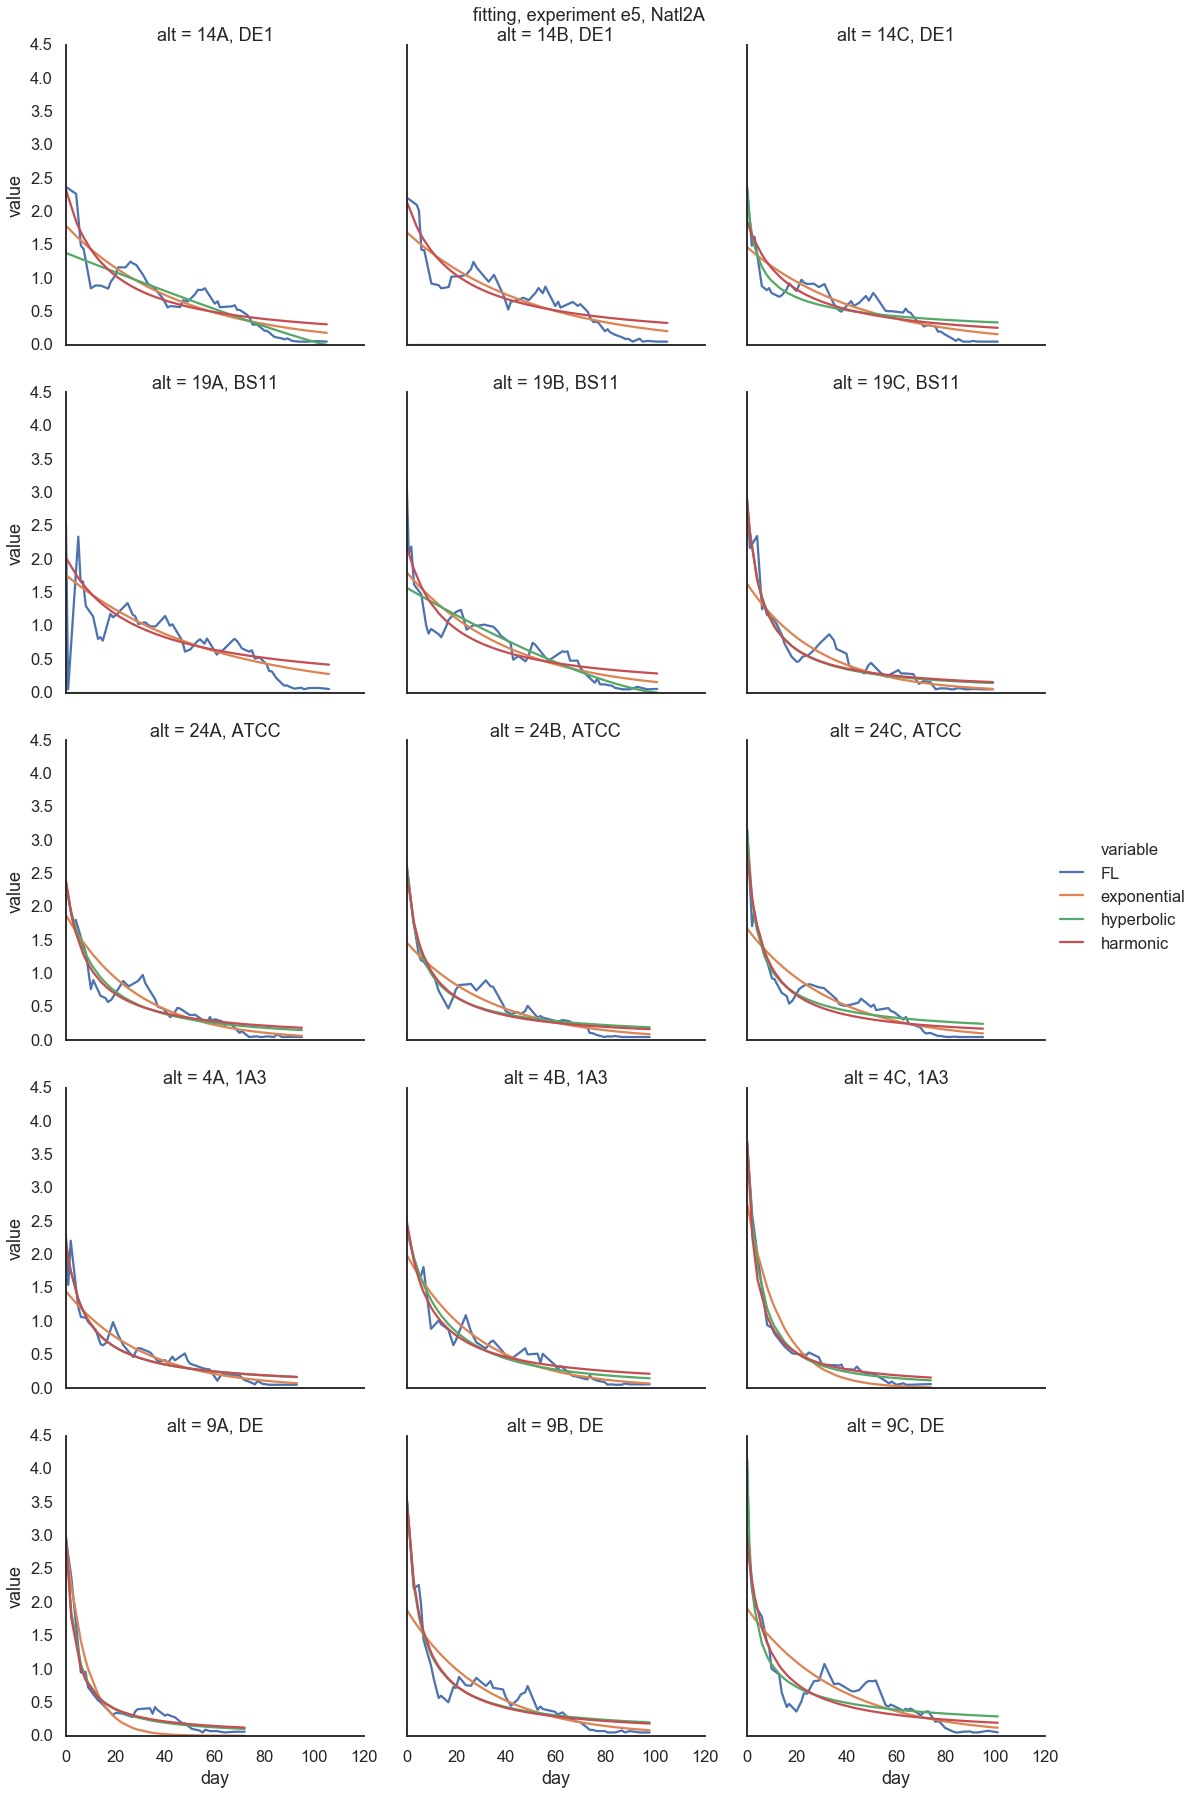

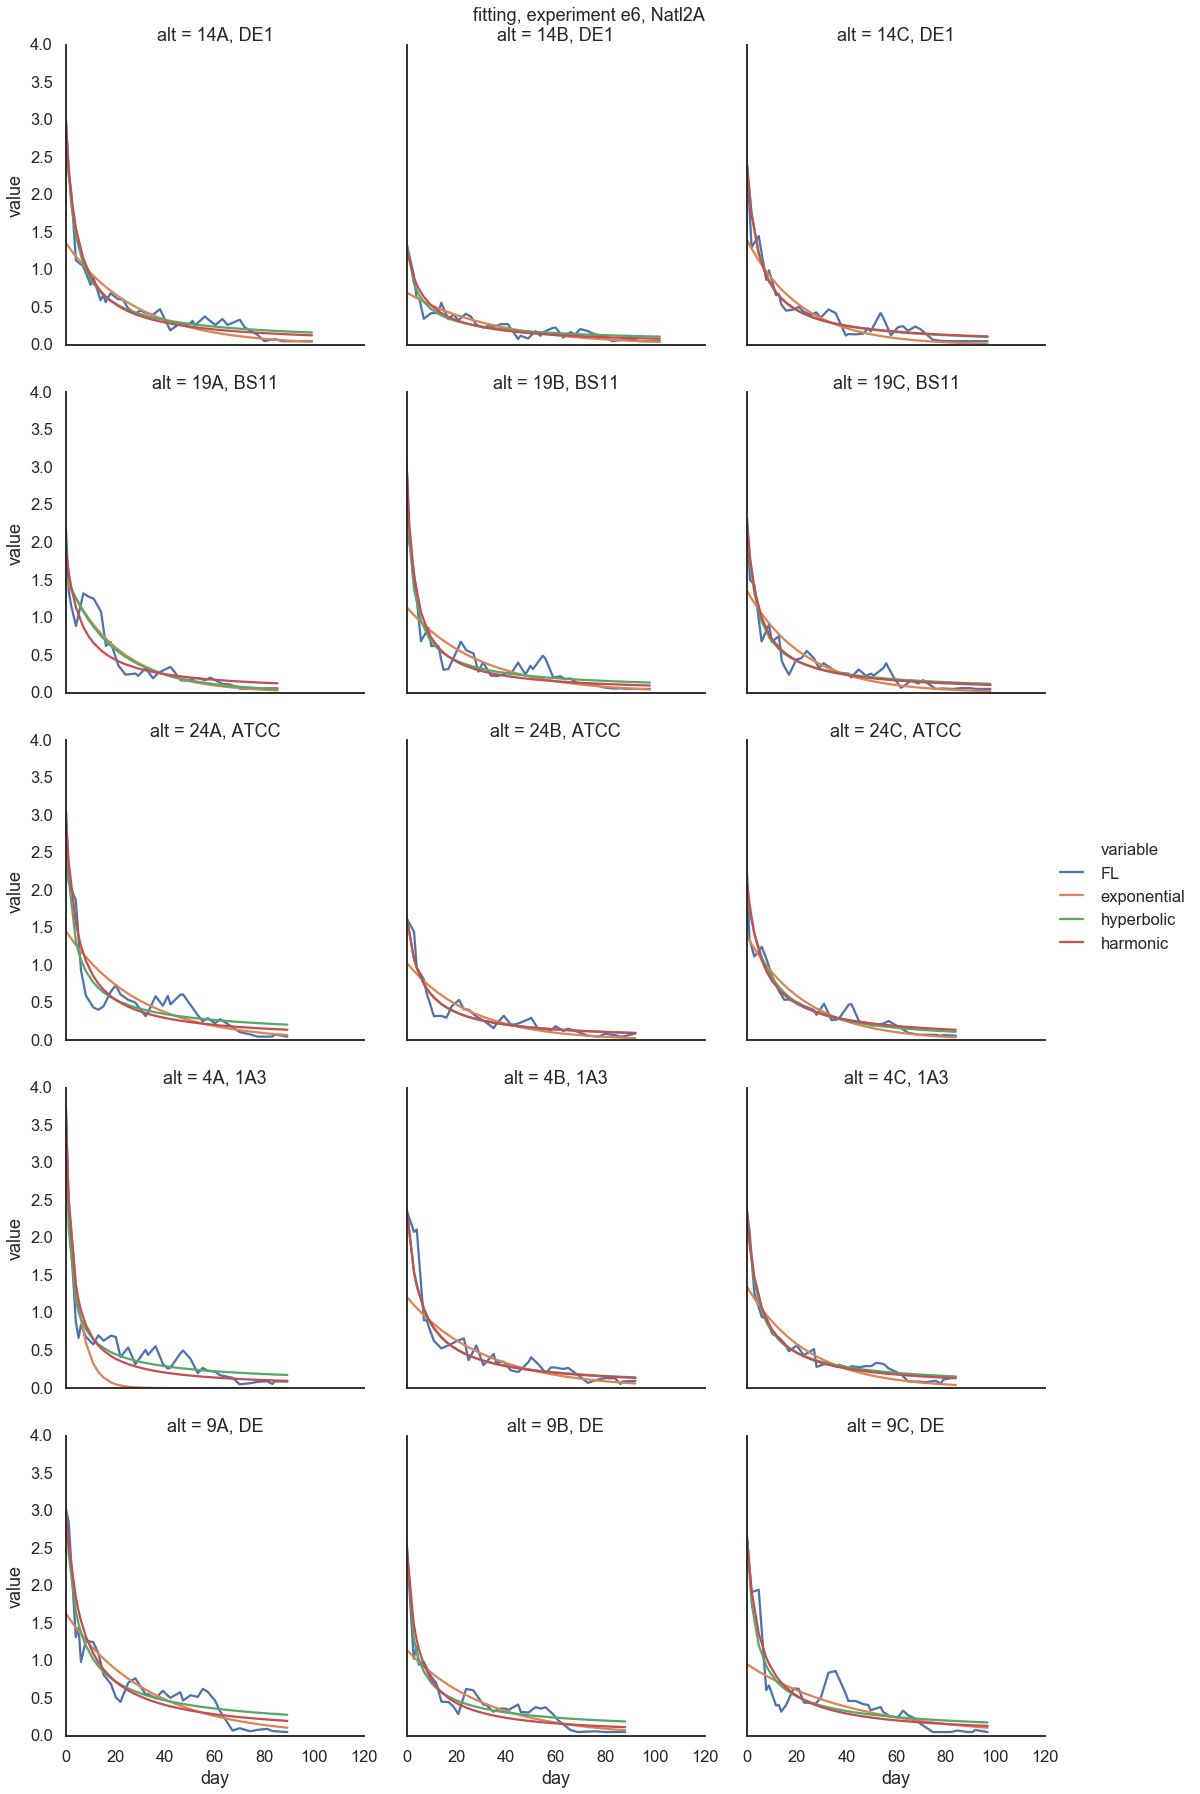

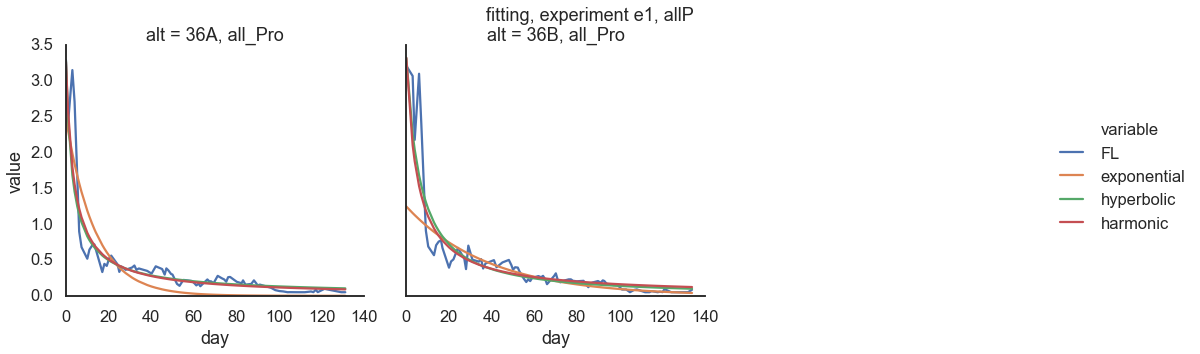

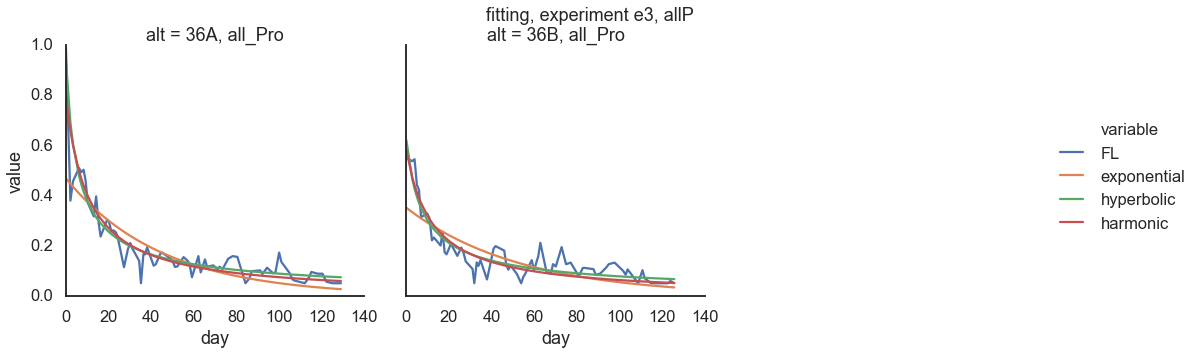

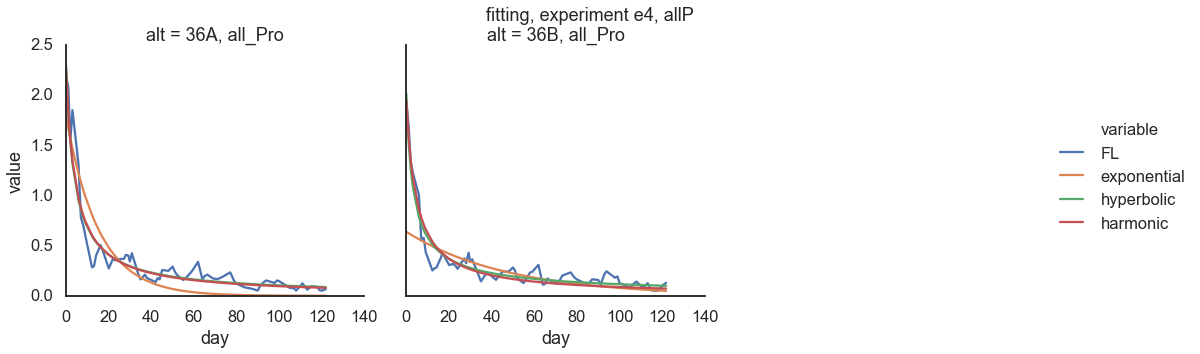

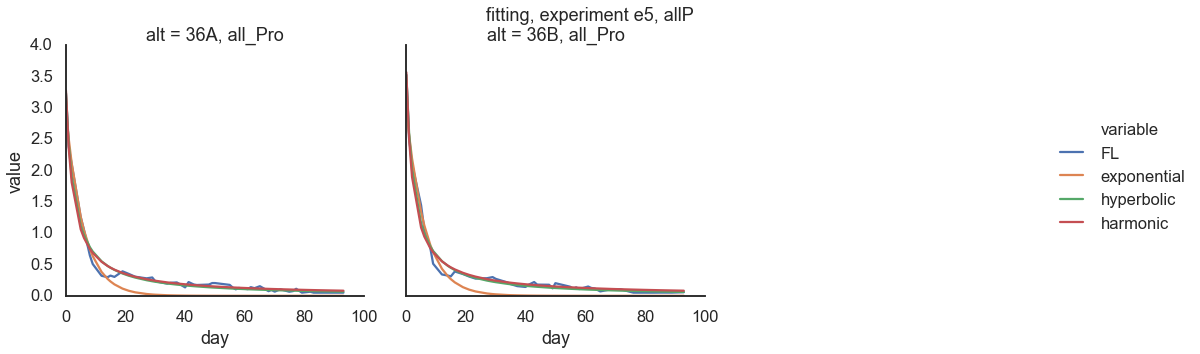

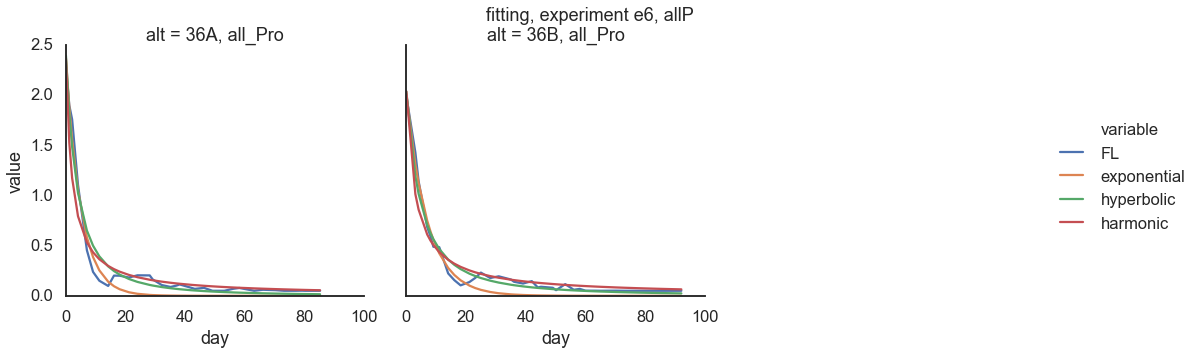

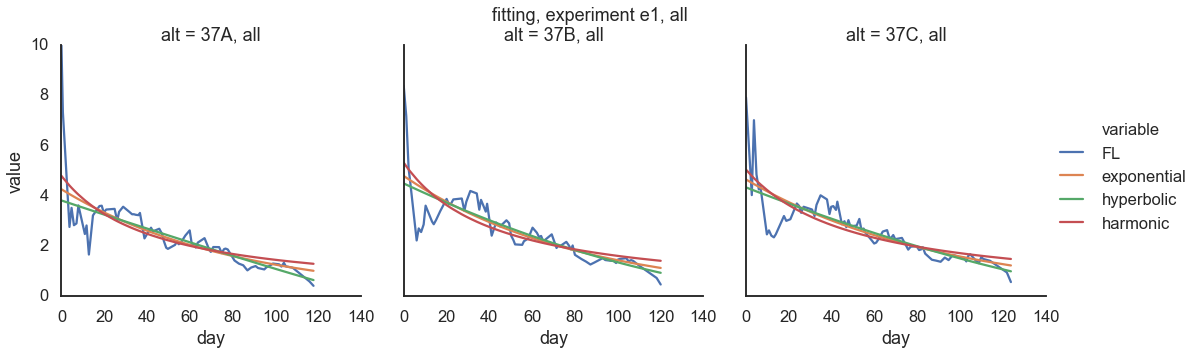

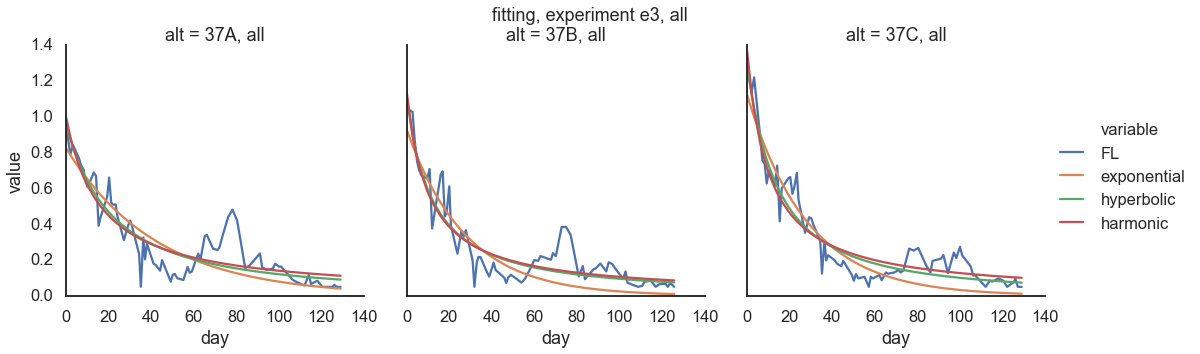

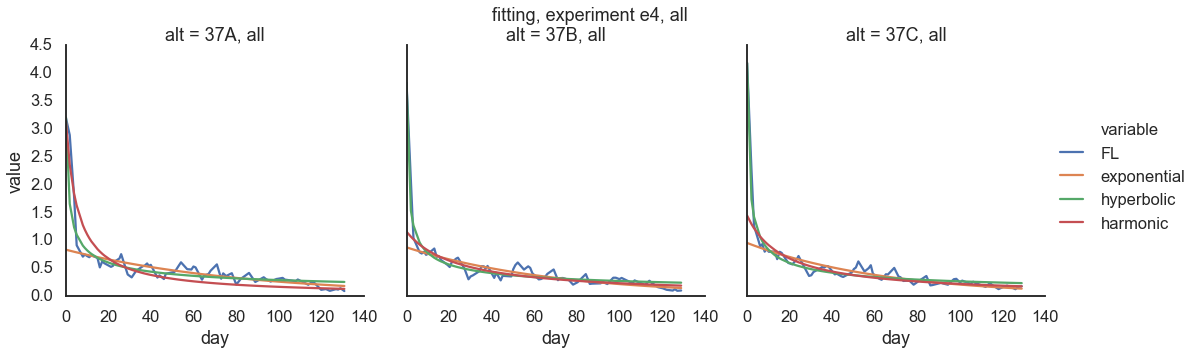

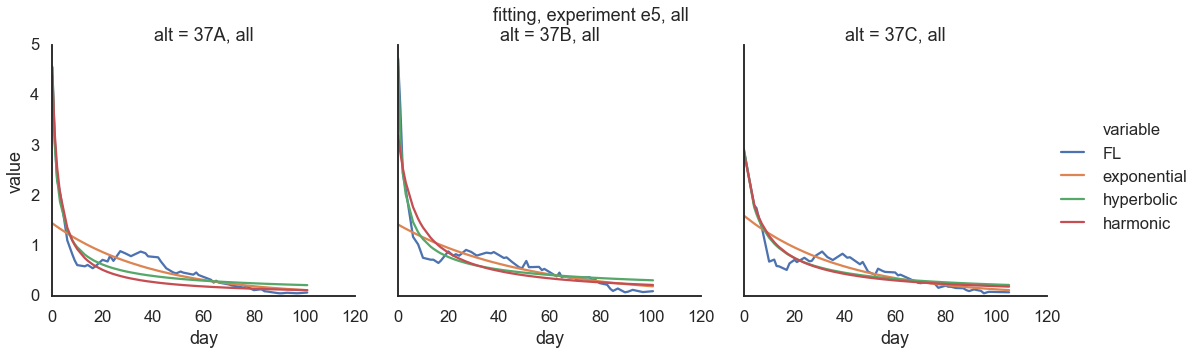

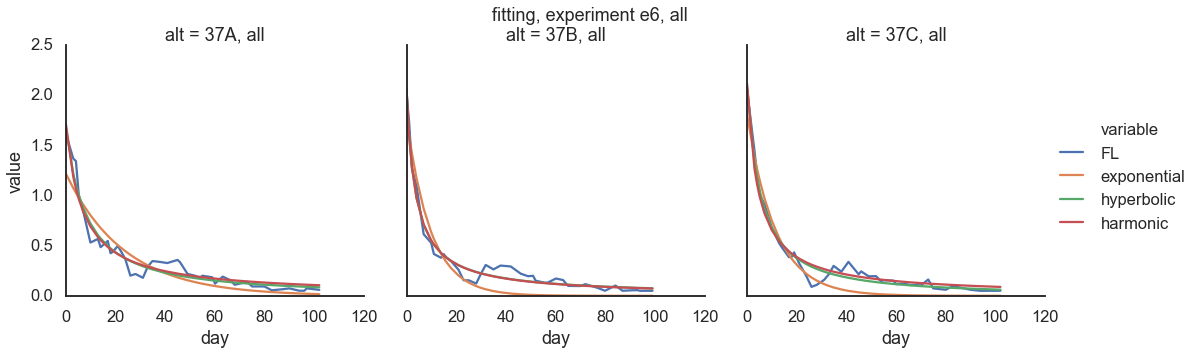

In [46]:
dfresm['alt'] = dfresm['sample'] +', '+dfresm['ALT']
for p in dfresm.PRO.unique():
    for e in dfresm.experiment.unique():
        sns.relplot(data=dfresm.loc[(dfresm.experiment == e) & (dfresm.PRO == p)], 
                x='day',
                y='value',
                hue='variable',
                col='alt',
                col_wrap=3,
                kind='line',
               )
        plt.suptitle(f'fitting, experiment {e}, {p}', y=1)
        plt.show()

In [37]:
dfresm.columns

Index(['experiment_sample', 'day', 'experiment', 'sample', 'PRO', 'ALT',
       'culture', 'variable', 'value'],
      dtype='object')

# Compare Models

In [115]:
dfscore.loc[dfscore.culture.isin(['Axenic'])]

experiment_sample experiment sample      PRO     ALT culture  \
49           e1, 26C         e1    26C  MIT0604  Ax_Pro  Axenic   
50           e1, 27A         e1    27A   Natl2A  Ax_Pro  Axenic   
51           e1, 27B         e1    27B   Natl2A  Ax_Pro  Axenic   
52           e1, 27C         e1    27C   Natl2A  Ax_Pro  Axenic   
53           e1, 28A         e1    28A  MIT9312  Ax_Pro  Axenic   
54           e1, 28B         e1    28B  MIT9312  Ax_Pro  Axenic   
55           e1, 28C         e1    28C  MIT9312  Ax_Pro  Axenic   
56           e1, 29A         e1    29A  MIT9313  Ax_Pro  Axenic   
57           e1, 29B         e1    29B  MIT9313  Ax_Pro  Axenic   
58           e1, 29C         e1    29C  MIT9313  Ax_Pro  Axenic   
62           e1, 30A         e1    30A     MED4  Ax_Pro  Axenic   
63           e1, 30B         e1    30B     MED4  Ax_Pro  Axenic   
64           e1, 30C         e1    30C     MED4  Ax_Pro  Axenic   

    exponential_popt_0  exponential_popt_1  exponential_popt_2  \
49            0.265980            6.028605                 0.5   
50            0.250285            5.462720                 1.0   
51            0.264765            5.908457                 0.5   
52            0.224661            5.521243                 0.5   
53            0.327386            8.072840                 1.0   
54            0.327122            7.987696                 0.5   
55            0.333792            7.209425                 1.0   
56            0.219669            2.879231                 1.0   
57            0.222334            3.114171                 1.0   
58            0.219444            2.588971                 0.5   
62            0.218970            8.372857                 1.0   
63            0.195546            7.655459                 0.5   
64            0.214527            7.549333                 0.5   

    rmse_exponential  ...  rmse_hyperbolic_5  bic_hyperbolic  harmonic_popt_0  \
49          0.334378  ...           1.423169     -150.371829         1.227676   
50          0.270836  ...           1.007293     -203.563742         1.098452   
51          0.264328  ...           1.016403     -204.085052         1.194482   
52          0.301419  ...           1.112274     -187.881778         0.917691   
53          0.362103  ...           1.690560     -137.672599         1.725821   
54          0.388653  ...                NaN             NaN         1.447897   
55          0.238846  ...           1.107854     -202.809242         1.639295   
56          0.121883  ...           0.379811     -341.205891         0.680970   
57          0.122604  ...                NaN             NaN         0.707761   
58          0.084541  ...                NaN             NaN         0.804890   
62          0.241243  ...           0.801102     -214.391988         1.009578   
63          0.208071  ...                NaN             NaN         0.856175   
64          0.182156  ...           0.508411     -261.116763         0.928863   

    harmonic_popt_1  harmonic_popt_2  rmse_harmonic  rmse_harmonic_60  \
49         4.953524              1.0       0.644830          0.015899   
50         5.480826              0.5       0.486540          0.013742   
51         5.925603              1.0       0.472709          0.015470   
52         5.247932              1.0       0.584227          0.020000   
53         5.808273              0.5       0.727776          0.013962   
54         5.652444              1.0       0.726858          0.010541   
55         5.861709              1.0       0.574169          0.012399   
56         2.170706              0.5       0.211832          0.016938   
57         2.399816              0.5       0.225642          0.015007   
58         2.406889              1.0       0.172880          0.018911   
62         7.550302              0.5       0.634299          0.038927   
63         7.128710              1.0       0.579457          0.044006   
64         7.451317              1.0       0.511712    